# **Insights for a Crisis Recovery to an Online Food Delivery Startup**

# Data Exploration

### Basic Data Overview

In [ ]:
import pandas as pd

Load datasets

In [ ]:
fact_orders = pd.read_csv('fact_orders.csv')
fact_order_items = pd.read_csv('fact_order_items.csv')
fact_ratings = pd.read_csv('fact_ratings.csv')
fact_delivery_performance = pd.read_csv('fact_delivery_performance.csv')
dim_customer = pd.read_csv('dim_customer.csv')
dim_restaurant = pd.read_csv('dim_restaurant.csv')
dim_delivery_partner = pd.read_csv('/content/dim_delivery_partner_.csv')
dim_menu_item = pd.read_csv('dim_menu_item.csv')

Order dataset<br>
order_id [primary key]

In [ ]:
fact_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149166 entries, 0 to 149165
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             149166 non-null  object 
 1   customer_id          149166 non-null  object 
 2   restaurant_id        149166 non-null  object 
 3   delivery_partner_id  143531 non-null  object 
 4   order_timestamp      149166 non-null  object 
 5   subtotal_amount      149166 non-null  float64
 6   discount_amount      149166 non-null  float64
 7   delivery_fee         149166 non-null  float64
 8   total_amount         149166 non-null  float64
 9   is_cod               149166 non-null  object 
 10  is_cancelled         149166 non-null  object 
dtypes: float64(4), object(7)
memory usage: 12.5+ MB


In [ ]:
fact_orders.head()

order_id customer_id restaurant_id delivery_partner_id  \
0  ORD202501023439  CUST181110     REST08622             DP05541   
1  ORD202501012051  CUST025572     REST02383             DP08091   
2  ORD202501019281  CUST179306     REST14069             DP02021   
3  ORD202501000124  CUST191820     REST19745             DP13859   
4  ORD202501006518  CUST033760     REST12962             DP09615   

       order_timestamp  subtotal_amount  discount_amount  delivery_fee  \
0  2025-01-01 12:00:00           471.62            35.44         30.56   
1  2025-01-01 12:00:00           255.68             0.00         27.45   
2  2025-01-01 12:00:00           428.38             0.00         26.23   
3  2025-01-01 12:00:00           260.81             0.00         32.75   
4  2025-01-01 12:00:00           280.33             0.00         25.57   

   total_amount is_cod is_cancelled  
0        466.74      N            N  
1        283.13      Y            N  
2        454.61      N            N  
3        293.56      N            N  
4        305.90      N            N

In [ ]:
fact_orders.isnull().sum()

order_id                  0
customer_id               0
restaurant_id             0
delivery_partner_id    5635
order_timestamp           0
subtotal_amount           0
discount_amount           0
delivery_fee              0
total_amount              0
is_cod                    0
is_cancelled              0
dtype: int64

In [ ]:
fact_orders.describe()

subtotal_amount  discount_amount   delivery_fee   total_amount
count    149166.000000    149166.000000  149166.000000  149166.000000
mean        314.373203        18.891589      30.069224     325.550833
std         147.346779        29.801279      10.997816     146.790190
min           0.000000         0.000000       0.000000       0.000000
25%         234.960000         0.000000      24.730000     249.842500
50%         309.070000         0.000000      31.485000     321.700000
75%         396.290000        34.690000      38.240000     406.590000
max         900.000000       222.530000      45.000000     944.910000

In [ ]:
fact_orders.shape

(149166, 11)

Order Item dataset<br>
item_id [primary key]

In [ ]:
fact_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342994 entries, 0 to 342993
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       342994 non-null  object 
 1   item_id        342994 non-null  object 
 2   menu_item_id   342994 non-null  object 
 3   restaurant_id  342994 non-null  object 
 4   quantity       342994 non-null  int64  
 5   unit_price     342994 non-null  float64
 6   item_discount  342994 non-null  float64
 7   line_total     342994 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 20.9+ MB


In [ ]:
fact_order_items.shape

(342994, 8)

In [ ]:
fact_order_items.head()

order_id  item_id    menu_item_id restaurant_id  quantity  \
0  ORD202501006518  ITEM001  MENU12962_3216     REST12962         2   
1  ORD202501006518  ITEM002  MENU12962_1962     REST12962         3   
2  ORD202501019281  ITEM001  MENU14069_0510     REST14069         2   
3  ORD202501019281  ITEM002  MENU14069_4308     REST14069         3   
4  ORD202501023439  ITEM001  MENU08622_7574     REST08622         2   

   unit_price  item_discount  line_total  
0       48.31           0.00       96.62  
1       61.24           0.00      183.71  
2       87.19           0.00      174.38  
3       84.67           0.00      254.00  
4      235.81          35.44      436.18

In [ ]:
fact_order_items.isnull().sum()

order_id         0
item_id          0
menu_item_id     0
restaurant_id    0
quantity         0
unit_price       0
item_discount    0
line_total       0
dtype: int64

In [ ]:
fact_order_items.describe()

quantity     unit_price  item_discount     line_total
count  342994.000000  342994.000000  342994.000000  342994.000000
mean        1.998012      86.307888       9.193635     143.814273
std         0.818149      79.286627      17.089856     108.096155
min         1.000000       4.330000       0.000000       5.410000
25%         1.000000      39.350000       0.000000      66.340000
50%         2.000000      62.270000       0.000000     112.785000
75%         3.000000     102.230000      12.580000     190.150000
max         3.000000     900.000000     220.660000     900.000000

Ratings dataset

In [ ]:
fact_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68842 entries, 0 to 68841
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          68825 non-null  object 
 1   customer_id       68825 non-null  object 
 2   restaurant_id     68825 non-null  object 
 3   rating            68825 non-null  float64
 4   review_text       68825 non-null  object 
 5   review_timestamp  68825 non-null  object 
 6   sentiment_score   68825 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.7+ MB


In [ ]:
fact_ratings.head()

order_id customer_id restaurant_id  rating           review_text  \
0  ORD202501023439  CUST181110     REST08622     4.5   Super fast delivery   
1  ORD202501019281  CUST179306     REST14069     4.5          Great taste!   
2  ORD202501018036  CUST093042     REST13907     5.0   Super fast delivery   
3  ORD202501007724  CUST110825     REST08451     4.0  Tasty but a bit late   
4  ORD202501002349  CUST181669     REST00225     4.4     Satisfied overall   

   review_timestamp  sentiment_score  
0  01-01-2025 15:00             0.75  
1  01-01-2025 15:00             0.75  
2  01-01-2025 14:03             1.00  
3  01-01-2025 14:06             0.50  
4  01-01-2025 14:06             0.70

In [ ]:
fact_ratings.isnull().sum()

order_id            17
customer_id         17
restaurant_id       17
rating              17
review_text         17
review_timestamp    17
sentiment_score     17
dtype: int64

In [ ]:
fact_ratings.shape

(68842, 7)

In [ ]:
fact_ratings.describe()

rating  sentiment_score
count  68825.000000     68825.000000
mean       4.052308         0.526154
std        0.940331         0.470165
min        1.000000        -1.000000
25%        3.800000         0.400000
50%        4.400000         0.700000
75%        4.700000         0.850000
max        5.000000         1.000000

Delivery performance<br>
order_id [primary key]

In [ ]:
fact_delivery_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149166 entries, 0 to 149165
Data columns (total 4 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   order_id                     149166 non-null  object 
 1   actual_delivery_time_mins    149166 non-null  int64  
 2   expected_delivery_time_mins  149166 non-null  int64  
 3   distance_km                  149166 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.6+ MB


In [ ]:
fact_delivery_performance.head()

order_id  actual_delivery_time_mins  expected_delivery_time_mins  \
0  ORD202501023439                         31                           31   
1  ORD202501012051                         46                           42   
2  ORD202501019281                         25                           31   
3  ORD202501000124                         29                           41   
4  ORD202501006518                         37                           41   

   distance_km  
0          6.4  
1          1.9  
2          6.2  
3          6.2  
4          2.4

In [ ]:
fact_delivery_performance.isnull().sum()

order_id                       0
actual_delivery_time_mins      0
expected_delivery_time_mins    0
distance_km                    0
dtype: int64

In [ ]:
fact_delivery_performance.shape

In [ ]:
fact_delivery_performance.describe()

Customer<br>
customer_id [primary key]

In [ ]:
dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107776 entries, 0 to 107775
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   customer_id          107776 non-null  object
 1   signup_date          107776 non-null  object
 2   city                 107776 non-null  object
 3   acquisition_channel  107776 non-null  object
dtypes: object(4)
memory usage: 3.3+ MB


In [ ]:
dim_customer.head()

customer_id signup_date       city acquisition_channel
0  CUST000007  21-03-2025       Pune             Organic
1  CUST000008  07-02-2025    Kolkata            Referral
2  CUST000009  25-02-2025      Delhi                Paid
3  CUST000010  28-01-2025  Hyderabad                Paid
4  CUST000011  18-01-2025    Kolkata             Organic

In [ ]:
dim_customer.isnull().sum()

customer_id            0
signup_date            0
city                   0
acquisition_channel    0
dtype: int64

In [ ]:
dim_customer.describe()

customer_id signup_date       city acquisition_channel
count       107776      107776     107776              107776
unique      107776         333          8                   4
top     CUST199977  31-12-2024  Bengaluru             Organic
freq             1         736      30281               55382

In [ ]:
dim_customer.shape

(107776, 4)

In [ ]:
dim_customer.describe(include='all') # for both categorical and numerical
# but this table do not contain any numerical column

customer_id signup_date       city acquisition_channel
count       107776      107776     107776              107776
unique      107776         333          8                   4
top     CUST199977  31-12-2024  Bengaluru             Organic
freq             1         736      30281               55382

Restaurant dataset<br>
restaurant_id [primary key]

In [ ]:
dim_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19995 entries, 0 to 19994
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   restaurant_id      19995 non-null  object
 1   restaurant_name    19995 non-null  object
 2   city               19995 non-null  object
 3   cuisine_type       19995 non-null  object
 4   partner_type       19995 non-null  object
 5   avg_prep_time_min  19995 non-null  object
 6   is_active          19995 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [ ]:
dim_restaurant.head()

restaurant_id            restaurant_name       city  cuisine_type  \
0     REST12962  Flavours of Sweets Palace  Bengaluru       Chinese   
1     REST14069       Royal Biryani Darbar  Ahmedabad     Fast Food   
2     REST08622          Spicy Wraps Point     Mumbai  North Indian   
3     REST19745       Delhi Express Palace  Ahmedabad         Pizza   
4     REST02383         Namma Mess Delight     Mumbai       Healthy   

    partner_type avg_prep_time_min is_active  
0     Restaurant             26-40         N  
1     Restaurant             16-25         Y  
2     Restaurant             16-25         Y  
3  Cloud Kitchen             16-25         Y  
4     Restaurant             26-40         Y

In [ ]:
dim_restaurant.isnull().sum()

restaurant_id        0
restaurant_name      0
city                 0
cuisine_type         0
partner_type         0
avg_prep_time_min    0
is_active            0
dtype: int64

In [ ]:
dim_restaurant.shape

(19995, 7)

In [ ]:
dim_restaurant.describe()

restaurant_id         restaurant_name       city  cuisine_type  \
count          19995                   19995      19995         19995   
unique         19995                    4779          8             8   
top        REST18157  Classic Tandoor Heaven  Bengaluru  North Indian   
freq               1                      12       4963          3942   

       partner_type avg_prep_time_min is_active  
count         19995             19995     19995  
unique            2                 4         2  
top      Restaurant             16-25         Y  
freq          14028              7987     18050

Delivery Partner dataset<br>
delivery_partner_id [primary key]

In [ ]:
dim_delivery_partner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   delivery_partner_id  15000 non-null  object 
 1   partner_name         15000 non-null  object 
 2   city                 15000 non-null  object 
 3   vehicle_type         15000 non-null  object 
 4   employment_type      15000 non-null  object 
 5   avg_rating           15000 non-null  float64
 6   is_active            15000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 820.4+ KB


In [ ]:
dim_delivery_partner.head()

delivery_partner_id partner_name       city vehicle_type employment_type  \
0             DP09615       Neha E  Bengaluru      Scooter       Full-time   
1             DP02021       Neha V  Bengaluru         Bike       Full-time   
2             DP05541      Vikas S      Delhi        Cycle       Part-time   
3             DP13859       Amit B      Delhi        Cycle       Part-time   
4             DP08091      Arjun R     Mumbai          Car       Full-time   

   avg_rating is_active  
0        3.77         Y  
1        3.90         Y  
2        3.33         Y  
3        4.07         N  
4        4.63         Y

In [ ]:
dim_delivery_partner.isnull().sum()

delivery_partner_id    0
partner_name           0
city                   0
vehicle_type           0
employment_type        0
avg_rating             0
is_active              0
dtype: int64

In [ ]:
dim_delivery_partner.describe()

avg_rating
count  15000.000000
mean       4.197549
std        0.300532
min        3.060000
25%        3.990000
50%        4.200000
75%        4.400000
max        5.000000

In [ ]:
dim_delivery_partner.shape

(15000, 7)

Menu dataset <br>
menu_item_id [primary key]

In [ ]:
dim_menu_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342671 entries, 0 to 342670
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   menu_item_id   342671 non-null  object 
 1   restaurant_id  342671 non-null  object 
 2   item_name      342671 non-null  object 
 3   category       342671 non-null  object 
 4   is_veg         342671 non-null  object 
 5   price          342671 non-null  float64
dtypes: float64(1), object(5)
memory usage: 15.7+ MB


In [ ]:
dim_menu_item.head()

menu_item_id restaurant_id           item_name    category is_veg   price
0  MENU12962_3216     REST12962  Paneer Tikka Pizza       Pizza      Y  271.05
1  MENU12962_1962     REST12962     Pepperoni Pizza       Pizza      N  327.26
2  MENU14069_0510     REST14069      Egg Fried Rice  Fried Rice      N  200.01
3  MENU14069_4308     REST14069        Paneer Tikka    Starters      Y  198.83
4  MENU08622_7574     REST08622        Kadai Paneer     Curries      Y  271.60

In [ ]:
dim_menu_item.isnull().sum()

menu_item_id     0
restaurant_id    0
item_name        0
category         0
is_veg           0
price            0
dtype: int64

In [ ]:
dim_menu_item.shape

(342671, 6)

In [ ]:
dim_menu_item.describe()

price
count  342671.000000
mean      164.332567
std        69.083017
min        25.000000
25%       114.980000
50%       157.340000
75%       207.200000
max       449.990000

## Observation


1.   **fact_orders :** *order_id* (149166, 11) <br>
      Total Rows = 149166, Total Columns = 11<br>
      delivery_partner_id have 5635 null values<br>
      Categorical as well as Numerical<br>
      This table is having relation with customer table, resturant table, delivery_partner table.

1.   **fact_order_items :** *item_id*  (342994, 8)<br>
        Total Rows = 342994, Total Columns = 8<br>
        1 Null Value quantity, unit_price, item_discount,line_total<br>
        Numerical data<br>
        This table is having relation with order table, menu_item table, resturant table.
        
2.    **fact_ratings :** *No key* (68842, 7)<br>
        Total Rows = 68842, Total Columns = 7 <br>
        All cloumns have 17 null values<br>
        This table is having relation with order table, customer table, resturant table.


2.   **fact_delivery_performance:** *No key* (149166, 4)<br>
      Total Rows = 149166, Total Columns = 4<br>
      No null value<br>
      Numerical data <br>
      This table have relation with Order table.<br>
5.  **dim_customer :** *customer_id* (107776, 4)<br>
      Total rows = 107776, Total Columns = 4<br>
      No null value <br>
      Don't have nay numerical column<br>
      No link with other table<br>
6.  **dim_restaurant :** *restaurant_id* (19995, 7)<br>
      Total rows = 19995, Total Columns = 7<br>
      No null value<br>
      Don't have numerical column<br>
      No link with other table<br>

7.   **dim_delivery_partner :** *delivery_partner_id* (15000, 7)<br>
      Total rows = 15000, Total Columns = 7 <br>
      No null value<br>
      No link with other table<br>
    
8.   **dim_menu_item :** *menu_item_id* (342671, 6)<br>
      Total Rows = 342671, Total Columns = 6<br>
      No null value<br>
      This table is linked with Resturant table




# Data Profiling & Quality Checks

In [ ]:
dataframes = {
    "fact_orders": fact_orders,
    "fact_order_items": fact_order_items,
    "fact_ratings": fact_ratings,
    "fact_delivery_performance": fact_delivery_performance,
    "dim_customer": dim_customer,
    "dim_restaurant": dim_restaurant,
    "dim_delivery_partner": dim_delivery_partner,
    "dim_menu_item": dim_menu_item
}

In [ ]:
for df_name, df in dataframes.items():
    print(f"\n===== {df_name} =====")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print("Missing values:")
    print(df.isnull().sum())
    print(f"Duplicates: {df.duplicated().sum()}")
    print(f"Unique Count:\n{df.nunique()}")
    print("="*40)


===== fact_orders =====
Rows: 149166, Columns: 11
Missing values:
order_id                  0
customer_id               0
restaurant_id             0
delivery_partner_id    5635
order_timestamp           0
subtotal_amount           0
discount_amount           0
delivery_fee              0
total_amount              0
is_cod                    0
is_cancelled              0
dtype: int64
Duplicates: 0
Unique Count:
order_id               149166
customer_id            105180
restaurant_id           19983
delivery_partner_id     15000
order_timestamp         78198
subtotal_amount         43976
discount_amount         11123
delivery_fee             2502
total_amount            43602
is_cod                      2
is_cancelled                2
dtype: int64

===== fact_order_items =====
Rows: 342994, Columns: 8
Missing values:
order_id         0
item_id          0
menu_item_id     0
restaurant_id    0
quantity         0
unit_price       0
item_discount    0
line_total       0
dtype: int64
Dupli

#### Deeper Analysis

fact_orders

In [ ]:
fact_orders.head(10)

order_id customer_id restaurant_id delivery_partner_id  \
0  ORD202501023439  CUST181110     REST08622             DP05541   
1  ORD202501012051  CUST025572     REST02383             DP08091   
2  ORD202501019281  CUST179306     REST14069             DP02021   
3  ORD202501000124  CUST191820     REST19745             DP13859   
4  ORD202501006518  CUST033760     REST12962             DP09615   
5  ORD202501018255  CUST011850     REST01307             DP14063   
6  ORD202501004299  CUST107475     REST12542             DP07728   
7  ORD202501018036  CUST093042     REST13907             DP01276   
8  ORD202501009329  CUST104825     REST10267             DP03078   
9  ORD202501007498  CUST135654     REST05434             DP11625   

       order_timestamp  subtotal_amount  discount_amount  delivery_fee  \
0  2025-01-01 12:00:00           471.62            35.44         30.56   
1  2025-01-01 12:00:00           255.68             0.00         27.45   
2  2025-01-01 12:00:00           428.38             0.00         26.23   
3  2025-01-01 12:00:00           260.81             0.00         32.75   
4  2025-01-01 12:00:00           280.33             0.00         25.57   
5  2025-01-01 12:01:00           310.95             0.00         35.05   
6  2025-01-01 12:02:00           206.41             0.00         30.62   
7  2025-01-01 12:03:00           300.30            48.31         31.41   
8  2025-01-01 12:04:00           371.60             0.00         34.35   
9  2025-01-01 12:06:00           306.23            33.38         20.70   

   total_amount is_cod is_cancelled  
0        466.74      N            N  
1        283.13      Y            N  
2        454.61      N            N  
3        293.56      N            N  
4        305.90      N            N  
5        345.99      Y            N  
6        237.03      Y            N  
7        283.40      N            N  
8        405.95      N            N  
9        293.55      N            N

In [ ]:
fact_orders.tail(10)

order_id customer_id restaurant_id delivery_partner_id  \
149156  ORD202509003738  CUST147227     REST05675                 NaN   
149157  ORD202509007424  CUST098122     REST03691             DP08878   
149158  ORD202509001950  CUST113323     REST19213             DP05885   
149159  ORD202509001656  CUST038524     REST01970             DP03185   
149160  ORD202509008087  CUST196699     REST16285             DP11448   
149161  ORD202509003524  CUST080037     REST12269             DP13152   
149162  ORD202509007665  CUST014106     REST04052                 NaN   
149163  ORD202509007687  CUST181895     REST07289             DP04700   
149164  ORD202509002029  CUST089114     REST18195             DP12994   
149165  ORD202509007649  CUST165574     REST04104             DP09675   

            order_timestamp  subtotal_amount  discount_amount  delivery_fee  \
149156  2025-09-30 22:38:00             0.00             0.00          0.00   
149157  2025-09-30 22:41:00           284.67             0.00         31.82   
149158  2025-09-30 22:44:00           341.09            84.04         42.48   
149159  2025-09-30 22:45:00           228.01             0.00         37.21   
149160  2025-09-30 22:46:00           264.03            62.38         36.57   
149161  2025-09-30 22:51:00             0.00             0.00          0.00   
149162  2025-09-30 22:52:00             0.00             0.00          0.00   
149163  2025-09-30 22:55:00           521.08            85.35         20.67   
149164  2025-09-30 22:58:00           199.13            22.63         20.37   
149165  2025-09-30 22:59:00           271.90            36.82         39.02   

        total_amount is_cod is_cancelled  
149156          0.00      Y            Y  
149157        316.49      Y            N  
149158        299.53      N            N  
149159        265.22      N            N  
149160        238.22      N            N  
149161          0.00      N            Y  
149162          0.00      Y            Y  
149163        456.40      N            N  
149164        196.87      N            N  
149165        274.11      Y            N

In [ ]:
fact_orders['is_cancelled'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

is_cancelled
N    92.55%
Y     7.45%
Name: proportion, dtype: object

In [ ]:
fact_orders['is_cod'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

is_cod
N    68.62%
Y    31.38%
Name: proportion, dtype: object

In [ ]:
fact_orders.head()

order_id customer_id restaurant_id delivery_partner_id  \
0  ORD202501023439  CUST181110     REST08622             DP05541   
1  ORD202501012051  CUST025572     REST02383             DP08091   
2  ORD202501019281  CUST179306     REST14069             DP02021   
3  ORD202501000124  CUST191820     REST19745             DP13859   
4  ORD202501006518  CUST033760     REST12962             DP09615   

       order_timestamp  subtotal_amount  discount_amount  delivery_fee  \
0  2025-01-01 12:00:00           471.62            35.44         30.56   
1  2025-01-01 12:00:00           255.68             0.00         27.45   
2  2025-01-01 12:00:00           428.38             0.00         26.23   
3  2025-01-01 12:00:00           260.81             0.00         32.75   
4  2025-01-01 12:00:00           280.33             0.00         25.57   

   total_amount is_cod is_cancelled  
0        466.74      N            N  
1        283.13      Y            N  
2        454.61      N            N  
3        293.56      N            N  
4        305.90      N            N

In [ ]:
fact_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149166 entries, 0 to 149165
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             149166 non-null  object 
 1   customer_id          149166 non-null  object 
 2   restaurant_id        149166 non-null  object 
 3   delivery_partner_id  143531 non-null  object 
 4   order_timestamp      149166 non-null  object 
 5   subtotal_amount      149166 non-null  float64
 6   discount_amount      149166 non-null  float64
 7   delivery_fee         149166 non-null  float64
 8   total_amount         149166 non-null  float64
 9   is_cod               149166 non-null  object 
 10  is_cancelled         149166 non-null  object 
dtypes: float64(4), object(7)
memory usage: 12.5+ MB


Relationship Integrity (Foreign Key Checks)

In [ ]:
missing_customers = fact_orders[~fact_orders['customer_id'].isin(dim_customer['customer_id'])]
print(f"Orders with missing customers: {len(missing_customers)}")

Orders with missing customers: 5053


In [ ]:
missing_customers.head()

order_id customer_id restaurant_id delivery_partner_id  \
15   ORD202501011873  CUST050526     REST19508                 NaN   
50   ORD202501012168  CUST119646     REST12616                 NaN   
61   ORD202501002260  CUST113024     REST17028             DP13301   
227  ORD202501024935  CUST019586     REST06050             DP10676   
239  ORD202501018738  CUST163031     REST15990             DP11959   

         order_timestamp  subtotal_amount  discount_amount  delivery_fee  \
15   2025-01-01 12:10:00              0.0              0.0           0.0   
50   2025-01-01 12:29:00              0.0              0.0           0.0   
61   2025-01-01 12:38:00              0.0              0.0           0.0   
227  2025-01-01 14:15:00              0.0              0.0           0.0   
239  2025-01-01 14:21:00              0.0              0.0           0.0   

     total_amount is_cod is_cancelled  
15            0.0      N            Y  
50            0.0      N            Y  
61            0.0      Y            Y  
227           0.0      Y            Y  
239           0.0      N            Y

In [ ]:
missing_restaurants = fact_orders[~fact_orders['restaurant_id'].isin(dim_restaurant['restaurant_id'])]
print(f"Orders with missing restaurants: {len(missing_restaurants)}")

Orders with missing restaurants: 0


In [ ]:
missing_delivery_partner = fact_orders[~fact_orders['delivery_partner_id'].isin(dim_delivery_partner['delivery_partner_id'])]
print(f"Orders with missing delivery parter: {len(missing_delivery_partner)}")

Orders with missing delivery parter: 5635


In [ ]:
from scipy.stats import skew
skewness = skew(fact_orders['total_amount'])
print(skewness)

0.03703369259012524


In [ ]:
# Number of orders per customer
orders_per_customer = fact_orders.groupby('customer_id')['order_id'].count()
orders_per_customer

customer_id
CUST000007    1
CUST000008    1
CUST000009    4
CUST000010    3
CUST000011    1
             ..
CUST199995    1
CUST199996    1
CUST199997    1
CUST199999    1
CUST200000    2
Name: order_id, Length: 105180, dtype: int64

In [ ]:
print("Max orders by a single customer:", orders_per_customer.max())

Max orders by a single customer: 8


As max > 1 → customer → orders so it is 1:N

In [ ]:
print("Avg orders per customer:", orders_per_customer.mean())

Avg orders per customer: 1.4181973759269824


In [ ]:
order_per_restaurant = fact_orders.groupby('restaurant_id')['order_id'].count()
order_per_restaurant

restaurant_id
REST00001     6
REST00002    11
REST00003     8
REST00004     7
REST00005    14
             ..
REST19996     7
REST19997     7
REST19998     9
REST19999     8
REST20000     7
Name: order_id, Length: 19983, dtype: int64

In [ ]:
print("Max orders by a single restaurant:", order_per_restaurant.max())

Max orders by a single restaurant: 23


As max > 1 → restaurant → orders so it is 1:N

In [ ]:
order_per_delivery_partner = fact_orders.groupby('delivery_partner_id')['order_id'].count()
order_per_delivery_partner

delivery_partner_id
DP00001    13
DP00002     8
DP00003     9
DP00004    10
DP00005    12
           ..
DP14996    10
DP14997     8
DP14998    12
DP14999    11
DP15000     8
Name: order_id, Length: 15000, dtype: int64

In [ ]:
print(f"Maximum order by delivery partner {order_per_delivery_partner.max()}")

Maximum order by delivery partner 26


As max > 1 → Delivery partner → orders so it is 1:N

In [ ]:
# Customers and restaurants via orders
customer_restaurant_pairs = fact_orders.groupby(['customer_id','restaurant_id']).size()
print("Total unique customer-restaurant pairs:", len(customer_restaurant_pairs))

Total unique customer-restaurant pairs: 149163


dim_customer

In [ ]:
dim_customer.duplicated().sum()     # check for duplicate rows

np.int64(0)

In [ ]:
# Distribution of cities
dim_customer['city'].value_counts()

city
Bengaluru    30281
Mumbai       17317
Delhi        15090
Chennai      10823
Hyderabad    10755
Pune          8532
Ahmedabad     7512
Kolkata       7466
Name: count, dtype: int64

In [ ]:
dim_customer['city'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

city
Bengaluru     28.1%
Mumbai       16.07%
Delhi         14.0%
Chennai      10.04%
Hyderabad     9.98%
Pune          7.92%
Ahmedabad     6.97%
Kolkata       6.93%
Name: proportion, dtype: object

In [ ]:
dim_customer['acquisition_channel'].value_counts()

acquisition_channel
Organic     55382
Paid        25730
Referral    15377
Social      11287
Name: count, dtype: int64

In [ ]:
dim_customer['acquisition_channel'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

acquisition_channel
Organic     51.39%
Paid        23.87%
Referral    14.27%
Social      10.47%
Name: proportion, dtype: object

In [ ]:
# Check acquisition channels format
dim_customer['acquisition_channel'].unique()

array(['Organic', 'Referral', 'Paid', 'Social'], dtype=object)

fact_order_items

In [ ]:
fact_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342994 entries, 0 to 342993
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       342994 non-null  object 
 1   item_id        342994 non-null  object 
 2   menu_item_id   342994 non-null  object 
 3   restaurant_id  342994 non-null  object 
 4   quantity       342994 non-null  int64  
 5   unit_price     342994 non-null  float64
 6   item_discount  342994 non-null  float64
 7   line_total     342994 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 20.9+ MB


In [ ]:
fact_order_items.duplicated().sum()

np.int64(0)

In [ ]:
# Distribution of restaurants
fact_order_items['restaurant_id'].value_counts()

restaurant_id
REST13412    49
REST11216    49
REST19297    48
REST09623    47
REST18858    47
             ..
REST15461     1
REST11979     1
REST16606     1
REST02766     1
REST11176     1
Name: count, Length: 19991, dtype: int64

In [ ]:
fact_order_items['restaurant_id'].value_counts().max()

49

In [ ]:
# Distribution of menu items
fact_order_items['menu_item_id'].value_counts()

menu_item_id
MENU01365_1739    2
MENU05077_0705    2
MENU03430_3856    2
MENU00794_5605    2
MENU04581_2427    2
                 ..
MENU19294_2934    1
MENU19294_5299    1
MENU19294_0311    1
MENU07171_8173    1
MENU19418_4817    1
Name: count, Length: 342671, dtype: int64

In [ ]:
fact_order_items['menu_item_id'].value_counts().max()

2

In [ ]:
# Distribution of quantity
fact_order_items['quantity'].value_counts()

quantity
1    115136
3    114454
2    113404
Name: count, dtype: int64

In [ ]:
fact_order_items['quantity'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

quantity
1    33.57%
3    33.37%
2    33.06%
Name: proportion, dtype: object

In [ ]:
# Check all restaurant_id exist in dim_restaurant
missing_restaurants = fact_order_items[~fact_order_items['restaurant_id'].isin(dim_restaurant['restaurant_id'])]
print("Missing restaurants:", len(missing_restaurants))

Missing restaurants: 0


In [ ]:
# Check all menu_item_id exist in dim_menu
missing_menus = fact_order_items[~fact_order_items['menu_item_id'].isin(dim_menu_item['menu_item_id'])]
print("Missing menu items:", len(missing_menus))

Missing menu items: 0


In [ ]:
invalid_orders = fact_order_items[~fact_order_items['order_id'].isin(fact_orders['order_id'])]
print("Invalid order_id rows:", len(invalid_orders))

Invalid order_id rows: 36348


fact_ratings

In [ ]:
fact_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68842 entries, 0 to 68841
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          68825 non-null  object 
 1   customer_id       68825 non-null  object 
 2   restaurant_id     68825 non-null  object 
 3   rating            68825 non-null  float64
 4   review_text       68825 non-null  object 
 5   review_timestamp  68825 non-null  object 
 6   sentiment_score   68825 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.7+ MB


In [ ]:
fact_ratings.duplicated().sum()

np.int64(16)

In [ ]:
fact_ratings['review_timestamp']

0        01-01-2025 15:00
1        01-01-2025 15:00
2        01-01-2025 14:03
3        01-01-2025 14:06
4        01-01-2025 14:06
               ...       
68837                 NaN
68838                 NaN
68839                 NaN
68840                 NaN
68841                 NaN
Name: review_timestamp, Length: 68842, dtype: object

In [ ]:
invalid_orders = fact_ratings[~fact_ratings['order_id'].isin(fact_orders['order_id'])]
print("Invalid order_id rows:", len(invalid_orders))

Invalid order_id rows: 17


In [ ]:
fact_ratings[['rating', 'sentiment_score']].agg(['min', 'max'])

rating  sentiment_score
min     1.0             -1.0
max     5.0              1.0

fact_delivery_performance

In [ ]:
fact_delivery_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149166 entries, 0 to 149165
Data columns (total 4 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   order_id                     149166 non-null  object 
 1   actual_delivery_time_mins    149166 non-null  int64  
 2   expected_delivery_time_mins  149166 non-null  int64  
 3   distance_km                  149166 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.6+ MB


In [ ]:
fact_delivery_performance.duplicated().sum()

np.int64(0)

In [ ]:
fact_delivery_performance.isnull().sum()

order_id                       0
actual_delivery_time_mins      0
expected_delivery_time_mins    0
distance_km                    0
dtype: int64

In [ ]:
missing_orders = fact_delivery_performance[~fact_delivery_performance['order_id'].isin(fact_orders['order_id'])]
print("Orders not found in fact_orders:", len(missing_orders))

Orders not found in fact_orders: 0


In [ ]:
fact_delivery_performance[['actual_delivery_time_mins', 'expected_delivery_time_mins', 'distance_km']].agg(['min', 'max'])

actual_delivery_time_mins  expected_delivery_time_mins  distance_km
min                         25                           30          1.0
max                         90                           50          8.0

dim_restaurant

In [ ]:
dim_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19995 entries, 0 to 19994
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   restaurant_id      19995 non-null  object
 1   restaurant_name    19995 non-null  object
 2   city               19995 non-null  object
 3   cuisine_type       19995 non-null  object
 4   partner_type       19995 non-null  object
 5   avg_prep_time_min  19995 non-null  object
 6   is_active          19995 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [ ]:
dim_restaurant.duplicated().sum()

np.int64(0)

In [ ]:
dim_restaurant['city'].value_counts()

city
Bengaluru    4963
Delhi        2966
Mumbai       2963
Hyderabad    2027
Chennai      2021
Kolkata      1835
Ahmedabad    1630
Pune         1590
Name: count, dtype: int64

In [ ]:
dim_restaurant['city'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

city
Bengaluru    24.82%
Delhi        14.83%
Mumbai       14.82%
Hyderabad    10.14%
Chennai      10.11%
Kolkata       9.18%
Ahmedabad     8.15%
Pune          7.95%
Name: proportion, dtype: object

In [ ]:
dim_restaurant['is_active'].value_counts()

is_active
Y    18050
N     1945
Name: count, dtype: int64

In [ ]:
dim_restaurant['is_active'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

is_active
Y    90.27%
N     9.73%
Name: proportion, dtype: object

In [ ]:
dim_restaurant['cuisine_type'].value_counts()

cuisine_type
North Indian    3942
Biryani         3024
South Indian    3015
Chinese         2970
Pizza           2452
Fast Food       1986
Desserts        1614
Healthy          992
Name: count, dtype: int64

In [ ]:
dim_restaurant['cuisine_type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

cuisine_type
North Indian    19.71%
Biryani         15.12%
South Indian    15.08%
Chinese         14.85%
Pizza           12.26%
Fast Food        9.93%
Desserts         8.07%
Healthy          4.96%
Name: proportion, dtype: object

In [ ]:
dim_restaurant['partner_type'].value_counts()

partner_type
Restaurant       14028
Cloud Kitchen     5967
Name: count, dtype: int64

In [ ]:
dim_restaurant['partner_type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

partner_type
Restaurant       70.16%
Cloud Kitchen    29.84%
Name: proportion, dtype: object

dim_delivery_partner

In [ ]:
dim_delivery_partner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   delivery_partner_id  15000 non-null  object 
 1   partner_name         15000 non-null  object 
 2   city                 15000 non-null  object 
 3   vehicle_type         15000 non-null  object 
 4   employment_type      15000 non-null  object 
 5   avg_rating           15000 non-null  float64
 6   is_active            15000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 820.4+ KB


In [ ]:
dim_delivery_partner['city'].value_counts()

city
Bengaluru    3775
Mumbai       2227
Delhi        2207
Chennai      1559
Hyderabad    1445
Kolkata      1382
Ahmedabad    1212
Pune         1193
Name: count, dtype: int64

In [ ]:
dim_restaurant['city'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

city
Bengaluru    24.82%
Delhi        14.83%
Mumbai       14.82%
Hyderabad    10.14%
Chennai      10.11%
Kolkata       9.18%
Ahmedabad     8.15%
Pune          7.95%
Name: proportion, dtype: object

In [ ]:
dim_delivery_partner['is_active'].value_counts()

is_active
Y    13235
N     1765
Name: count, dtype: int64

In [ ]:
dim_restaurant['is_active'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

is_active
Y    90.27%
N     9.73%
Name: proportion, dtype: object

In [ ]:
dim_delivery_partner['employment_type'].value_counts()

employment_type
Full-time    7604
Part-time    4465
Contract     2931
Name: count, dtype: int64

In [ ]:
dim_delivery_partner['employment_type'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

employment_type
Full-time    50.69%
Part-time    29.77%
Contract     19.54%
Name: proportion, dtype: object

dim_menu_item

In [ ]:
dim_menu_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342671 entries, 0 to 342670
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   menu_item_id   342671 non-null  object 
 1   restaurant_id  342671 non-null  object 
 2   item_name      342671 non-null  object 
 3   category       342671 non-null  object 
 4   is_veg         342671 non-null  object 
 5   price          342671 non-null  float64
dtypes: float64(1), object(5)
memory usage: 15.7+ MB


In [ ]:
dim_menu_item['is_veg'].value_counts()

is_veg
Y    225628
N    117043
Name: count, dtype: int64

In [ ]:
dim_menu_item['is_veg'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

is_veg
Y    65.84%
N    34.16%
Name: proportion, dtype: object

In [ ]:
dim_menu_item['category'].value_counts()

category
Beverages     54390
Starters      52043
Biryani       34484
Noodles       17281
Fried Rice    17161
Breads        17078
Curries       17019
Desserts      14534
Pizza         13468
Sides         13283
Rice          12357
Dosa          12354
Snacks        12311
Idli          12236
Burgers        8872
Wraps          8800
Fries          8722
Salads         5477
Juices         5469
Bowls          5332
Name: count, dtype: int64

In [ ]:
dim_menu_item['category'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

category
Beverages     15.87%
Starters      15.19%
Biryani       10.06%
Noodles        5.04%
Fried Rice     5.01%
Breads         4.98%
Curries        4.97%
Desserts       4.24%
Pizza          3.93%
Sides          3.88%
Rice           3.61%
Dosa           3.61%
Snacks         3.59%
Idli           3.57%
Burgers        2.59%
Wraps          2.57%
Fries          2.55%
Salads          1.6%
Juices          1.6%
Bowls          1.56%
Name: proportion, dtype: object

## Conclusion<br>

**Completeness Check (Missing Values)**

fact_orders.delivery_partner_id → 5,635 missing values (NaN)

fact_rating -> All columns have 17 missing value

**Uniqueness**<br>
fact_ratings -> 16 duplicate rows
<br>

**Data Types**<br>
order_timestamp in fact_orders table have to change from object → datetime64<br>
review_timestamp in fact_ratings table have to change from object → datetime64<br>
signup_date in dim_customer table have to change from object → datetime64<br>
In dim_restaurant Column avg_prep_time_min should be converted from object → integer/float for numeric calculations.

**Data Distribution Insights**
*fact_orders:*
Max orders by a single customer: 8
<br>
31.38% order cash on delivery<br>
7.45% order cancel.<br>
*fact_order_items*
49 resturants<br>
*dim_restaurant*<br>
Majority (90.27%) of restaurants are active, while 9.73% are inactive.<br>
*dim_delivery_partner*
14028 (70.16%) partner_type restaurant and 5967 (29.84%) Cound Kitchen.<br>
13235 (90.27%) active delivery partner, 1765 (9.73%) non-active<br>
*dim_delivery_partner*<br>
Full-time	50.69% , Part-time	29.77%, Contract	19.54%
*fim_menu_item*<br>
veg -> 65.84%, non-veg ->34.16%


**Referential Integrity / Relationship Check**

fact_orders.customer_id → 5,053 orders reference customers not present in dim_customer.i.e There are 5053 customers in fact_order table

fact_orders.delivery_partner_id → 5,635 orders reference delivery partners not present in dim_delivery_partner (overlaps with NaN)

fact_order_items.order_id → 36,348 records reference non-existent order_id in fact_orders.i.e There are 36,348 order items whose order_id is not present in the fact_orders table.
Impact: These order item records cannot be linked to any order details.

fact_ratings.order_id → 17 records reference non-existent order_id in fact_orders.
Impact: These ratings cannot be mapped to any valid order and will not join correctly during analysis.

# Data Cleaning

fact_orders

In [ ]:
fact_orders_clean = fact_orders.copy()

Convert data type of order_timestamp column from object to datetime

In [ ]:
# convert string to datetime
fact_orders_clean['order_timestamp'] = pd.to_datetime(fact_orders_clean['order_timestamp'])

In [ ]:
fact_orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149166 entries, 0 to 149165
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             149166 non-null  object        
 1   customer_id          149166 non-null  object        
 2   restaurant_id        149166 non-null  object        
 3   delivery_partner_id  143531 non-null  object        
 4   order_timestamp      149166 non-null  datetime64[ns]
 5   subtotal_amount      149166 non-null  float64       
 6   discount_amount      149166 non-null  float64       
 7   delivery_fee         149166 non-null  float64       
 8   total_amount         149166 non-null  float64       
 9   is_cod               149166 non-null  object        
 10  is_cancelled         149166 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 12.5+ MB


In [ ]:
fact_orders_clean['order_timestamp'].min(), fact_orders_clean['order_timestamp'].max()

(Timestamp('2025-01-01 12:00:00'), Timestamp('2025-09-30 22:59:00'))

Referential Integrity – delivery_partner_id

Issue: 5,635 orders in fact_orders reference non-existent or missing delivery partners.

Impact: These orders cannot be analyzed for delivery performance metrics.

Action: Removed invalid rows (retained only orders with valid delivery_partner_id present in dim_delivery_partner).

Result: Clean dataset with consistent referential integrity between fact_orders and dim_delivery_partner.

In [ ]:
# Keep only valid delivery_partner_id rows
fact_orders_clean = fact_orders_clean[fact_orders_clean['delivery_partner_id'].isin(dim_delivery_partner['delivery_partner_id'])]

print("Before cleaning:", len(fact_orders))
print("After cleaning:", len(fact_orders_clean))
print("Rows removed:", len(fact_orders) - len(fact_orders_clean))

Before cleaning: 149166
After cleaning: 143531
Rows removed: 5635


In [ ]:
fact_orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143531 entries, 0 to 149165
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             143531 non-null  object        
 1   customer_id          143531 non-null  object        
 2   restaurant_id        143531 non-null  object        
 3   delivery_partner_id  143531 non-null  object        
 4   order_timestamp      143531 non-null  datetime64[ns]
 5   subtotal_amount      143531 non-null  float64       
 6   discount_amount      143531 non-null  float64       
 7   delivery_fee         143531 non-null  float64       
 8   total_amount         143531 non-null  float64       
 9   is_cod               143531 non-null  object        
 10  is_cancelled         143531 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 13.1+ MB


Keep only valid customers. <br>

Referential Integrity – customer_id

Issue: fact_orders.customer_id → 5,053 orders reference customers not present in dim_customer..

Impact: The absence of valid customer references results in data integrity issues and incomplete customer-level insights. Analyses related to customer segmentation, order patterns, and performance tracking would be unreliable without resolving this issue.

Action: Removed invalid rows (retained only orders with valid customer_id present in dim_customer).

Result: Clean dataset with consistent referential integrity between fact_orders and dim_customer.

In [ ]:
fact_orders_clean = fact_orders_clean[fact_orders_clean['customer_id'].isin(dim_customer['customer_id'])]
fact_orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141042 entries, 0 to 149165
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             141042 non-null  object        
 1   customer_id          141042 non-null  object        
 2   restaurant_id        141042 non-null  object        
 3   delivery_partner_id  141042 non-null  object        
 4   order_timestamp      141042 non-null  datetime64[ns]
 5   subtotal_amount      141042 non-null  float64       
 6   discount_amount      141042 non-null  float64       
 7   delivery_fee         141042 non-null  float64       
 8   total_amount         141042 non-null  float64       
 9   is_cod               141042 non-null  object        
 10  is_cancelled         141042 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 12.9+ MB


dim_customer

In [ ]:
dim_customer_clean = dim_customer.copy()

Convert data type of signup_date column from object to datetime

In [ ]:
dim_customer_clean['signup_date'] = pd.to_datetime(dim_customer_clean['signup_date'])
dim_customer_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107776 entries, 0 to 107775
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          107776 non-null  object        
 1   signup_date          107776 non-null  datetime64[ns]
 2   city                 107776 non-null  object        
 3   acquisition_channel  107776 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.3+ MB


/tmp/ipython-input-3797387106.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dim_customer_clean['signup_date'] = pd.to_datetime(dim_customer_clean['signup_date'])


In [ ]:
dim_customer_clean['signup_date'].min(), dim_customer_clean['signup_date'].max()

(Timestamp('2024-11-02 00:00:00'), Timestamp('2025-09-30 00:00:00'))

fact_ratings

In [ ]:
fact_ratings_clean = fact_ratings.copy()

Convert data type of review_timestamp column from object to datetime

In [ ]:
# convert string to datetime
fact_ratings_clean['review_timestamp'] = pd.to_datetime(fact_ratings_clean['review_timestamp'], format='%d-%m-%Y %H:%M')
fact_ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68842 entries, 0 to 68841
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          68825 non-null  object        
 1   customer_id       68825 non-null  object        
 2   restaurant_id     68825 non-null  object        
 3   rating            68825 non-null  float64       
 4   review_text       68825 non-null  object        
 5   review_timestamp  68825 non-null  datetime64[ns]
 6   sentiment_score   68825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 3.7+ MB


In [ ]:
fact_ratings_clean.duplicated().sum()

np.int64(16)

Dropped the duplicated rows

In [ ]:
fact_ratings_clean = fact_ratings_clean.drop_duplicates()

In [ ]:
fact_ratings_clean.duplicated().sum()

np.int64(0)

Referential Integrity – order_id

Issue:
fact_ratings.order_id → 17 ratings reference orders that are not present in fact_orders.

Impact:
The absence of valid order references leads to inconsistency between the ratings and order data. This prevents accurate mapping of ratings to actual transactions, potentially distorting customer satisfaction metrics and order-level performance analyses.

Action:
Removed invalid rows (retained only ratings with valid order_id present in fact_orders).

Result:
Clean dataset with consistent referential integrity between fact_ratings and fact_orders, ensuring accurate linkage of customer feedback to valid orders.

In [ ]:
fact_ratings_clean = fact_ratings_clean[fact_ratings_clean['order_id'].isin(fact_orders_clean['order_id'])]
fact_ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68825 entries, 0 to 68829
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          68825 non-null  object        
 1   customer_id       68825 non-null  object        
 2   restaurant_id     68825 non-null  object        
 3   rating            68825 non-null  float64       
 4   review_text       68825 non-null  object        
 5   review_timestamp  68825 non-null  datetime64[ns]
 6   sentiment_score   68825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 4.2+ MB


Referential Integrity – order_id

Issue:
fact_order_items.order_id → 36,348 order items reference orders that are not present in fact_orders.

Impact:
The missing order references cause broken links between fact_order_items and fact_orders, leading to incorrect aggregation of order values, quantities, and product-level insights. Analyses like total revenue, item popularity, and fulfillment performance would be inaccurate without fixing this issue.

Action:
Removed invalid rows (retained only order items with valid order_id present in fact_orders).

Result:
Clean dataset with consistent referential integrity between fact_order_items and fact_orders, ensuring accurate mapping of items to valid orders and enabling reliable transaction-level analysis.

In [ ]:
fact_order_items = fact_order_items[fact_order_items['order_id'].isin(fact_orders_clean['order_id'])]
fact_order_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306646 entries, 0 to 342993
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       306646 non-null  object 
 1   item_id        306646 non-null  object 
 2   menu_item_id   306646 non-null  object 
 3   restaurant_id  306646 non-null  object 
 4   quantity       306646 non-null  int64  
 5   unit_price     306646 non-null  float64
 6   item_discount  306646 non-null  float64
 7   line_total     306646 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


# Exploratory Data Analysis (EDA)

### Customer Segments: Identify which customers can be recovered and which need new strategies.

Customer aggregation: total orders & last order date

In [ ]:
customer_orders = fact_orders_clean.groupby('customer_id').agg({
    'order_id':'count',
    'order_timestamp':'max',
    'total_amount': 'sum'
}).reset_index()

customer_orders.rename(columns={'order_id':'total_orders', 'order_timestamp':'last_order_date', 'total_amount':'Monetary'}, inplace=True)

In [ ]:
customer_orders

customer_id  total_orders     last_order_date  Monetary
0       CUST000007             1 2025-05-11 12:39:00    239.39
1       CUST000008             1 2025-02-17 21:30:00    246.05
2       CUST000009             3 2025-08-08 20:47:00    983.82
3       CUST000010             3 2025-05-24 12:43:00    652.08
4       CUST000011             1 2025-02-09 22:41:00    146.56
...            ...           ...                 ...       ...
100018  CUST199995             1 2025-01-08 21:26:00    216.68
100019  CUST199996             1 2025-01-28 20:49:00    366.30
100020  CUST199997             1 2025-01-04 22:49:00    556.69
100021  CUST199999             1 2025-05-13 19:01:00    334.26
100022  CUST200000             2 2025-07-05 19:35:00   1027.68

[100023 rows x 4 columns]

In [ ]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100023 entries, 0 to 100022
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      100023 non-null  object        
 1   total_orders     100023 non-null  int64         
 2   last_order_date  100023 non-null  datetime64[ns]
 3   Monetary         100023 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.1+ MB


In [ ]:
crisis_start = '2025-06-01'
crisis_end = '2025-06-30'

In [ ]:
def classify_phase(date):
  if date < pd.to_datetime(crisis_start):
    return 'pre-crisis'
  elif date <= pd.to_datetime(crisis_end):
    return 'crisis'
  else:
    return 'post-crisis'

In [ ]:
customer_orders['phase'] = customer_orders['last_order_date'].apply(classify_phase)
customer_orders.head()

customer_id  total_orders     last_order_date  Monetary        phase
0  CUST000007             1 2025-05-11 12:39:00    239.39   pre-crisis
1  CUST000008             1 2025-02-17 21:30:00    246.05   pre-crisis
2  CUST000009             3 2025-08-08 20:47:00    983.82  post-crisis
3  CUST000010             3 2025-05-24 12:43:00    652.08   pre-crisis
4  CUST000011             1 2025-02-09 22:41:00    146.56   pre-crisis

In [ ]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100023 entries, 0 to 100022
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      100023 non-null  object        
 1   total_orders     100023 non-null  int64         
 2   last_order_date  100023 non-null  datetime64[ns]
 3   Monetary         100023 non-null  float64       
 4   phase            100023 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.8+ MB


In [ ]:
customer_orders['phase'].value_counts()

phase
pre-crisis     70358
post-crisis    22524
crisis          7141
Name: count, dtype: int64

* pre-crisis = 70358
* crisis = 7141
* post-crisis = 22524

A total of 77,499 customers have not placed any orders since June 2025. These are customers whose last order was either before or during the crisis, indicating a significant impact on retention.

In [ ]:
customer_orders['phase'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

phase
pre-crisis     70.34%
post-crisis    22.52%
crisis          7.14%
Name: proportion, dtype: object

In [ ]:
print(f" Maximum number of order placed by a customer : {customer_orders['total_orders'].max()}")

 Maximum number of order placed by a customer : 7


Customer Segment (Loyal, Lost and New)

In [ ]:
# Define crisis period
three_months_before_crisis_start = pd.to_datetime('2025-03-01')
crisis_end = pd.to_datetime('2025-06-30')

In [ ]:
# Compute orders per customer in Mar–Jun
orders_pre_crisis = fact_orders_clean[(fact_orders_clean['order_timestamp'] >= three_months_before_crisis_start) &
    (fact_orders_clean['order_timestamp'] <= crisis_end)]
orders_pre_crisis

order_id customer_id restaurant_id delivery_partner_id  \
46206   ORD202503001668  CUST081664     REST00771             DP09374   
46207   ORD202503007939  CUST105562     REST11424             DP10221   
46208   ORD202503007961  CUST127521     REST06879             DP01712   
46209   ORD202503012577  CUST056674     REST17277             DP01768   
46210   ORD202503019114  CUST159090     REST05408             DP04700   
...                 ...         ...           ...                 ...   
122805  ORD202506009476  CUST007626     REST19733             DP05169   
122806  ORD202506006815  CUST023004     REST10309             DP03104   
122808  ORD202506004998  CUST137837     REST12761             DP14778   
122809  ORD202506004600  CUST186198     REST01670             DP00592   
122810  ORD202506005201  CUST129272     REST03595             DP07654   

           order_timestamp  subtotal_amount  discount_amount  delivery_fee  \
46206  2025-03-01 12:00:00           441.74             0.00         42.92   
46207  2025-03-01 12:01:00           233.00            19.91         31.14   
46208  2025-03-01 12:01:00           265.03            14.47         30.69   
46209  2025-03-01 12:02:00           258.29             0.00         40.14   
46210  2025-03-01 12:03:00           203.95             0.00         21.88   
...                    ...              ...              ...           ...   
122805 2025-06-29 22:50:00           206.62            19.26         39.55   
122806 2025-06-29 22:51:00           230.73            41.31         40.08   
122808 2025-06-29 22:56:00           740.55             0.00         28.06   
122809 2025-06-29 22:56:00           323.84            48.77         21.39   
122810 2025-06-29 22:58:00           303.31             0.00         27.72   

        total_amount is_cod is_cancelled  
46206         484.66      N            N  
46207         244.23      N            N  
46208         281.26      N            N  
46209         298.44      N            N  
46210         225.83      N            N  
...              ...    ...          ...  
122805        226.91      N            N  
122806        229.49      N            N  
122808        768.61      N            N  
122809        296.46      N            N  
122810        331.04      N            N  

[72912 rows x 11 columns]

In [ ]:
order_count_window = orders_pre_crisis.groupby('customer_id')['order_id'].count().reset_index()
order_count_window.rename(columns={'order_id':'orders_last_3_months'}, inplace=True)
order_count_window

customer_id  orders_last_3_months
0      CUST000007                     1
1      CUST000009                     1
2      CUST000010                     3
3      CUST000017                     1
4      CUST000019                     1
...           ...                   ...
60808  CUST199988                     1
60809  CUST199989                     1
60810  CUST199993                     1
60811  CUST199999                     1
60812  CUST200000                     1

[60813 rows x 2 columns]

In [ ]:
# if 'orders_last_3_months' in customer_orders.columns:
#     customer_orders.drop(columns=['orders_last_3_months'], inplace=True)

In [ ]:
# if 'orders_last_3_months_x' or 'orders_last_3_months_y' in customer_orders.columns:
#     customer_orders.drop(columns=['orders_last_3_months_x', 'orders_last_3_months_y'], inplace=True)

In [ ]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100023 entries, 0 to 100022
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      100023 non-null  object        
 1   total_orders     100023 non-null  int64         
 2   last_order_date  100023 non-null  datetime64[ns]
 3   Monetary         100023 non-null  float64       
 4   phase            100023 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.8+ MB


In [ ]:
# Merge customer_order and orders_count_window dataframe
customer_orders = customer_orders.merge(order_count_window, on='customer_id', how='left')
customer_orders

customer_id  total_orders     last_order_date  Monetary        phase  \
0       CUST000007             1 2025-05-11 12:39:00    239.39   pre-crisis   
1       CUST000008             1 2025-02-17 21:30:00    246.05   pre-crisis   
2       CUST000009             3 2025-08-08 20:47:00    983.82  post-crisis   
3       CUST000010             3 2025-05-24 12:43:00    652.08   pre-crisis   
4       CUST000011             1 2025-02-09 22:41:00    146.56   pre-crisis   
...            ...           ...                 ...       ...          ...   
100018  CUST199995             1 2025-01-08 21:26:00    216.68   pre-crisis   
100019  CUST199996             1 2025-01-28 20:49:00    366.30   pre-crisis   
100020  CUST199997             1 2025-01-04 22:49:00    556.69   pre-crisis   
100021  CUST199999             1 2025-05-13 19:01:00    334.26   pre-crisis   
100022  CUST200000             2 2025-07-05 19:35:00   1027.68  post-crisis   

        orders_last_3_months  
0                        1.0  
1                        NaN  
2                        1.0  
3                        3.0  
4                        NaN  
...                      ...  
100018                   NaN  
100019                   NaN  
100020                   NaN  
100021                   1.0  
100022                   1.0  

[100023 rows x 6 columns]

In [ ]:
customer_orders['orders_last_3_months'].fillna(0, inplace=True)
customer_orders

/tmp/ipython-input-1898223603.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_orders['orders_last_3_months'].fillna(0, inplace=True)


customer_id  total_orders     last_order_date  Monetary        phase  \
0       CUST000007             1 2025-05-11 12:39:00    239.39   pre-crisis   
1       CUST000008             1 2025-02-17 21:30:00    246.05   pre-crisis   
2       CUST000009             3 2025-08-08 20:47:00    983.82  post-crisis   
3       CUST000010             3 2025-05-24 12:43:00    652.08   pre-crisis   
4       CUST000011             1 2025-02-09 22:41:00    146.56   pre-crisis   
...            ...           ...                 ...       ...          ...   
100018  CUST199995             1 2025-01-08 21:26:00    216.68   pre-crisis   
100019  CUST199996             1 2025-01-28 20:49:00    366.30   pre-crisis   
100020  CUST199997             1 2025-01-04 22:49:00    556.69   pre-crisis   
100021  CUST199999             1 2025-05-13 19:01:00    334.26   pre-crisis   
100022  CUST200000             2 2025-07-05 19:35:00   1027.68  post-crisis   

        orders_last_3_months  
0                        1.0  
1                        0.0  
2                        1.0  
3                        3.0  
4                        0.0  
...                      ...  
100018                   0.0  
100019                   0.0  
100020                   0.0  
100021                   1.0  
100022                   1.0  

[100023 rows x 6 columns]

In [ ]:
# classify customer segment
def classify_segment(row):
  if row['last_order_date'] > crisis_end:
    return 'New'  # new customer joined after crisis period
  elif row['orders_last_3_months'] >= 3:
    return 'Loyal'
  else:
    return 'Lost'

In [ ]:
customer_orders['customer_segment'] = customer_orders.apply(classify_segment, axis=1)
customer_orders.head()

customer_id  total_orders     last_order_date  Monetary        phase  \
0  CUST000007             1 2025-05-11 12:39:00    239.39   pre-crisis   
1  CUST000008             1 2025-02-17 21:30:00    246.05   pre-crisis   
2  CUST000009             3 2025-08-08 20:47:00    983.82  post-crisis   
3  CUST000010             3 2025-05-24 12:43:00    652.08   pre-crisis   
4  CUST000011             1 2025-02-09 22:41:00    146.56   pre-crisis   

   orders_last_3_months customer_segment  
0                   1.0             Lost  
1                   0.0             Lost  
2                   1.0              New  
3                   3.0            Loyal  
4                   0.0             Lost

In [ ]:
customer_orders['customer_segment'].value_counts()

customer_segment
Lost     76371
New      22524
Loyal     1128
Name: count, dtype: int64

In [ ]:
customer_orders['customer_segment'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

customer_segment
Lost     76.35%
New      22.52%
Loyal     1.13%
Name: proportion, dtype: object

* 76.35% customer are Lost
* Only 1.13% are Loyal
* 22.52% are New

So for Loyal customers -> send rewards<br>
For Lost customers -> Arrange Re-engagement campaign<br>
For New customers -> Give Welcome discount

In [ ]:
customer_orders.head()

customer_id  total_orders     last_order_date  Monetary        phase  \
0  CUST000007             1 2025-05-11 12:39:00    239.39   pre-crisis   
1  CUST000008             1 2025-02-17 21:30:00    246.05   pre-crisis   
2  CUST000009             3 2025-08-08 20:47:00    983.82  post-crisis   
3  CUST000010             3 2025-05-24 12:43:00    652.08   pre-crisis   
4  CUST000011             1 2025-02-09 22:41:00    146.56   pre-crisis   

   orders_last_3_months customer_segment  
0                   1.0             Lost  
1                   0.0             Lost  
2                   1.0              New  
3                   3.0            Loyal  
4                   0.0             Lost

In [ ]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100023 entries, 0 to 100022
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           100023 non-null  object        
 1   total_orders          100023 non-null  int64         
 2   last_order_date       100023 non-null  datetime64[ns]
 3   Monetary              100023 non-null  float64       
 4   phase                 100023 non-null  object        
 5   orders_last_3_months  100023 non-null  float64       
 6   customer_segment      100023 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.3+ MB


Add phase coloumn to fact_orders_clean dataset to check ordering based on phase

### Order Patterns: Analyse order trends to uncover behavioral changes across phases (pre-crisis, crisis, recovery).

In [ ]:
fact_orders_clean['phase'] = fact_orders_clean['order_timestamp'].apply(classify_phase)
fact_orders_clean.head()

order_id customer_id restaurant_id delivery_partner_id  \
0  ORD202501023439  CUST181110     REST08622             DP05541   
1  ORD202501012051  CUST025572     REST02383             DP08091   
2  ORD202501019281  CUST179306     REST14069             DP02021   
3  ORD202501000124  CUST191820     REST19745             DP13859   
4  ORD202501006518  CUST033760     REST12962             DP09615   

      order_timestamp  subtotal_amount  discount_amount  delivery_fee  \
0 2025-01-01 12:00:00           471.62            35.44         30.56   
1 2025-01-01 12:00:00           255.68             0.00         27.45   
2 2025-01-01 12:00:00           428.38             0.00         26.23   
3 2025-01-01 12:00:00           260.81             0.00         32.75   
4 2025-01-01 12:00:00           280.33             0.00         25.57   

   total_amount is_cod is_cancelled       phase  
0        466.74      N            N  pre-crisis  
1        283.13      Y            N  pre-crisis  
2        454.61      N            N  pre-crisis  
3        293.56      N            N  pre-crisis  
4        305.90      N            N  pre-crisis

In [ ]:
fact_orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141042 entries, 0 to 149165
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             141042 non-null  object        
 1   customer_id          141042 non-null  object        
 2   restaurant_id        141042 non-null  object        
 3   delivery_partner_id  141042 non-null  object        
 4   order_timestamp      141042 non-null  datetime64[ns]
 5   subtotal_amount      141042 non-null  float64       
 6   discount_amount      141042 non-null  float64       
 7   delivery_fee         141042 non-null  float64       
 8   total_amount         141042 non-null  float64       
 9   is_cod               141042 non-null  object        
 10  is_cancelled         141042 non-null  object        
 11  phase                141042 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 14.0+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

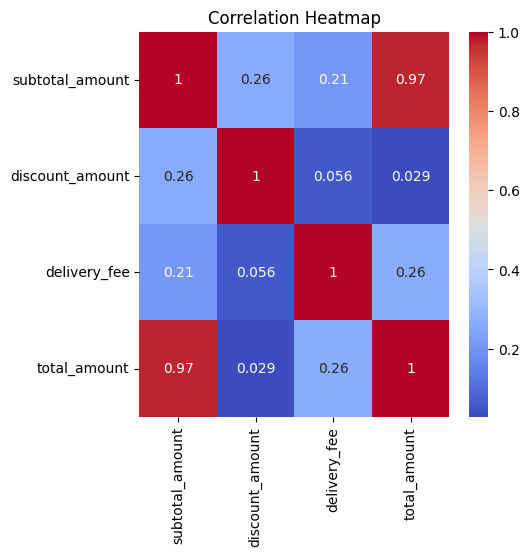

In [ ]:
corr_matrix = fact_orders_clean.corr(numeric_only=True)

plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
order_per_phase = fact_orders_clean.groupby('phase')['order_id'].count().reset_index()
order_per_phase.rename(columns={'order_id':'total_orders'}, inplace=True)
order_per_phase

phase  total_orders
0       crisis          8247
1  post-crisis         24035
2   pre-crisis        108760

In [ ]:
# No.of customer per phase
noOfCustomer_per_phase = customer_orders.groupby('phase')['customer_id'].count().reset_index()
noOfCustomer_per_phase.rename(columns={'customer_id':'noOfCustomer_per_phase'}, inplace=True)
noOfCustomer_per_phase

phase  noOfCustomer_per_phase
0       crisis                    7141
1  post-crisis                   22524
2   pre-crisis                   70358

In [ ]:
# Total order per phase by each customer
totalOrder_per_phase = customer_orders.groupby('phase')['total_orders'].sum()
totalOrder_per_phase

phase
crisis         11326
post-crisis    37700
pre-crisis     92016
Name: total_orders, dtype: int64

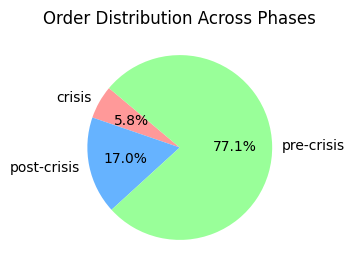

In [ ]:
# Pie chart
plt.figure(figsize=(4,3))
plt.pie(order_per_phase['total_orders'],
        labels=order_per_phase['phase'],
        autopct='%1.1f%%',  # show percentages
        startangle=140,
        colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Order Distribution Across Phases')
plt.show()

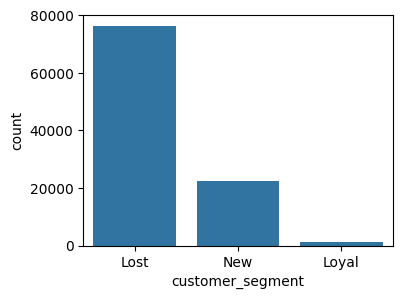

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data=customer_orders, x='customer_segment')
plt.show()

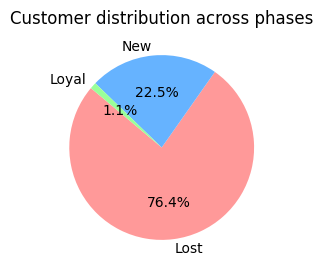

In [ ]:
import matplotlib.pyplot as plt

# Count of customers per segment
segment_counts = customer_orders['customer_segment'].value_counts()

plt.figure(figsize=(4,3))
plt.pie(segment_counts,
        labels=segment_counts.index,  # use the segment names
        autopct='%1.1f%%',
        startangle=140,
        colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Customer distribution across phases')
plt.show()


Average Order Value (AOV)

In [ ]:
# Average Order Value per order
avg_order_value_or = fact_orders_clean.groupby('phase')['total_amount'].mean().reset_index()
avg_order_value_or.rename(columns={'total_amount':'avg_order_value_or'}, inplace=True)
avg_order_value_or

phase  avg_order_value_or
0       crisis          339.767736
1  post-crisis          338.593168
2   pre-crisis          345.908094

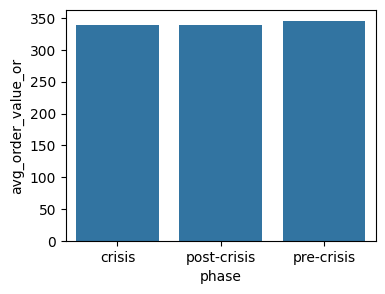

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(data=avg_order_value_or, x='phase', y='avg_order_value_or')
plt.show()

In [ ]:
avg_order_value_cus = customer_orders.groupby('phase')['Monetary'].mean().reset_index()
avg_order_value_cus.rename(columns={'Monetary':'avg_order_value_cus'}, inplace=True)
avg_order_value_cus

phase  avg_order_value_cus
0       crisis           542.423179
1  post-crisis           566.696803
2   pre-crisis           453.727975

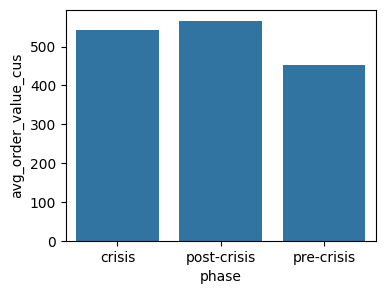

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(data=avg_order_value_cus, x='phase', y='avg_order_value_cus')
plt.show()

**Insights** <br>
Analysis of average order value (AOV) indicates consistency across all phases — approximately **Rs.340 per order and Rs.460–Rs.560 per customer**. This suggests that spending per order was steady, but per customer increased — likely because only high-value loyal users remained active.
However, **the sharp decline in the number of customers and total orders significantly reduced overall revenue, indicating that the primary impact of the crisis was customer loss rather than reduced basket size**.

In [ ]:
totalRevenue_per_phase = fact_orders_clean.groupby('phase')['total_amount'].sum().reset_index()
totalRevenue_per_phase.rename(columns={'total_amount':'totalRevenue_per_phase'}, inplace=True)
totalRevenue_per_phase

phase  totalRevenue_per_phase
0       crisis              2802064.52
1  post-crisis              8138086.79
2   pre-crisis             37620964.25

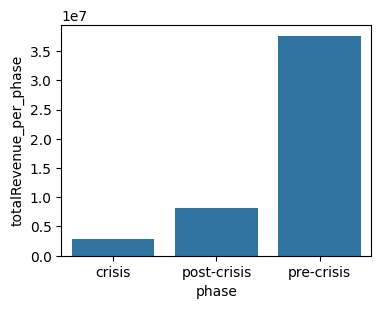

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(data=totalRevenue_per_phase, x='phase', y='totalRevenue_per_phase')
plt.show()

In [ ]:
# create a summary table
summary = (
    noOfCustomer_per_phase.merge(totalOrder_per_phase, on='phase')
    .merge(totalRevenue_per_phase, on='phase')
    .merge(avg_order_value_or, on='phase')
    .merge(avg_order_value_cus, on='phase')
)

summary

phase  noOfCustomer_per_phase  total_orders  totalRevenue_per_phase  \
0       crisis                    7141         11326              2802064.52   
1  post-crisis                   22524         37700              8138086.79   
2   pre-crisis                   70358         92016             37620964.25   

   avg_order_value_or  avg_order_value_cus  
0          339.767736           542.423179  
1          338.593168           566.696803  
2          345.908094           453.727975

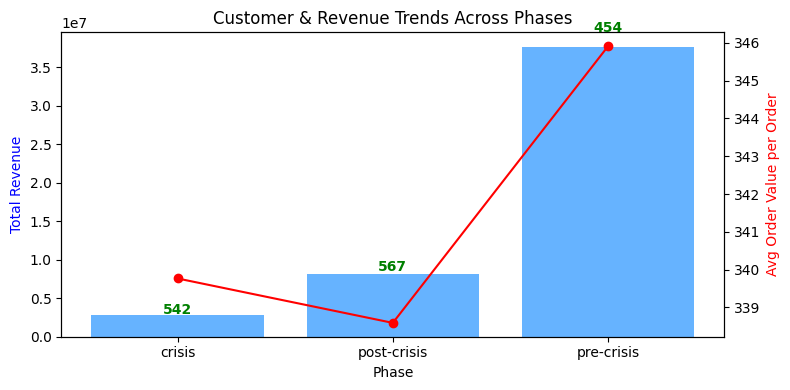

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,4))

# Bar chart for Total Revenue
ax1.bar(summary['phase'], summary['totalRevenue_per_phase'], label='Total Revenue', color='#66b3ff')
ax1.set_xlabel('Phase')
ax1.set_ylabel('Total Revenue', color='blue')
ax1.set_title('Customer & Revenue Trends Across Phases')

# Line chart for Avg Order Value per order
ax2 = ax1.twinx()
ax2.plot(summary['phase'], summary['avg_order_value_or'], color='red', marker='o', label='Avg Order Value per Order')
ax2.set_ylabel('Avg Order Value per Order', color='red')

# Add Avg Order Value per Customer as annotations
for i, val in enumerate(summary['avg_order_value_cus']):
    ax1.text(i, summary['totalRevenue_per_phase'][i]*1.05, f'{val:.0f}', color='green', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

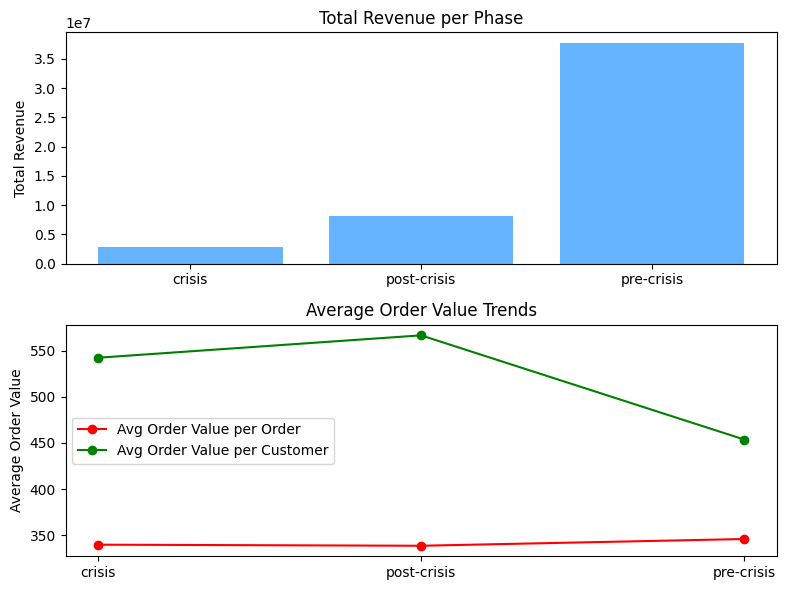

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6))

# Total Revenue
ax1.bar(summary['phase'], summary['totalRevenue_per_phase'], color='#66b3ff')
ax1.set_ylabel('Total Revenue')
ax1.set_title('Total Revenue per Phase')

# Avg Order Values
ax2.plot(summary['phase'], summary['avg_order_value_or'], color='red', marker='o', label='Avg Order Value per Order')
ax2.plot(summary['phase'], summary['avg_order_value_cus'], color='green', marker='o', label='Avg Order Value per Customer')
ax2.set_ylabel('Average Order Value')
ax2.set_title('Average Order Value Trends')
ax2.legend()

plt.tight_layout()
plt.show()

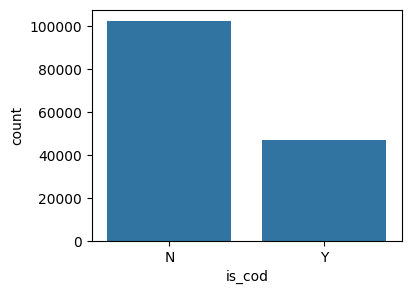

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data=fact_orders, x='is_cod')
plt.show()

In [ ]:
modeOfPayment_phase = fact_orders_clean.groupby('phase')['is_cod'].value_counts().reset_index()
modeOfPayment_phase

phase is_cod  count
0       crisis      N   5316
1       crisis      Y   2931
2  post-crisis      N  15640
3  post-crisis      Y   8395
4   pre-crisis      N  75895
5   pre-crisis      Y  32865

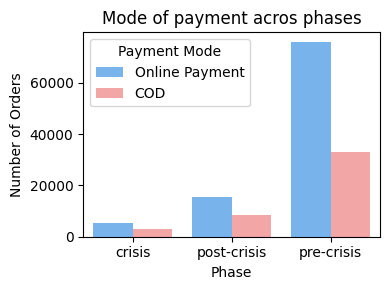

In [ ]:
# Make a copy for readability
df = modeOfPayment_phase.copy()

# Rename for clarity
df['is_cod'] = df['is_cod'].map({'Y': 'COD', 'N': 'Online Payment'})

plt.figure(figsize=(4,3))
sns.barplot(data=df, x='phase', y='count', hue='is_cod', palette=['#66b3ff', '#ff9999'])
plt.title('Mode of payment acros phases')

plt.xlabel('Phase')
plt.ylabel('Number of Orders')
plt.legend(title='Payment Mode')
plt.tight_layout()
plt.show()

In [ ]:
modeOfPayment_phase['percent'] = modeOfPayment_phase.groupby('phase')['count'].transform(lambda x: 100 * x / x.sum())
modeOfPayment_phase

phase is_cod  count    percent
0       crisis      N   5316  64.459804
1       crisis      Y   2931  35.540196
2  post-crisis      N  15640  65.071770
3  post-crisis      Y   8395  34.928230
4   pre-crisis      N  75895  69.782089
5   pre-crisis      Y  32865  30.217911

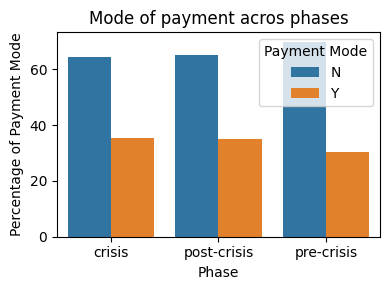

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(data=modeOfPayment_phase, x='phase', y='percent', hue='is_cod', palette=['#1f77b4', '#ff7f0e'])
plt.title('Mode of payment acros phases')

plt.xlabel('Phase')
plt.ylabel('Percentage of Payment Mode')
plt.legend(title='Payment Mode')
plt.tight_layout()
plt.show()

**Insight** <br>
The mode of payment distribution remained broadly similar across phases, with online payments consistently dominating (~65–70% of orders).
However, there was a slight increase in COD preference during and after the crisis (from 30% to ~35%), possibly due to reduced customer trust or uncertainty around refunds during the crisis period.

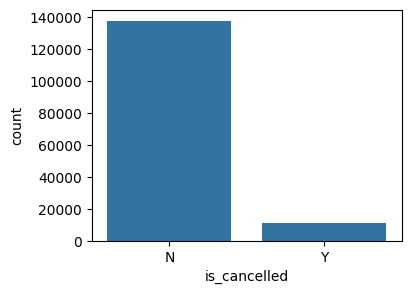

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data=fact_orders, x='is_cancelled')
plt.show()

In [ ]:
df

phase          is_cod  count
0       crisis  Online Payment   5316
1       crisis             COD   2931
2  post-crisis  Online Payment  15640
3  post-crisis             COD   8395
4   pre-crisis  Online Payment  75895
5   pre-crisis             COD  32865

In [ ]:
checkOrderCancelled_phase = fact_orders_clean.groupby('phase')['is_cancelled'].value_counts().reset_index()
checkOrderCancelled_phase

phase is_cancelled   count
0       crisis            N    7973
1       crisis            Y     274
2  post-crisis            N   23169
3  post-crisis            Y     866
4   pre-crisis            N  106912
5   pre-crisis            Y    1848

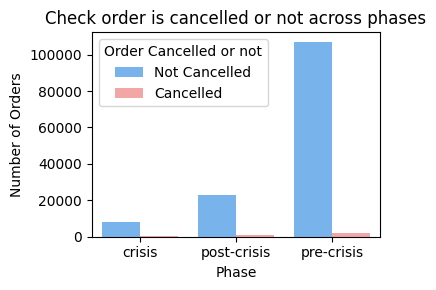

In [ ]:
df = checkOrderCancelled_phase.copy()

# Rename for clarity
df['is_cancelled'] = df['is_cancelled'].map({'Y': 'Cancelled', 'N': 'Not Cancelled'})

plt.figure(figsize=(4,3))
sns.barplot(data=df, x='phase', y='count', hue='is_cancelled', palette=['#66b3ff', '#ff9999'])
plt.title('Check order is cancelled or not across phases')

plt.xlabel('Phase')
plt.ylabel('Number of Orders')
plt.legend(title='Order Cancelled or not')
plt.tight_layout()
plt.show()

In [ ]:
checkOrderCancelled_phase['percent'] = checkOrderCancelled_phase.groupby('phase')['count'].transform(lambda x: 100 * x / x.sum())
checkOrderCancelled_phase

phase is_cancelled   count    percent
0       crisis            N    7973  96.677580
1       crisis            Y     274   3.322420
2  post-crisis            N   23169  96.396921
3  post-crisis            Y     866   3.603079
4   pre-crisis            N  106912  98.300846
5   pre-crisis            Y    1848   1.699154

**Cancellation rate**<br>

* Pre-crisis: Very low cancellations (1.7%) — operations were stable.

* Crisis: Cancellations increased to 3.3% (possibly due to delivery issues or food safety concerns).

* Post-crisis: Stayed high at 3.6%, meaning customer confidence hadn’t fully recovered yet.



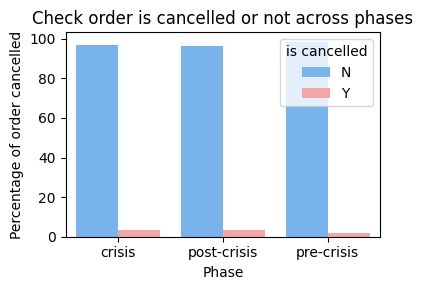

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(data=checkOrderCancelled_phase, x='phase', y='percent', hue='is_cancelled', palette=['#66b3ff', '#ff9999'])
plt.title('Check order is cancelled or not across phases')

plt.xlabel('Phase')
plt.ylabel('Percentage of order cancelled')
plt.legend(title='is cancelled')
plt.tight_layout()
plt.show()

**Insight**<br>
Order cancellations were consistently very low across all phases, ranging from 1.7% pre-crisis to 3.6% post-crisis. This indicates that while customer numbers dropped during the crisis, those who placed orders largely completed them, so cancellations had minimal impact on revenue. But still have to work to decerease the increased cancellation rate.

In [ ]:
monthly_orders = fact_orders_clean.groupby(pd.Grouper(key='order_timestamp', freq='M')).size().reset_index(name='monthly_orders')
monthly_orders

/tmp/ipython-input-193193064.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = fact_orders_clean.groupby(pd.Grouper(key='order_timestamp', freq='M')).size().reset_index(name='monthly_orders')


order_timestamp  monthly_orders
0      2025-01-31           22454
1      2025-02-28           21641
2      2025-03-31           22506
3      2025-04-30           20560
4      2025-05-31           21599
5      2025-06-30            8505
6      2025-07-31            8050
7      2025-08-31            7760
8      2025-09-30            7967

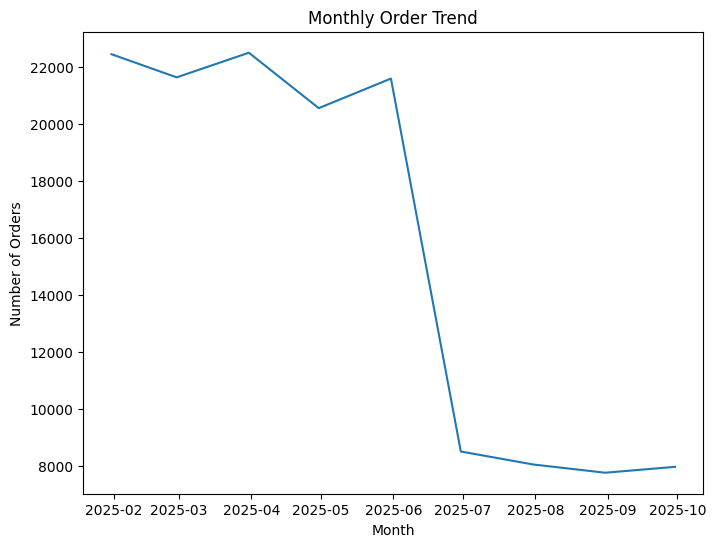

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(data=monthly_orders, x='order_timestamp', y='monthly_orders')
plt.title('Monthly Order Trend')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

In [ ]:
monthly_orders_phase = fact_orders_clean.groupby([pd.Grouper(key='order_timestamp', freq='MS'), 'phase']).size().reset_index(name='monthly_orders')
monthly_orders_phase

order_timestamp        phase  monthly_orders
0      2025-01-01   pre-crisis           22454
1      2025-02-01   pre-crisis           21641
2      2025-03-01   pre-crisis           22506
3      2025-04-01   pre-crisis           20560
4      2025-05-01   pre-crisis           21599
5      2025-06-01       crisis            8247
6      2025-06-01  post-crisis             258
7      2025-07-01  post-crisis            8050
8      2025-08-01  post-crisis            7760
9      2025-09-01  post-crisis            7967

Text(0.5, 1.0, 'Monthly Order Trend Across Phases')

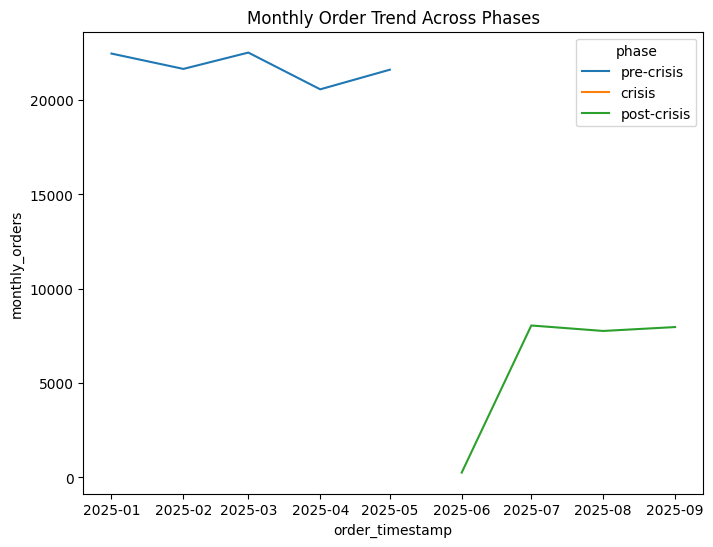

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(data=monthly_orders_phase, x='order_timestamp', y='monthly_orders', hue='phase')
plt.title('Monthly Order Trend Across Phases')

In [ ]:
monthly_orders_phase_2 = fact_orders_clean.set_index('order_timestamp').groupby('phase')['order_id'].resample('M').count().unstack(0)
monthly_orders_phase_2

/tmp/ipython-input-1043376079.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_phase_2 = fact_orders_clean.set_index('order_timestamp').groupby('phase')['order_id'].resample('M').count().unstack(0)


phase            crisis  post-crisis  pre-crisis
order_timestamp                                 
2025-01-31          NaN          NaN     22454.0
2025-02-28          NaN          NaN     21641.0
2025-03-31          NaN          NaN     22506.0
2025-04-30          NaN          NaN     20560.0
2025-05-31          NaN          NaN     21599.0
2025-06-30       8247.0        258.0         NaN
2025-07-31          NaN       8050.0         NaN
2025-08-31          NaN       7760.0         NaN
2025-09-30          NaN       7967.0         NaN

<Figure size 800x600 with 0 Axes>

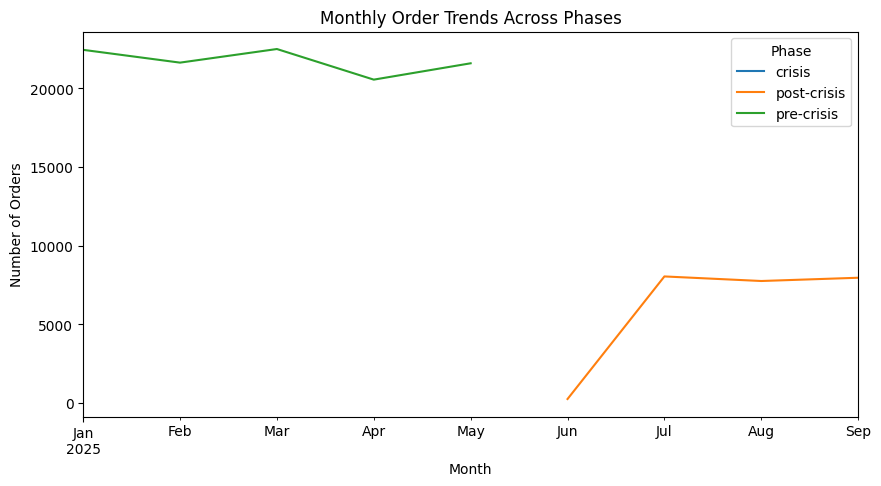

In [ ]:
plt.figure(figsize=(8,6))
monthly_orders_phase_2.plot(figsize=(10,5))
plt.title('Monthly Order Trends Across Phases')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(title='Phase')
plt.show()

**Insight**<br>
There is a sharp decline in no.of orders in the crisis phase i.e in month of June. In post-crisis phase there is partial recovery, all the months in post-crisis phase near about same sale.

In [ ]:
weekly_orders = fact_orders_clean.groupby(pd.Grouper(key='order_timestamp', freq='W')).size().reset_index(name='weekly_orders')
weekly_orders

order_timestamp  weekly_orders
0       2025-01-05           3605
1       2025-01-12           5153
2       2025-01-19           5011
3       2025-01-26           5074
4       2025-02-02           5194
5       2025-02-09           5385
6       2025-02-16           5468
7       2025-02-23           5420
8       2025-03-02           5258
9       2025-03-09           5138
10      2025-03-16           5088
11      2025-03-23           5023
12      2025-03-30           5080
13      2025-04-06           4768
14      2025-04-13           4834
15      2025-04-20           4814
16      2025-04-27           4865
17      2025-05-04           4792
18      2025-05-11           4824
19      2025-05-18           4904
20      2025-05-25           4906
21      2025-06-01           4432
22      2025-06-08           2046
23      2025-06-15           1997
24      2025-06-22           1906
25      2025-06-29           2022
26      2025-07-06           1828
27      2025-07-13           1758
28      2025-07-20           1852
29      2025-07-27           1831
30      2025-08-03           1815
31      2025-08-10           1824
32      2025-08-17           1675
33      2025-08-24           1686
34      2025-08-31           1799
35      2025-09-07           1841
36      2025-09-14           1876
37      2025-09-21           1802
38      2025-09-28           1920
39      2025-10-05            528

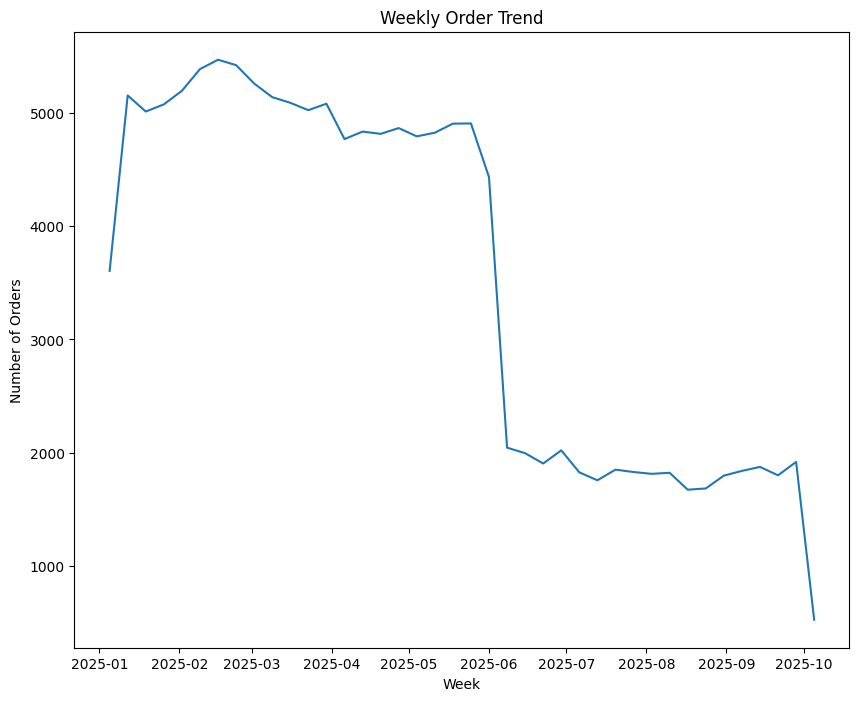

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=weekly_orders, x='order_timestamp', y='weekly_orders')
plt.title('Weekly Order Trend')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.show()

In [ ]:
weekly_orders['month'] = weekly_orders['order_timestamp'].dt.to_period('M').astype(str)
weekly_orders

order_timestamp  weekly_orders    month
0       2025-01-05           3605  2025-01
1       2025-01-12           5153  2025-01
2       2025-01-19           5011  2025-01
3       2025-01-26           5074  2025-01
4       2025-02-02           5194  2025-02
5       2025-02-09           5385  2025-02
6       2025-02-16           5468  2025-02
7       2025-02-23           5420  2025-02
8       2025-03-02           5258  2025-03
9       2025-03-09           5138  2025-03
10      2025-03-16           5088  2025-03
11      2025-03-23           5023  2025-03
12      2025-03-30           5080  2025-03
13      2025-04-06           4768  2025-04
14      2025-04-13           4834  2025-04
15      2025-04-20           4814  2025-04
16      2025-04-27           4865  2025-04
17      2025-05-04           4792  2025-05
18      2025-05-11           4824  2025-05
19      2025-05-18           4904  2025-05
20      2025-05-25           4906  2025-05
21      2025-06-01           4432  2025-06
22      2025-06-08           2046  2025-06
23      2025-06-15           1997  2025-06
24      2025-06-22           1906  2025-06
25      2025-06-29           2022  2025-06
26      2025-07-06           1828  2025-07
27      2025-07-13           1758  2025-07
28      2025-07-20           1852  2025-07
29      2025-07-27           1831  2025-07
30      2025-08-03           1815  2025-08
31      2025-08-10           1824  2025-08
32      2025-08-17           1675  2025-08
33      2025-08-24           1686  2025-08
34      2025-08-31           1799  2025-08
35      2025-09-07           1841  2025-09
36      2025-09-14           1876  2025-09
37      2025-09-21           1802  2025-09
38      2025-09-28           1920  2025-09
39      2025-10-05            528  2025-10

In [ ]:
weekly_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_timestamp  40 non-null     datetime64[ns]
 1   weekly_orders    40 non-null     int64         
 2   month            40 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
weekly_orders['week_of_month'] = weekly_orders.groupby('month').cumcount() + 1
weekly_orders

order_timestamp  weekly_orders    month  week_of_month
0       2025-01-05           3605  2025-01              1
1       2025-01-12           5153  2025-01              2
2       2025-01-19           5011  2025-01              3
3       2025-01-26           5074  2025-01              4
4       2025-02-02           5194  2025-02              1
5       2025-02-09           5385  2025-02              2
6       2025-02-16           5468  2025-02              3
7       2025-02-23           5420  2025-02              4
8       2025-03-02           5258  2025-03              1
9       2025-03-09           5138  2025-03              2
10      2025-03-16           5088  2025-03              3
11      2025-03-23           5023  2025-03              4
12      2025-03-30           5080  2025-03              5
13      2025-04-06           4768  2025-04              1
14      2025-04-13           4834  2025-04              2
15      2025-04-20           4814  2025-04              3
16      2025-04-27           4865  2025-04              4
17      2025-05-04           4792  2025-05              1
18      2025-05-11           4824  2025-05              2
19      2025-05-18           4904  2025-05              3
20      2025-05-25           4906  2025-05              4
21      2025-06-01           4432  2025-06              1
22      2025-06-08           2046  2025-06              2
23      2025-06-15           1997  2025-06              3
24      2025-06-22           1906  2025-06              4
25      2025-06-29           2022  2025-06              5
26      2025-07-06           1828  2025-07              1
27      2025-07-13           1758  2025-07              2
28      2025-07-20           1852  2025-07              3
29      2025-07-27           1831  2025-07              4
30      2025-08-03           1815  2025-08              1
31      2025-08-10           1824  2025-08              2
32      2025-08-17           1675  2025-08              3
33      2025-08-24           1686  2025-08              4
34      2025-08-31           1799  2025-08              5
35      2025-09-07           1841  2025-09              1
36      2025-09-14           1876  2025-09              2
37      2025-09-21           1802  2025-09              3
38      2025-09-28           1920  2025-09              4
39      2025-10-05            528  2025-10              1

In [ ]:
# week with max sale per month
max_week_per_month = weekly_orders.loc[weekly_orders.groupby('month')['weekly_orders'].idxmax()][['month', 'week_of_month', 'weekly_orders']]
max_week_per_month

month  week_of_month  weekly_orders
1   2025-01              2           5153
6   2025-02              3           5468
8   2025-03              1           5258
16  2025-04              4           4865
20  2025-05              4           4906
21  2025-06              1           4432
28  2025-07              3           1852
31  2025-08              2           1824
38  2025-09              4           1920
39  2025-10              1            528

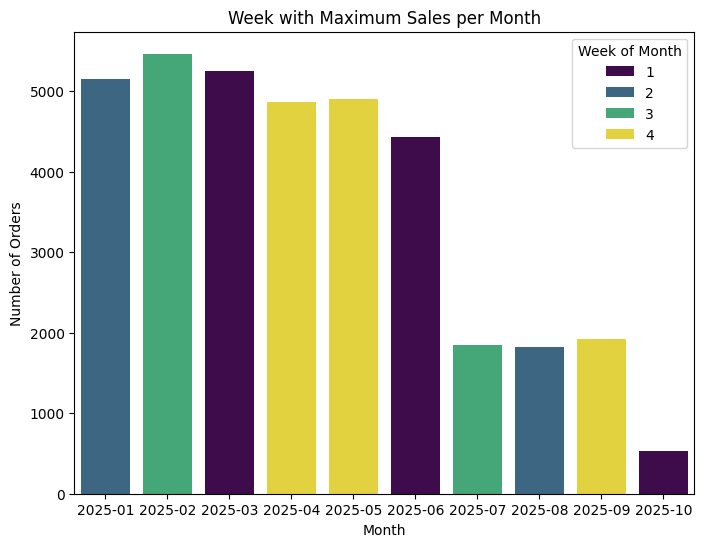

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=max_week_per_month, x='month', y='weekly_orders', hue='week_of_month', palette='viridis')
plt.title('Week with Maximum Sales per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(title='Week of Month')
plt.show()

**Insight**<br>
If we consider the whole dataset (from Jan to Oct) then maximum time sale increased on **4th and 1st week** of the month.
But after crisis phase (i.e after June) there is no such trend is followed.

In [ ]:
day_of_week_phase = fact_orders_clean.groupby([fact_orders_clean['order_timestamp'].dt.day_name(), 'phase']).size().unstack(1)
day_of_week_phase

phase            crisis  post-crisis  pre-crisis
order_timestamp                                 
Friday             1171         3364       15951
Monday             1133         3743       14926
Saturday           1139         3275       15878
Sunday             1417         3371       15189
Thursday           1137         3343       15882
Tuesday            1127         3612       15094
Wednesday          1123         3327       15840

In [ ]:
day_of_week_phase = day_of_week_phase.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_of_week_phase

phase            crisis  post-crisis  pre-crisis
order_timestamp                                 
Monday             1133         3743       14926
Tuesday            1127         3612       15094
Wednesday          1123         3327       15840
Thursday           1137         3343       15882
Friday             1171         3364       15951
Saturday           1139         3275       15878
Sunday             1417         3371       15189

Text(0, 0.5, 'Number of Orders')

<Figure size 800x600 with 0 Axes>

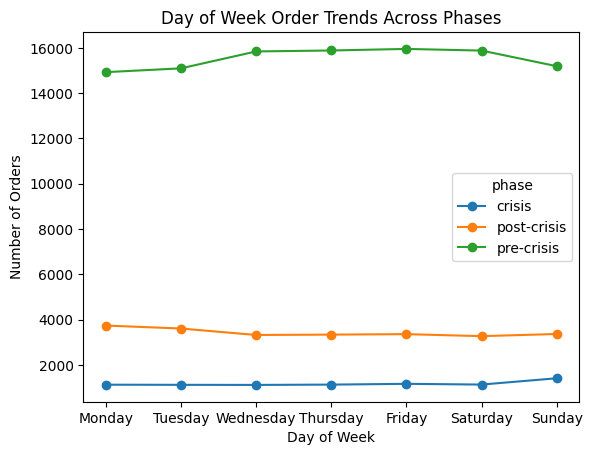

In [ ]:
plt.figure(figsize=(8,6))
day_of_week_phase.plot(kind='line', marker='o')
plt.title('Day of Week Order Trends Across Phases')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')

In [ ]:
daywise_orders = (day_of_week_phase.div(day_of_week_phase.sum(axis=0), axis=1)*100).round(2)
daywise_orders

phase            crisis  post-crisis  pre-crisis
order_timestamp                                 
Monday            13.74        15.57       13.72
Tuesday           13.67        15.03       13.88
Wednesday         13.62        13.84       14.56
Thursday          13.79        13.91       14.60
Friday            14.20        14.00       14.67
Saturday          13.81        13.63       14.60
Sunday            17.18        14.03       13.97

In [ ]:
daywise_orders_str = daywise_orders.astype(str) + '%'
daywise_orders_str

phase            crisis post-crisis pre-crisis
order_timestamp                               
Monday           13.74%      15.57%     13.72%
Tuesday          13.67%      15.03%     13.88%
Wednesday        13.62%      13.84%     14.56%
Thursday         13.79%      13.91%      14.6%
Friday            14.2%       14.0%     14.67%
Saturday         13.81%      13.63%      14.6%
Sunday           17.18%      14.03%     13.97%

<Figure size 800x600 with 0 Axes>

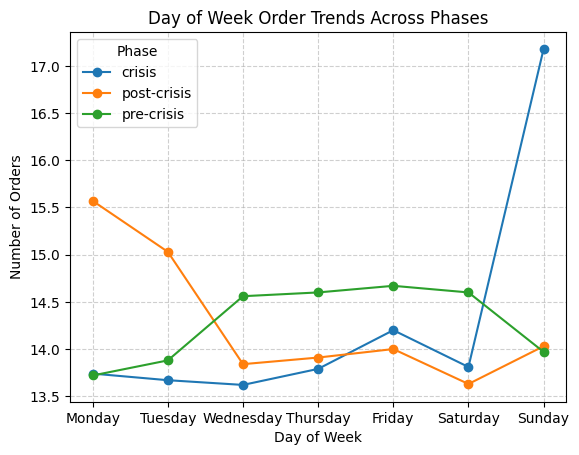

In [ ]:
plt.figure(figsize=(8,6))
daywise_orders.plot(kind='line', marker='o')
plt.title('Day of Week Order Trends Across Phases')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Phase')
plt.show()

**Insight**<br>
* In pre-crisis phase week days was having maximum no.of orders.
* In crisis phase no.of orders was maximum in Sunday.
* In post-crisis phase no.of order is maximum on Monday then Tuesday.

### Restaurant Partnerships: Predict which partnerships are most valuable for long-term retention.

In [ ]:
fact_orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141042 entries, 0 to 149165
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             141042 non-null  object        
 1   customer_id          141042 non-null  object        
 2   restaurant_id        141042 non-null  object        
 3   delivery_partner_id  141042 non-null  object        
 4   order_timestamp      141042 non-null  datetime64[ns]
 5   subtotal_amount      141042 non-null  float64       
 6   discount_amount      141042 non-null  float64       
 7   delivery_fee         141042 non-null  float64       
 8   total_amount         141042 non-null  float64       
 9   is_cod               141042 non-null  object        
 10  is_cancelled         141042 non-null  object        
 11  phase                141042 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 14.0+ MB


In [ ]:
dim_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19995 entries, 0 to 19994
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   restaurant_id      19995 non-null  object
 1   restaurant_name    19995 non-null  object
 2   city               19995 non-null  object
 3   cuisine_type       19995 non-null  object
 4   partner_type       19995 non-null  object
 5   avg_prep_time_min  19995 non-null  object
 6   is_active          19995 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [ ]:
orders_and_restaurant = fact_orders_clean.merge(
    dim_restaurant, on='restaurant_id', how='left'
)
orders_and_restaurant.head()

order_id customer_id restaurant_id delivery_partner_id  \
0  ORD202501023439  CUST181110     REST08622             DP05541   
1  ORD202501012051  CUST025572     REST02383             DP08091   
2  ORD202501019281  CUST179306     REST14069             DP02021   
3  ORD202501000124  CUST191820     REST19745             DP13859   
4  ORD202501006518  CUST033760     REST12962             DP09615   

      order_timestamp  subtotal_amount  discount_amount  delivery_fee  \
0 2025-01-01 12:00:00           471.62            35.44         30.56   
1 2025-01-01 12:00:00           255.68             0.00         27.45   
2 2025-01-01 12:00:00           428.38             0.00         26.23   
3 2025-01-01 12:00:00           260.81             0.00         32.75   
4 2025-01-01 12:00:00           280.33             0.00         25.57   

   total_amount is_cod is_cancelled       phase            restaurant_name  \
0        466.74      N            N  pre-crisis          Spicy Wraps Point   
1        283.13      Y            N  pre-crisis         Namma Mess Delight   
2        454.61      N            N  pre-crisis       Royal Biryani Darbar   
3        293.56      N            N  pre-crisis       Delhi Express Palace   
4        305.90      N            N  pre-crisis  Flavours of Sweets Palace   

        city  cuisine_type   partner_type avg_prep_time_min is_active  
0     Mumbai  North Indian     Restaurant             16-25         Y  
1     Mumbai       Healthy     Restaurant             26-40         Y  
2  Ahmedabad     Fast Food     Restaurant             16-25         Y  
3  Ahmedabad         Pizza  Cloud Kitchen             16-25         Y  
4  Bengaluru       Chinese     Restaurant             26-40         N

In [ ]:
orders_and_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141042 entries, 0 to 141041
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             141042 non-null  object        
 1   customer_id          141042 non-null  object        
 2   restaurant_id        141042 non-null  object        
 3   delivery_partner_id  141042 non-null  object        
 4   order_timestamp      141042 non-null  datetime64[ns]
 5   subtotal_amount      141042 non-null  float64       
 6   discount_amount      141042 non-null  float64       
 7   delivery_fee         141042 non-null  float64       
 8   total_amount         141042 non-null  float64       
 9   is_cod               141042 non-null  object        
 10  is_cancelled         141042 non-null  object        
 11  phase                141042 non-null  object        
 12  restaurant_name      141042 non-null  object        
 13  city          

In [ ]:
cuisine_trends = orders_and_restaurant.groupby(['phase','cuisine_type']).size().reset_index(name='order_count')
cuisine_trends

phase  cuisine_type  order_count
0        crisis       Biryani         1186
1        crisis       Chinese         1261
2        crisis      Desserts          654
3        crisis     Fast Food          810
4        crisis       Healthy          378
5        crisis  North Indian         1624
6        crisis         Pizza         1072
7        crisis  South Indian         1262
8   post-crisis       Biryani         3731
9   post-crisis       Chinese         3574
10  post-crisis      Desserts         1870
11  post-crisis     Fast Food         2364
12  post-crisis       Healthy         1256
13  post-crisis  North Indian         4754
14  post-crisis         Pizza         2905
15  post-crisis  South Indian         3581
16   pre-crisis       Biryani        16411
17   pre-crisis       Chinese        16025
18   pre-crisis      Desserts         8911
19   pre-crisis     Fast Food        10608
20   pre-crisis       Healthy         5518
21   pre-crisis  North Indian        21448
22   pre-crisis         Pizza        13449
23   pre-crisis  South Indian        16390

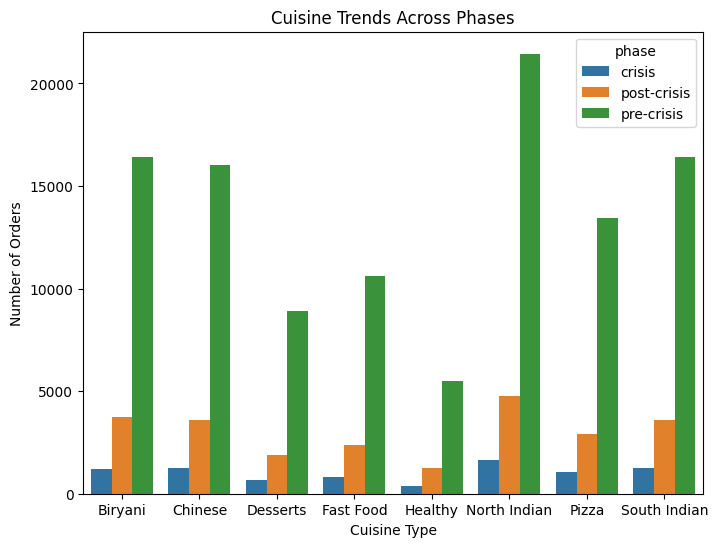

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=cuisine_trends, x='cuisine_type', y='order_count', hue='phase')
plt.title('Cuisine Trends Across Phases')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.show()

**Insight**<br>
no.of orders is maximum for **North Indian** food in all **3 phases**, followed by **South Indian, Biryani, Chinese**.

In [ ]:
city_level_shift = orders_and_restaurant.groupby(['phase','city']).size().reset_index(name='orders')
city_level_shift

phase       city  orders
0        crisis  Ahmedabad     654
1        crisis  Bengaluru    2005
2        crisis    Chennai     778
3        crisis      Delhi    1269
4        crisis  Hyderabad     852
5        crisis    Kolkata     773
6        crisis     Mumbai    1234
7        crisis       Pune     682
8   post-crisis  Ahmedabad    2001
9   post-crisis  Bengaluru    5948
10  post-crisis    Chennai    2354
11  post-crisis      Delhi    3611
12  post-crisis  Hyderabad    2423
13  post-crisis    Kolkata    2166
14  post-crisis     Mumbai    3550
15  post-crisis       Pune    1982
16   pre-crisis  Ahmedabad    8938
17   pre-crisis  Bengaluru   26958
18   pre-crisis    Chennai   11029
19   pre-crisis      Delhi   16083
20   pre-crisis  Hyderabad   11044
21   pre-crisis    Kolkata   10012
22   pre-crisis     Mumbai   16071
23   pre-crisis       Pune    8625

In [ ]:
city_level_shift = city_level_shift.sort_values(by='orders', ascending=True).reset_index(drop=True)
city_level_shift

phase       city  orders
0        crisis  Ahmedabad     654
1        crisis       Pune     682
2        crisis    Kolkata     773
3        crisis    Chennai     778
4        crisis  Hyderabad     852
5        crisis     Mumbai    1234
6        crisis      Delhi    1269
7   post-crisis       Pune    1982
8   post-crisis  Ahmedabad    2001
9        crisis  Bengaluru    2005
10  post-crisis    Kolkata    2166
11  post-crisis    Chennai    2354
12  post-crisis  Hyderabad    2423
13  post-crisis     Mumbai    3550
14  post-crisis      Delhi    3611
15  post-crisis  Bengaluru    5948
16   pre-crisis       Pune    8625
17   pre-crisis  Ahmedabad    8938
18   pre-crisis    Kolkata   10012
19   pre-crisis    Chennai   11029
20   pre-crisis  Hyderabad   11044
21   pre-crisis     Mumbai   16071
22   pre-crisis      Delhi   16083
23   pre-crisis  Bengaluru   26958

In [ ]:
city_level_shift = city_level_shift.sort_values(by=['phase', 'orders'], ascending=[False, False]).reset_index(drop=True)
city_level_shift

phase       city  orders
0    pre-crisis  Bengaluru   26958
1    pre-crisis      Delhi   16083
2    pre-crisis     Mumbai   16071
3    pre-crisis  Hyderabad   11044
4    pre-crisis    Chennai   11029
5    pre-crisis    Kolkata   10012
6    pre-crisis  Ahmedabad    8938
7    pre-crisis       Pune    8625
8   post-crisis  Bengaluru    5948
9   post-crisis      Delhi    3611
10  post-crisis     Mumbai    3550
11  post-crisis  Hyderabad    2423
12  post-crisis    Chennai    2354
13  post-crisis    Kolkata    2166
14  post-crisis  Ahmedabad    2001
15  post-crisis       Pune    1982
16       crisis  Bengaluru    2005
17       crisis      Delhi    1269
18       crisis     Mumbai    1234
19       crisis  Hyderabad     852
20       crisis    Chennai     778
21       crisis    Kolkata     773
22       crisis       Pune     682
23       crisis  Ahmedabad     654

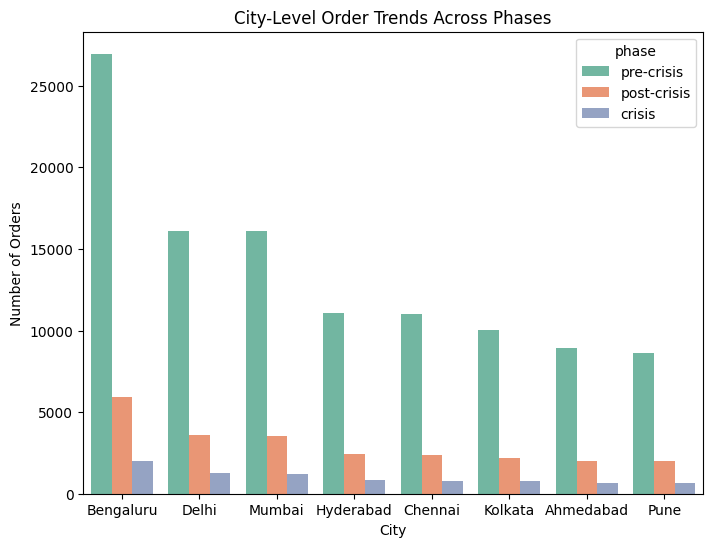

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=city_level_shift, x='city', y='orders', hue='phase', palette='Set2')
plt.title('City-Level Order Trends Across Phases')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.show()

**Insights**<br>
**Bengaluru** has the highest no.of order in 3 phases [post-crisis, crisis, post-crisis], followed by **Delhi**. Least no.of order is done from **Pune** during pre-crisis and post-crisis phase and **Ahmedabad** have least no.of order during crisis phase.

In [ ]:
city_pivot = city_level_shift.pivot_table(index='city', columns='phase', values='orders', aggfunc='sum')
city_pivot

phase      crisis  post-crisis  pre-crisis
city                                      
Ahmedabad     654         2001        8938
Bengaluru    2005         5948       26958
Chennai       778         2354       11029
Delhi        1269         3611       16083
Hyderabad     852         2423       11044
Kolkata       773         2166       10012
Mumbai       1234         3550       16071
Pune          682         1982        8625

In [ ]:
city_pivot = city_pivot.reset_index()
city_pivot.columns.name = None  # removes the 'phase' label on top
city_pivot

city  crisis  post-crisis  pre-crisis
0  Ahmedabad     654         2001        8938
1  Bengaluru    2005         5948       26958
2    Chennai     778         2354       11029
3      Delhi    1269         3611       16083
4  Hyderabad     852         2423       11044
5    Kolkata     773         2166       10012
6     Mumbai    1234         3550       16071
7       Pune     682         1982        8625

In [ ]:
# percentage drop (Pre-crisis → Crisis)
city_pivot['drop_pct'] = ((city_pivot['pre-crisis'] - city_pivot['crisis']) / city_pivot['pre-crisis']) * 100
city_pivot

city  crisis  post-crisis  pre-crisis   drop_pct
0  Ahmedabad     654         2001        8938  92.682927
1  Bengaluru    2005         5948       26958  92.562505
2    Chennai     778         2354       11029  92.945870
3      Delhi    1269         3611       16083  92.109681
4  Hyderabad     852         2423       11044  92.285404
5    Kolkata     773         2166       10012  92.279265
6     Mumbai    1234         3550       16071  92.321573
7       Pune     682         1982        8625  92.092754

/tmp/ipython-input-3986829438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_pivot, x='city', y='drop_pct', palette='Pastel1')


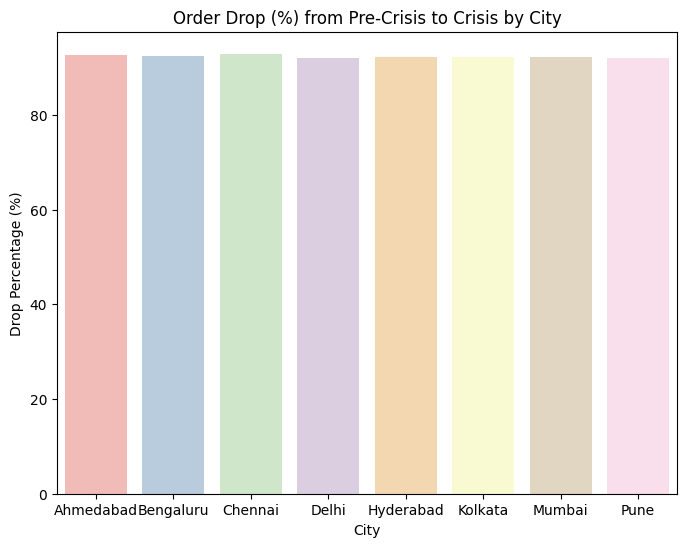

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=city_pivot, x='city', y='drop_pct', palette='Pastel1')
plt.title('Order Drop (%) from Pre-Crisis to Crisis by City')
plt.xlabel('City')
plt.ylabel('Drop Percentage (%)')
plt.show()

In [ ]:
# percentage (Crisis → Post-crisis)
city_pivot['recovery_pct'] = ((city_pivot['post-crisis'] - city_pivot['crisis']) / city_pivot['crisis']) * 100
city_pivot

city  crisis  post-crisis  pre-crisis   drop_pct  recovery_pct
0  Ahmedabad     654         2001        8938  92.682927    205.963303
1  Bengaluru    2005         5948       26958  92.562505    196.658354
2    Chennai     778         2354       11029  92.945870    202.570694
3      Delhi    1269         3611       16083  92.109681    184.554768
4  Hyderabad     852         2423       11044  92.285404    184.389671
5    Kolkata     773         2166       10012  92.279265    180.206986
6     Mumbai    1234         3550       16071  92.321573    187.682334
7       Pune     682         1982        8625  92.092754    190.615836

In [ ]:
city_pivot.sort_values(by='recovery_pct', ascending=False, inplace=True)
city_pivot

city  crisis  post-crisis  pre-crisis   drop_pct  recovery_pct
0  Ahmedabad     654         2001        8938  92.682927    205.963303
2    Chennai     778         2354       11029  92.945870    202.570694
1  Bengaluru    2005         5948       26958  92.562505    196.658354
7       Pune     682         1982        8625  92.092754    190.615836
6     Mumbai    1234         3550       16071  92.321573    187.682334
3      Delhi    1269         3611       16083  92.109681    184.554768
4  Hyderabad     852         2423       11044  92.285404    184.389671
5    Kolkata     773         2166       10012  92.279265    180.206986

/tmp/ipython-input-3828506418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_pivot, x='city', y='recovery_pct', palette='Set2')


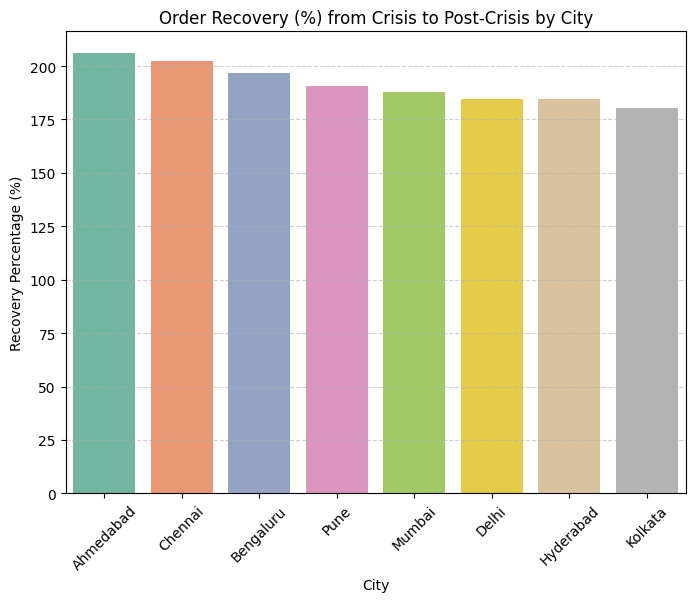

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=city_pivot, x='city', y='recovery_pct', palette='Set2')
plt.title('Order Recovery (%) from Crisis to Post-Crisis by City')
plt.xlabel('City')
plt.ylabel('Recovery Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Insight**<br>
Highest recovery in **Ahmedabad** and least recovery in **Kolkata**.
Have to pay special attention to Kolkata.

In [ ]:
partner_type_shift = orders_and_restaurant.groupby(['phase','partner_type']).size().reset_index(name='orders')
partner_type_shift

phase   partner_type  orders
0       crisis  Cloud Kitchen    2485
1       crisis     Restaurant    5762
2  post-crisis  Cloud Kitchen    7177
3  post-crisis     Restaurant   16858
4   pre-crisis  Cloud Kitchen   32199
5   pre-crisis     Restaurant   76561

Text(0.5, 0, 'Partner Type')

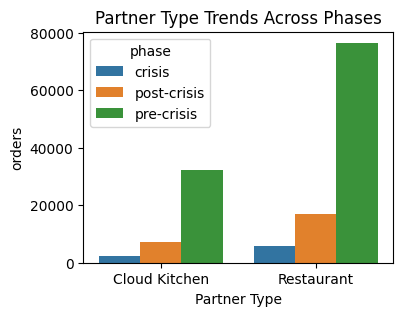

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(data=partner_type_shift, x='partner_type', y='orders', hue='phase')
plt.title('Partner Type Trends Across Phases')
plt.xlabel('Partner Type')

**Insight**<br>
Partner type **Restaurant** has maximum no.of orders in all 3 phases. So Partner type has no effect after crisis phase.

In [ ]:
avg_prep_time_phase = orders_and_restaurant.groupby(['phase','avg_prep_time_min']).size().reset_index(name='orders')
avg_prep_time_phase

phase avg_prep_time_min  orders
0        crisis             16-25    3290
1        crisis             26-40    2135
2        crisis              <=15    2050
3        crisis               >40     772
4   post-crisis             16-25    9538
5   post-crisis             26-40    6161
6   post-crisis              <=15    5882
7   post-crisis               >40    2454
8    pre-crisis             16-25   43180
9    pre-crisis             26-40   27171
10   pre-crisis              <=15   27536
11   pre-crisis               >40   10873

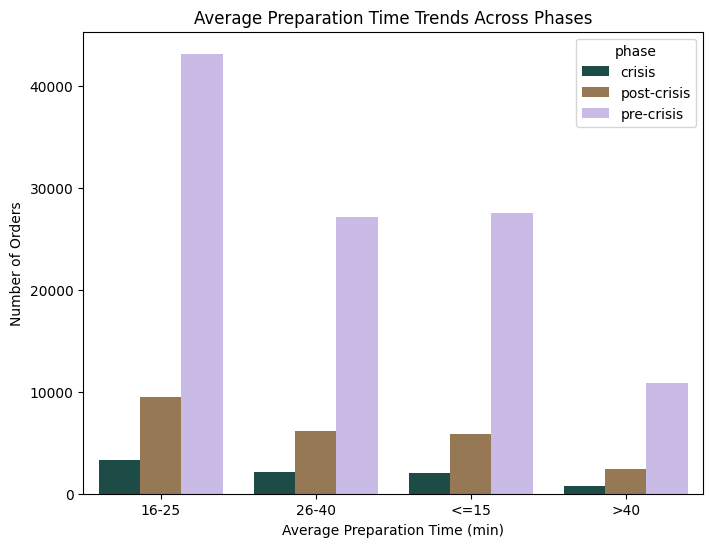

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=avg_prep_time_phase, x='avg_prep_time_min', y='orders', hue='phase', palette='cubehelix' )
plt.title('Average Preparation Time Trends Across Phases')
plt.xlabel('Average Preparation Time (min)')
plt.ylabel('Number of Orders')
plt.show()

In [ ]:
prep_pivot = avg_prep_time_phase.pivot(index='phase',  columns='avg_prep_time_min', values='orders')
prep_pivot

avg_prep_time_min  16-25  26-40   <=15    >40
phase                                        
crisis              3290   2135   2050    772
post-crisis         9538   6161   5882   2454
pre-crisis         43180  27171  27536  10873

In [ ]:
prep_pivot = prep_pivot.div(prep_pivot.sum(axis=1), axis=0) * 100
prep_pivot

avg_prep_time_min      16-25      26-40       <=15        >40
phase                                                        
crisis             39.893295  25.888202  24.857524   9.360980
post-crisis        39.683794  25.633451  24.472644  10.210110
pre-crisis         39.702096  24.982530  25.318132   9.997242

**Insight**
Across all three phases, customer preference for preparation time remained consistent — around 40% of orders in the 16–25 min range, and roughly 10% in >40 min.
The crisis primarily caused an overall volume drop, not a behavioral shift in prep-time preference.

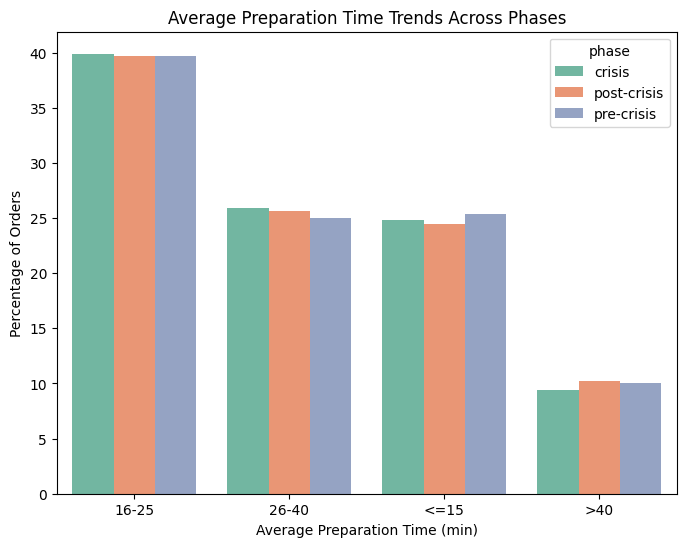

In [ ]:
# Reset index to make 'phase' a column
prep_pivot_reset = prep_pivot.reset_index()

# Melt into long format
prep_long = prep_pivot_reset.melt(id_vars='phase', var_name='avg_prep_time_min', value_name='percent')

# Now plot
plt.figure(figsize=(8,6))
sns.barplot(data=prep_long, x='avg_prep_time_min', y='percent', hue='phase', palette='Set2')
plt.title('Average Preparation Time Trends Across Phases')
plt.xlabel('Average Preparation Time (min)')
plt.ylabel('Percentage of Orders')
plt.show()


**Insight**<br>
Across all three phases, customer preference for preparation time remained consistent — around 40% of orders in the 16–25 min range, and roughly 10% in >40 min.
The crisis primarily caused an overall volume drop, not a behavioral shift in prep-time preference.

restaurant_kpis<br>
Purpose: Overall restaurant-level performance (total across all phases & cities).

In [ ]:
restaurant_kpis = orders_and_restaurant.groupby('restaurant_name').agg(
    total_orders=('order_id', 'count'),
    total_revenue=('total_amount', 'sum'),
    unique_customers=('customer_id', 'nunique')
).reset_index()

restaurant_kpis

restaurant_name  total_orders  total_revenue  \
0           Annapurna Biryani Adda            32        9841.11   
1     Annapurna Biryani Bhojanalay            46       15590.49   
2           Annapurna Biryani Cafe            27       10390.71   
3        Annapurna Biryani Central            12        4325.81   
4         Annapurna Biryani Clouds            30       12010.25   
...                            ...           ...            ...   
4774              Urban Wraps Nest            50       17938.98   
4775            Urban Wraps Palace            26        9533.78   
4776             Urban Wraps Point            41       13661.39   
4777              Urban Wraps Stop            28        9383.94   
4778              Urban Wraps Zone            32       10370.11   

      unique_customers  
0                   32  
1                   46  
2                   27  
3                   12  
4                   30  
...                ...  
4774                50  
4775                26  
4776                41  
4777                28  
4778                32  

[4779 rows x 4 columns]

In [ ]:
restaurant_revenue = restaurant_kpis.sort_values(by='total_revenue', ascending=False).reset_index(drop=True)
restaurant_revenue

restaurant_name  total_orders  total_revenue  \
0         Punjabi Express Central           103       36072.71   
1     Hot & Crispy Biryani Heaven            93       32693.29   
2          Thindi Mane Pizza Cafe            97       32488.38   
3     Hot & Crispy Kitchen Clouds            88       31747.06   
4          Classic Tandoor Heaven            95       31589.00   
...                           ...           ...            ...   
4774         Bombay Darshini Adda             2         480.74   
4775      Annapurna Kitchen Mahal             3         474.64   
4776          Bombay Delights Hub             1         449.76   
4777      Kolkata Paratha Central             1         290.92   
4778             Sri Thali Clouds             1         248.14   

      unique_customers  
0                  103  
1                   93  
2                   97  
3                   88  
4                   95  
...                ...  
4774                 2  
4775                 3  
4776                 1  
4777                 1  
4778                 1  

[4779 rows x 4 columns]

In [ ]:
restaurant_revenue.head(10)

restaurant_name  total_orders  total_revenue  unique_customers
0       Punjabi Express Central           103       36072.71               103
1   Hot & Crispy Biryani Heaven            93       32693.29                93
2        Thindi Mane Pizza Cafe            97       32488.38                97
3   Hot & Crispy Kitchen Clouds            88       31747.06                88
4        Classic Tandoor Heaven            95       31589.00                95
5         Annapurna Mess Corner            85       29238.38                85
6          Tandoori Cafe Corner            79       28832.38                79
7              Spicy Curry Zone            75       28730.79                75
8      Thindi Mane Grill Darbar            91       28142.23                91
9  Hot & Crispy Darshini Clouds            83       27990.31                83

In [ ]:
restaurant_revenue.tail(10)

restaurant_name  total_orders  total_revenue  unique_customers
4769     Namma Biryani Clouds             2         665.28                 2
4770    Taste of Paratha Adda             3         650.00                 3
4771   Punjabi Delights Mahal             2         593.37                 2
4772    Taste of Thali Heaven             2         559.04                 2
4773        Kolkata Cafe Cafe             2         536.36                 2
4774     Bombay Darshini Adda             2         480.74                 2
4775  Annapurna Kitchen Mahal             3         474.64                 3
4776      Bombay Delights Hub             1         449.76                 1
4777  Kolkata Paratha Central             1         290.92                 1
4778         Sri Thali Clouds             1         248.14                 1

/tmp/ipython-input-2246224592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=restaurant_revenue.head(10), x='total_revenue', y='restaurant_name', palette='viridis')


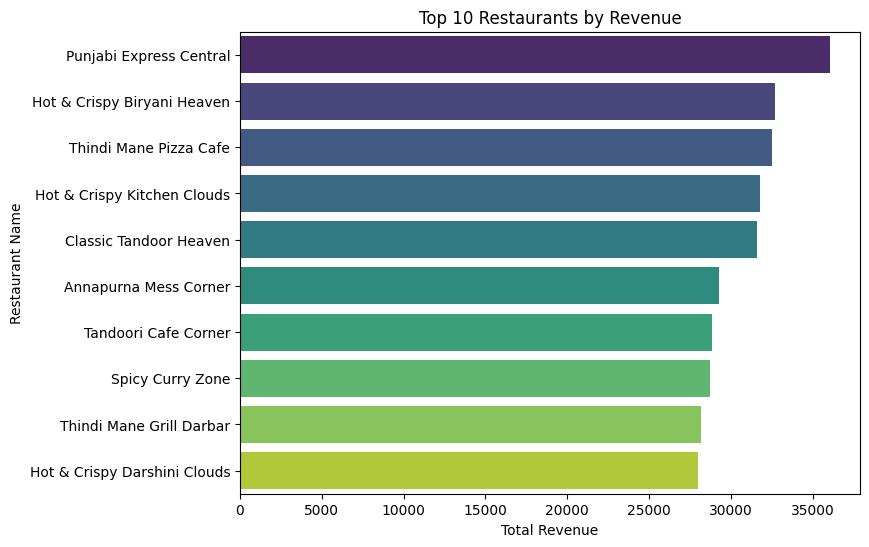

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=restaurant_revenue.head(10), x='total_revenue', y='restaurant_name', palette='viridis')
plt.title('Top 10 Restaurants by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Restaurant Name')
plt.show()

/tmp/ipython-input-3709543813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=restaurant_revenue.tail(10), x='total_revenue', y='restaurant_name', palette='viridis')


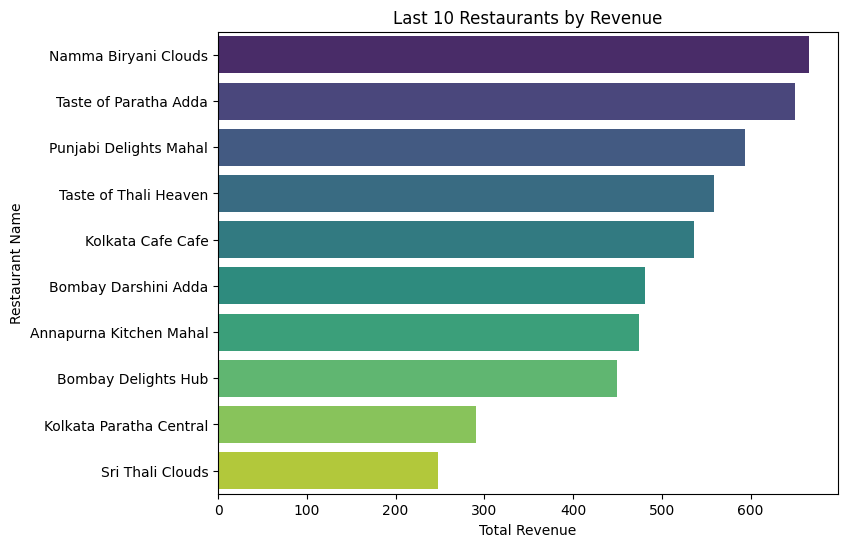

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=restaurant_revenue.tail(10), x='total_revenue', y='restaurant_name', palette='viridis')
plt.title('Last 10 Restaurants by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Restaurant Name')
plt.show()

In [ ]:
# Repeat rate per restaurant
repeat_rate = orders_and_restaurant.groupby(['restaurant_name', 'customer_id']).size().reset_index(name='orders_per_customer')
repeat_rate

restaurant_name customer_id  orders_per_customer
0       Annapurna Biryani Adda  CUST003342                    1
1       Annapurna Biryani Adda  CUST011929                    1
2       Annapurna Biryani Adda  CUST017291                    1
3       Annapurna Biryani Adda  CUST019197                    1
4       Annapurna Biryani Adda  CUST028752                    1
...                        ...         ...                  ...
141021        Urban Wraps Zone  CUST181729                    1
141022        Urban Wraps Zone  CUST189966                    1
141023        Urban Wraps Zone  CUST192879                    1
141024        Urban Wraps Zone  CUST193194                    1
141025        Urban Wraps Zone  CUST193296                    1

[141026 rows x 3 columns]

In [ ]:
repeat_rate_sort = repeat_rate.sort_values(by='orders_per_customer', ascending=False).reset_index(drop=True)
repeat_rate_sort

restaurant_name customer_id  orders_per_customer
0            Delhi Tandoor Cafe  CUST092442                    2
1            Grand Kitchen Cafe  CUST075258                    2
2              Sri Paratha Zone  CUST105875                    2
3       Taste of Tandoor Palace  CUST151657                    2
4        Kolkata Tandoor Darbar  CUST077901                    2
...                         ...         ...                  ...
141021      Grand Grill Central  CUST178440                    1
141022      Grand Grill Central  CUST180244                    1
141023      Grand Grill Central  CUST184350                    1
141024       Grand Grill Clouds  CUST005504                    1
141025      Grand Grill Central  CUST117110                    1

[141026 rows x 3 columns]

In [ ]:
# Count total orders per customer
customer_orders_count = orders_and_restaurant.groupby('customer_id').size().reset_index(name='total_orders')
customer_orders_count

customer_id  total_orders
0       CUST000007             1
1       CUST000008             1
2       CUST000009             3
3       CUST000010             3
4       CUST000011             1
...            ...           ...
100018  CUST199995             1
100019  CUST199996             1
100020  CUST199997             1
100021  CUST199999             1
100022  CUST200000             2

[100023 rows x 2 columns]

In [ ]:
# Calculate overall repeat customers %
overall_repeat_pct = (customer_orders_count['total_orders'] > 1).mean() * 100
print(f"Overall repeat rate across all restaurants: {overall_repeat_pct:.2f}%")

Overall repeat rate across all restaurants: 32.37%


In [ ]:
restaurant_orders = orders_and_restaurant.groupby('restaurant_name')['order_id'].count().reset_index(name='total_orders')
restaurant_orders = restaurant_orders.sort_values(by='total_orders', ascending=False)
restaurant_orders

restaurant_name  total_orders
2842      Punjabi Express Central           103
4448       Thindi Mane Pizza Cafe            97
713        Classic Tandoor Heaven            95
1759  Hot & Crispy Biryani Heaven            93
4374     Thindi Mane Grill Darbar            91
...                           ...           ...
4252        Taste of Thali Heaven             2
2511         Namma Biryani Clouds             2
3744             Sri Thali Clouds             1
323           Bombay Delights Hub             1
2164      Kolkata Paratha Central             1

[4779 rows x 2 columns]

In [ ]:
restaurant_orders.head(10)

restaurant_name  total_orders
2842       Punjabi Express Central           103
4448        Thindi Mane Pizza Cafe            97
713         Classic Tandoor Heaven            95
1759   Hot & Crispy Biryani Heaven            93
4374      Thindi Mane Grill Darbar            91
1879   Hot & Crispy Kitchen Clouds            88
146          Annapurna Mess Corner            85
2322       Madras Delights Central            83
1800  Hot & Crispy Darshini Clouds            83
3385               Spicy House Hub            82

/tmp/ipython-input-3405358626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=restaurant_orders.head(10), x='total_orders', y='restaurant_name', palette='viridis')


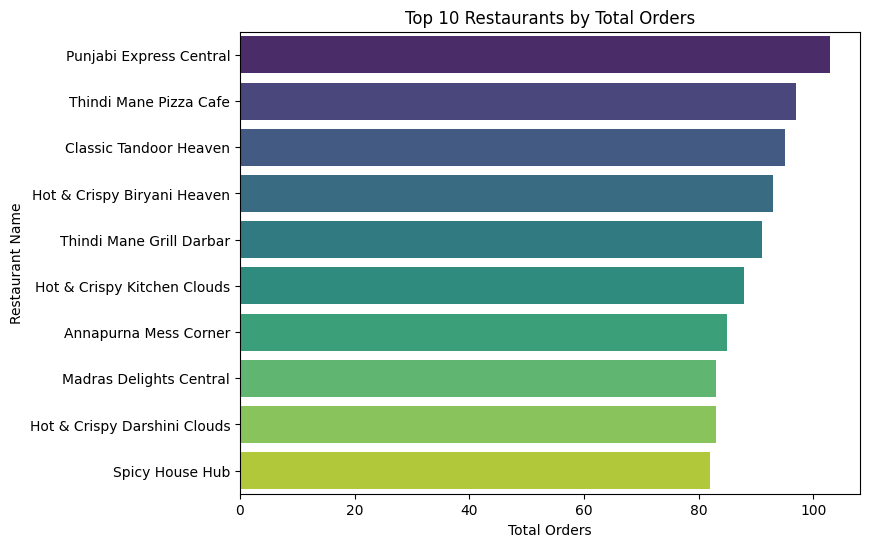

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=restaurant_orders.head(10), x='total_orders', y='restaurant_name', palette='viridis')
plt.title('Top 10 Restaurants by Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Restaurant Name')
plt.show()

restaurant_city_kpis<br>
Purpose: city-specific performance of each restaurant.

In [ ]:
restaurant_city_kpis = orders_and_restaurant.groupby(['city', 'restaurant_name']).agg(
    total_orders=('order_id', 'count'),
    total_revenue=('total_amount', 'sum'),
    unique_customers=('customer_id', 'nunique')
).reset_index()
restaurant_city_kpis

city            restaurant_name  total_orders  total_revenue  \
0      Ahmedabad     Annapurna Biryani Adda             8        2639.46   
1      Ahmedabad  Annapurna Biryani Delight            10        3466.75   
2      Ahmedabad   Annapurna Biryani Heaven             8        2375.15   
3      Ahmedabad     Annapurna Biryani Stop            13        4086.44   
4      Ahmedabad  Annapurna Cafe Bhojanalay             7        2324.68   
...          ...                        ...           ...            ...   
15022       Pune        Urban Wraps Delight             8        3074.42   
15023       Pune         Urban Wraps Heaven             3         700.90   
15024       Pune          Urban Wraps Mahal            11        4518.17   
15025       Pune           Urban Wraps Nest             5        1740.35   
15026       Pune           Urban Wraps Zone            10        3403.21   

       unique_customers  
0                     8  
1                    10  
2                     8  
3                    13  
4                     7  
...                 ...  
15022                 8  
15023                 3  
15024                11  
15025                 5  
15026                10  

[15027 rows x 5 columns]

In [ ]:
restaurant_city_kpis['revenue_rank'] = restaurant_city_kpis.groupby('city')['total_revenue'] \
                                                 .rank(method='dense', ascending=False).astype(int)
restaurant_city_kpis

city            restaurant_name  total_orders  total_revenue  \
0      Ahmedabad     Annapurna Biryani Adda             8        2639.46   
1      Ahmedabad  Annapurna Biryani Delight            10        3466.75   
2      Ahmedabad   Annapurna Biryani Heaven             8        2375.15   
3      Ahmedabad     Annapurna Biryani Stop            13        4086.44   
4      Ahmedabad  Annapurna Cafe Bhojanalay             7        2324.68   
...          ...                        ...           ...            ...   
15022       Pune        Urban Wraps Delight             8        3074.42   
15023       Pune         Urban Wraps Heaven             3         700.90   
15024       Pune          Urban Wraps Mahal            11        4518.17   
15025       Pune           Urban Wraps Nest             5        1740.35   
15026       Pune           Urban Wraps Zone            10        3403.21   

       unique_customers  revenue_rank  
0                     8           673  
1                    10           380  
2                     8           803  
3                    13           231  
4                     7           832  
...                 ...           ...  
15022                 8           491  
15023                 3          1329  
15024                11           159  
15025                 5          1073  
15026                10           382  

[15027 rows x 6 columns]

In [ ]:
restaurant_city_kpis = restaurant_city_kpis.sort_values(by=['city', 'revenue_rank']).reset_index(drop=True)
restaurant_city_kpis.tail(10)

city            restaurant_name  total_orders  total_revenue  \
15017  Pune       Tandoori Mess Heaven             1         459.95   
15018  Pune        Namma Curry Central             1         420.09   
15019  Pune         Delhi Biryani Nest             1         397.27   
15020  Pune            Royal Cafe Cafe             2         356.08   
15021  Pune           Bombay Cafe Cafe             1         330.34   
15022  Pune  Thindi Mane House Central             1         312.29   
15023  Pune      Tandoori Mess Delight             1         264.38   
15024  Pune         Madras Curry Mahal             1         256.11   
15025  Pune     Delhi House Bhojanalay             1         236.49   
15026  Pune    Hot & Crispy Curry Stop             1         179.85   

       unique_customers  revenue_rank  
15017                 1          1344  
15018                 1          1345  
15019                 1          1346  
15020                 2          1347  
15021                 1          1348  
15022                 1          1349  
15023                 1          1350  
15024                 1          1351  
15025                 1          1352  
15026                 1          1353

In [ ]:
restaurant_city_kpis[restaurant_city_kpis['city'] == 'Kolkata']

city                restaurant_name  total_orders  total_revenue  \
9972   Kolkata        Punjabi Express Central            44       16286.44   
9973   Kolkata           Classic Thali Darbar            31       10870.96   
9974   Kolkata             Classic Grill Adda            32       10698.44   
9975   Kolkata            Madras Kitchen Adda            29       10317.42   
9976   Kolkata  Hot & Crispy Pizza Bhojanalay            26        9944.19   
...        ...                            ...           ...            ...   
11460  Kolkata             Taste of Mess Nest             3         347.93   
11461  Kolkata           Punjabi Paratha Zone             1         319.98   
11462  Kolkata          Taste of Tandoor Zone             1         295.32   
11463  Kolkata           Fresh Darshini Mahal             1         196.06   
11464  Kolkata               Classic Cafe Hub             2         193.00   

       unique_customers  revenue_rank  
9972                 44             1  
9973                 31             2  
9974                 32             3  
9975                 29             4  
9976                 26             5  
...                 ...           ...  
11460                 3          1488  
11461                 1          1489  
11462                 1          1490  
11463                 1          1491  
11464                 2          1492  

[1493 rows x 6 columns]

In [ ]:
city_restaurant_count = restaurant_city_kpis.groupby('city')['restaurant_name'].count().reset_index(name='restaurant_count')
city_restaurant_count = city_restaurant_count.sort_values(by='restaurant_count', ascending=False)
city_restaurant_count

city  restaurant_count
1  Bengaluru              3098
6     Mumbai              2206
3      Delhi              2202
4  Hyderabad              1647
2    Chennai              1623
5    Kolkata              1493
0  Ahmedabad              1402
7       Pune              1356

/tmp/ipython-input-3525654967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_restaurant_count, x='city', y='restaurant_count', palette='viridis')


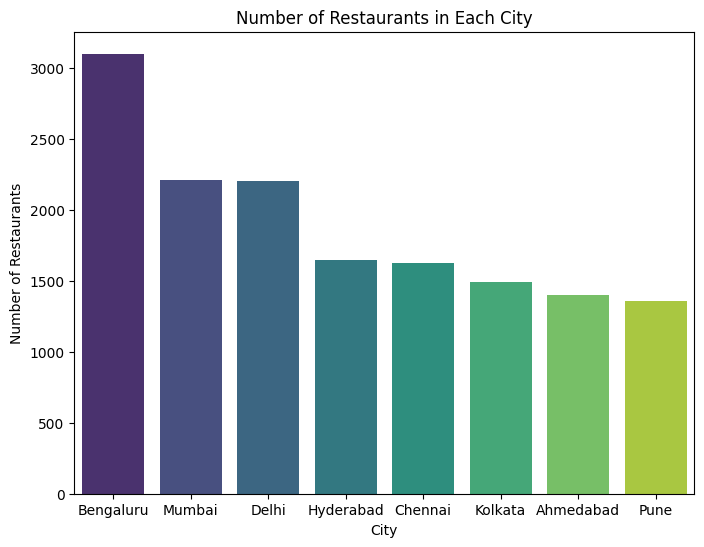

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=city_restaurant_count, x='city', y='restaurant_count', palette='viridis')
plt.title('Number of Restaurants in Each City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

In [ ]:
top10_by_city = restaurant_city_kpis[restaurant_city_kpis['revenue_rank'] <= 10]
top10_by_city

city                  restaurant_name  total_orders  \
0      Ahmedabad             Bombay Wraps Delight            33   
1      Ahmedabad                Fresh Sweets Adda            28   
2      Ahmedabad                Grand Mess Corner            26   
3      Ahmedabad                 Madras Wraps Hub            28   
4      Ahmedabad            Namma Darshini Clouds            22   
...          ...                              ...           ...   
13676       Pune           Hot & Crispy Cafe Cafe            27   
13677       Pune                    Sri Mess Zone            27   
13678       Pune  Hot & Crispy Kitchen Bhojanalay            24   
13679       Pune           Sri Kitchen Bhojanalay            25   
13680       Pune          Taste of Biryani Corner            20   

       total_revenue  unique_customers  revenue_rank  
0           12813.34                33             1  
1           10941.76                28             2  
2            9403.42                26             3  
3            9305.78                28             4  
4            8949.97                22             5  
...              ...               ...           ...  
13676        8491.58                27             6  
13677        8307.81                27             7  
13678        8271.43                24             8  
13679        7971.07                25             9  
13680        7969.60                20            10  

[80 rows x 6 columns]

/tmp/ipython-input-4278538414.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_top10, x='total_revenue', y='restaurant_name', palette='viridis')


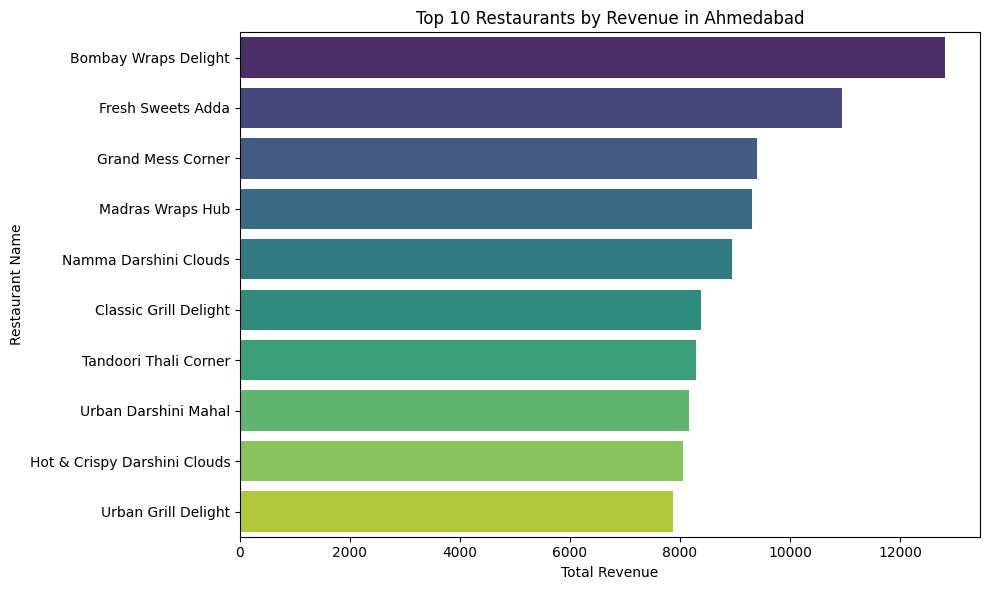

/tmp/ipython-input-4278538414.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_top10, x='total_revenue', y='restaurant_name', palette='viridis')


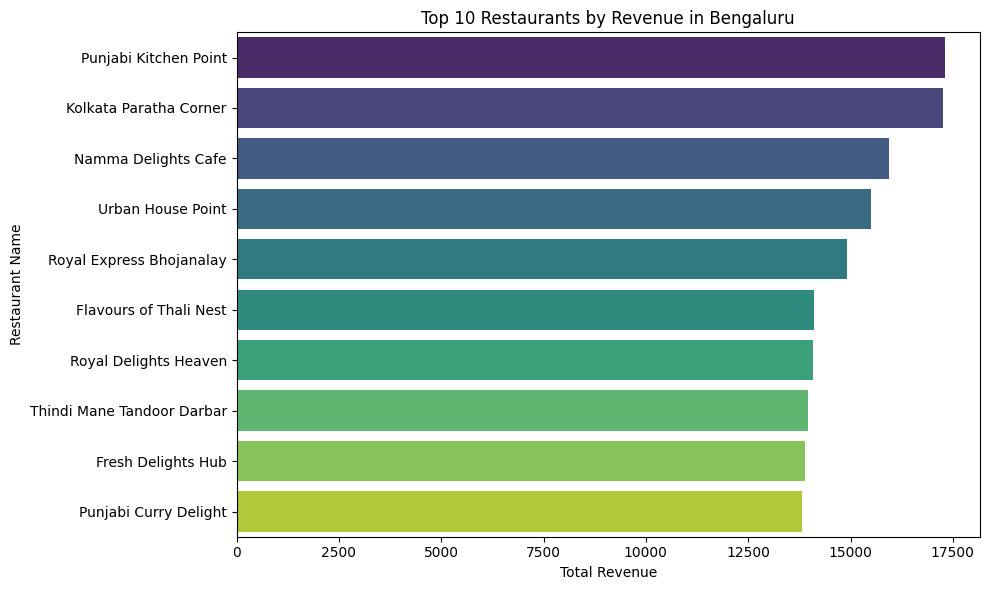

/tmp/ipython-input-4278538414.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_top10, x='total_revenue', y='restaurant_name', palette='viridis')


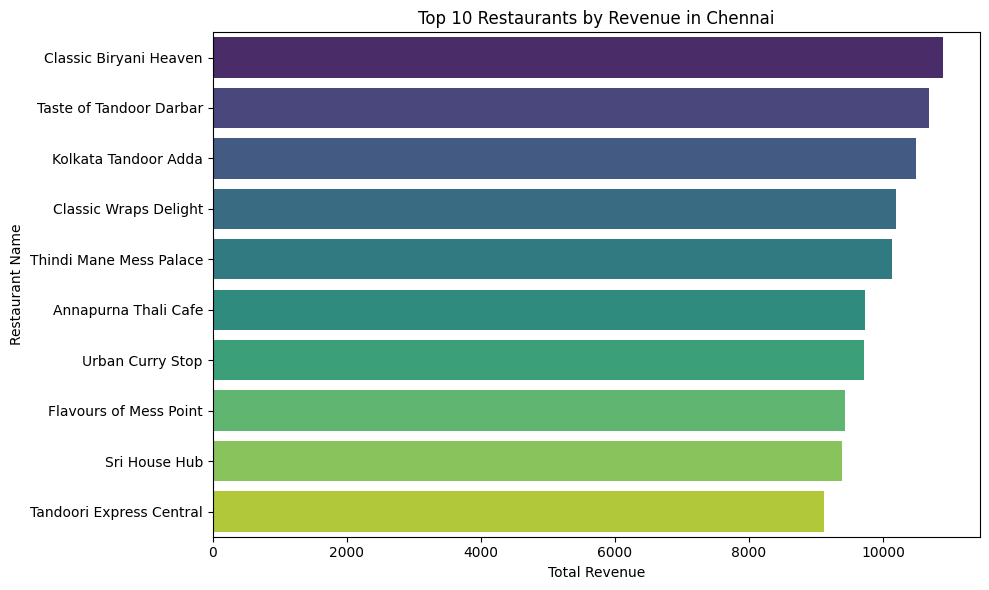

/tmp/ipython-input-4278538414.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_top10, x='total_revenue', y='restaurant_name', palette='viridis')


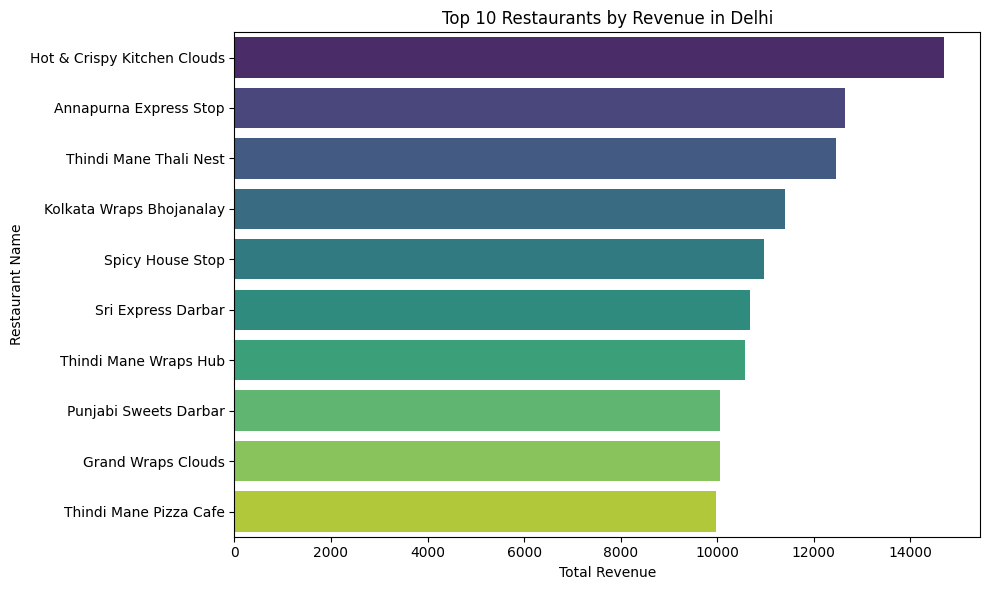

/tmp/ipython-input-4278538414.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_top10, x='total_revenue', y='restaurant_name', palette='viridis')


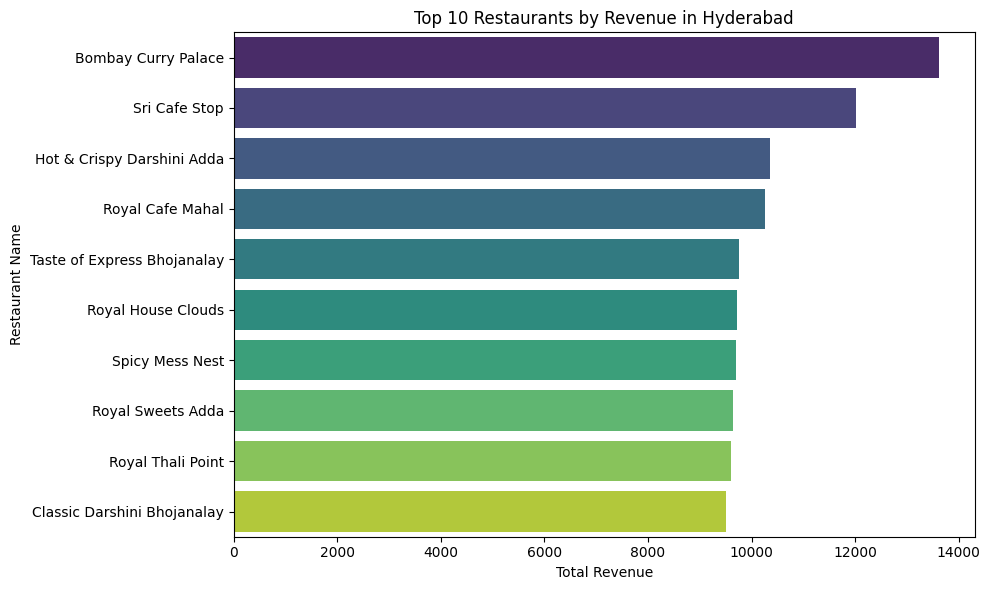

/tmp/ipython-input-4278538414.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_top10, x='total_revenue', y='restaurant_name', palette='viridis')


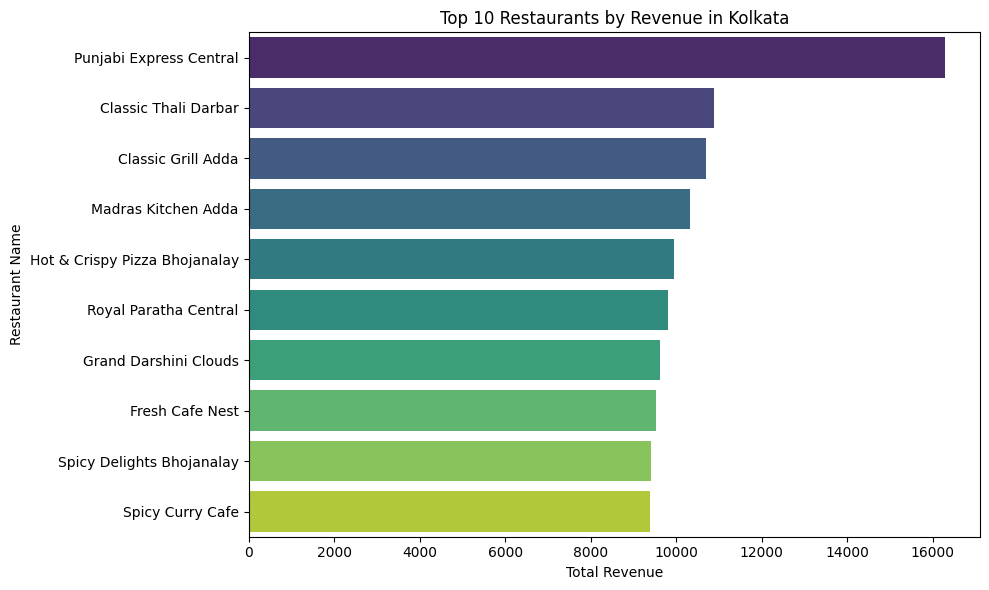

/tmp/ipython-input-4278538414.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_top10, x='total_revenue', y='restaurant_name', palette='viridis')


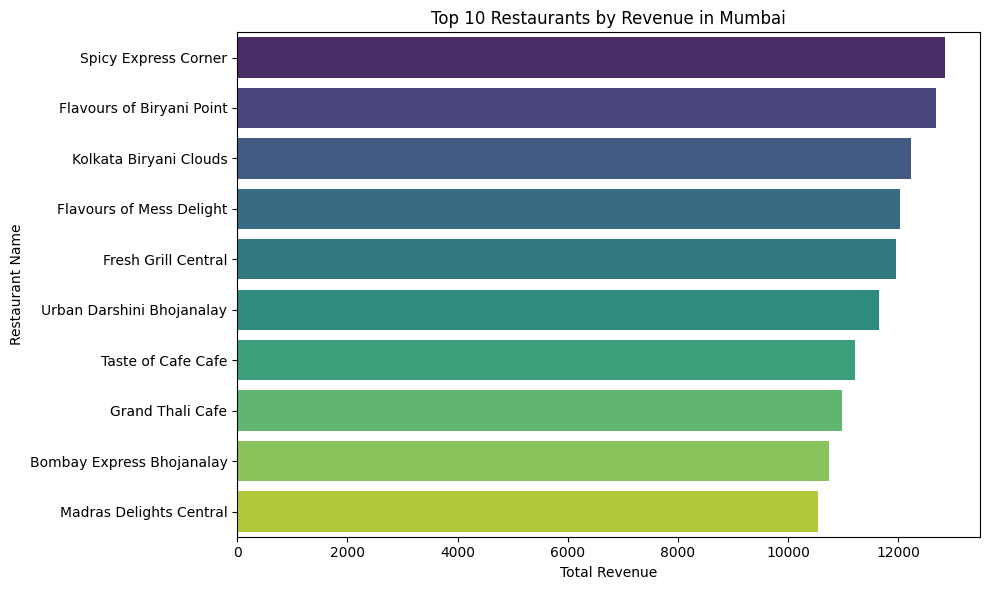

/tmp/ipython-input-4278538414.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_top10, x='total_revenue', y='restaurant_name', palette='viridis')


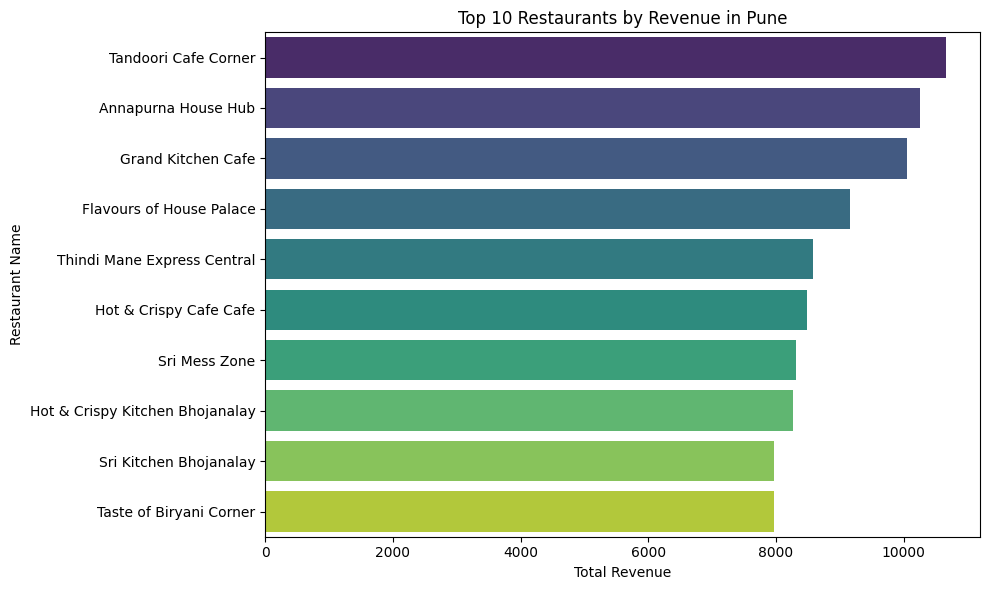

In [ ]:
# Get the list of unique cities
cities = top10_by_city['city'].unique()

# Loop through each city
for city_name in cities:
    # Filter the data for that city
    city_top10 = top10_by_city[top10_by_city['city'] == city_name]

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=city_top10, x='total_revenue', y='restaurant_name', palette='viridis')

    # Add labels and title
    plt.title(f'Top 10 Restaurants by Revenue in {city_name}')
    plt.xlabel('Total Revenue')
    plt.ylabel('Restaurant Name')

    # Clean layout
    plt.tight_layout()

    # Show the plot
    plt.show()


In [ ]:
restaurant_phase_kpis = orders_and_restaurant.groupby(['restaurant_name','phase']).agg(
    total_orders=('order_id', 'count'),
    total_revenue=('total_amount', 'sum'),
).reset_index()

restaurant_phase_kpis

restaurant_name        phase  total_orders  total_revenue
0            Annapurna Biryani Adda       crisis             2         492.13
1            Annapurna Biryani Adda  post-crisis             1         244.16
2            Annapurna Biryani Adda   pre-crisis            29        9104.82
3      Annapurna Biryani Bhojanalay       crisis             2         701.05
4      Annapurna Biryani Bhojanalay  post-crisis            13        3929.02
...                             ...          ...           ...            ...
13006              Urban Wraps Stop  post-crisis             4        1625.50
13007              Urban Wraps Stop   pre-crisis            24        7758.44
13008              Urban Wraps Zone       crisis             1         360.78
13009              Urban Wraps Zone  post-crisis             4        1130.49
13010              Urban Wraps Zone   pre-crisis            27        8878.84

[13011 rows x 4 columns]

In [ ]:
restaurant_phase_kpis_pivot = restaurant_phase_kpis.pivot_table(index='restaurant_name', columns='phase', values='total_orders')
restaurant_phase_kpis_pivot

phase                         crisis  post-crisis  pre-crisis
restaurant_name                                              
Annapurna Biryani Adda           2.0          1.0        29.0
Annapurna Biryani Bhojanalay     2.0         13.0        31.0
Annapurna Biryani Cafe           3.0          7.0        17.0
Annapurna Biryani Central        1.0          2.0         9.0
Annapurna Biryani Clouds         5.0          4.0        21.0
...                              ...          ...         ...
Urban Wraps Nest                 6.0          4.0        40.0
Urban Wraps Palace               NaN          3.0        23.0
Urban Wraps Point                2.0          6.0        33.0
Urban Wraps Stop                 NaN          4.0        24.0
Urban Wraps Zone                 1.0          4.0        27.0

[4779 rows x 3 columns]

In [ ]:
restaurant_phase_kpis_pivot.columns.name = None  # removes the 'phase' label on top
restaurant_phase_kpis_pivot

crisis  post-crisis  pre-crisis
restaurant_name                                              
Annapurna Biryani Adda           2.0          1.0        29.0
Annapurna Biryani Bhojanalay     2.0         13.0        31.0
Annapurna Biryani Cafe           3.0          7.0        17.0
Annapurna Biryani Central        1.0          2.0         9.0
Annapurna Biryani Clouds         5.0          4.0        21.0
...                              ...          ...         ...
Urban Wraps Nest                 6.0          4.0        40.0
Urban Wraps Palace               NaN          3.0        23.0
Urban Wraps Point                2.0          6.0        33.0
Urban Wraps Stop                 NaN          4.0        24.0
Urban Wraps Zone                 1.0          4.0        27.0

[4779 rows x 3 columns]

In [ ]:
restaurant_phase_kpis_pivot = restaurant_phase_kpis_pivot.fillna(0)

In [ ]:
restaurant_phase_kpis_pivot['drop_pct'] = ((restaurant_phase_kpis_pivot['pre-crisis']-restaurant_phase_kpis_pivot['crisis'])/restaurant_phase_kpis_pivot['pre-crisis'])*100
restaurant_phase_kpis_pivot

crisis  post-crisis  pre-crisis    drop_pct
restaurant_name                                                          
Annapurna Biryani Adda           2.0          1.0        29.0   93.103448
Annapurna Biryani Bhojanalay     2.0         13.0        31.0   93.548387
Annapurna Biryani Cafe           3.0          7.0        17.0   82.352941
Annapurna Biryani Central        1.0          2.0         9.0   88.888889
Annapurna Biryani Clouds         5.0          4.0        21.0   76.190476
...                              ...          ...         ...         ...
Urban Wraps Nest                 6.0          4.0        40.0   85.000000
Urban Wraps Palace               0.0          3.0        23.0  100.000000
Urban Wraps Point                2.0          6.0        33.0   93.939394
Urban Wraps Stop                 0.0          4.0        24.0  100.000000
Urban Wraps Zone                 1.0          4.0        27.0   96.296296

[4779 rows x 4 columns]

In [ ]:
restaurant_phase_kpis_pivot['recovery_pct'] = ((restaurant_phase_kpis_pivot['post-crisis'] - restaurant_phase_kpis_pivot['crisis']) / restaurant_phase_kpis_pivot['crisis']) * 100
restaurant_phase_kpis_pivot

crisis  post-crisis  pre-crisis    drop_pct  \
restaurant_name                                                             
Annapurna Biryani Adda           2.0          1.0        29.0   93.103448   
Annapurna Biryani Bhojanalay     2.0         13.0        31.0   93.548387   
Annapurna Biryani Cafe           3.0          7.0        17.0   82.352941   
Annapurna Biryani Central        1.0          2.0         9.0   88.888889   
Annapurna Biryani Clouds         5.0          4.0        21.0   76.190476   
...                              ...          ...         ...         ...   
Urban Wraps Nest                 6.0          4.0        40.0   85.000000   
Urban Wraps Palace               0.0          3.0        23.0  100.000000   
Urban Wraps Point                2.0          6.0        33.0   93.939394   
Urban Wraps Stop                 0.0          4.0        24.0  100.000000   
Urban Wraps Zone                 1.0          4.0        27.0   96.296296   

                              recovery_pct  
restaurant_name                             
Annapurna Biryani Adda          -50.000000  
Annapurna Biryani Bhojanalay    550.000000  
Annapurna Biryani Cafe          133.333333  
Annapurna Biryani Central       100.000000  
Annapurna Biryani Clouds        -20.000000  
...                                    ...  
Urban Wraps Nest                -33.333333  
Urban Wraps Palace                     inf  
Urban Wraps Point               200.000000  
Urban Wraps Stop                       inf  
Urban Wraps Zone                300.000000  

[4779 rows x 5 columns]

In [ ]:
import numpy as np

# Replace infinite values with NaN (e.g., division by zero cases)
restaurant_phase_kpis_pivot.replace([np.inf, -np.inf], np.nan, inplace=True)
restaurant_phase_kpis_pivot

crisis  post-crisis  pre-crisis    drop_pct  \
restaurant_name                                                             
Annapurna Biryani Adda           2.0          1.0        29.0   93.103448   
Annapurna Biryani Bhojanalay     2.0         13.0        31.0   93.548387   
Annapurna Biryani Cafe           3.0          7.0        17.0   82.352941   
Annapurna Biryani Central        1.0          2.0         9.0   88.888889   
Annapurna Biryani Clouds         5.0          4.0        21.0   76.190476   
...                              ...          ...         ...         ...   
Urban Wraps Nest                 6.0          4.0        40.0   85.000000   
Urban Wraps Palace               0.0          3.0        23.0  100.000000   
Urban Wraps Point                2.0          6.0        33.0   93.939394   
Urban Wraps Stop                 0.0          4.0        24.0  100.000000   
Urban Wraps Zone                 1.0          4.0        27.0   96.296296   

                              recovery_pct  
restaurant_name                             
Annapurna Biryani Adda          -50.000000  
Annapurna Biryani Bhojanalay    550.000000  
Annapurna Biryani Cafe          133.333333  
Annapurna Biryani Central       100.000000  
Annapurna Biryani Clouds        -20.000000  
...                                    ...  
Urban Wraps Nest                -33.333333  
Urban Wraps Palace                     NaN  
Urban Wraps Point               200.000000  
Urban Wraps Stop                       NaN  
Urban Wraps Zone                300.000000  

[4779 rows x 5 columns]

In [ ]:
restaurant_phase_kpis_pivot['recovery_pct'].skew()
# skewed dataset that's why using mean

np.float64(1.7606134797039343)

In [ ]:
mean_recovery = restaurant_phase_kpis_pivot['recovery_pct'].mean(skipna=True)

In [ ]:
conditions = [
    restaurant_phase_kpis_pivot['crisis'] == 0,  # No crisis orders
    restaurant_phase_kpis_pivot['recovery_pct'] > mean_recovery,  # Strong growth
    (restaurant_phase_kpis_pivot['recovery_pct'] <= mean_recovery) & (restaurant_phase_kpis_pivot['recovery_pct'] >= 0),  # Moderate recovery
    restaurant_phase_kpis_pivot['recovery_pct'] < 0,  # Decline
]

choices = [
    'Reactivated / New',
    'Strong Recovery',
    'Moderate Recovery',
    'Declining / At Risk',
]

restaurant_phase_kpis_pivot['recovery_category'] = np.select(conditions, choices, default='Inactive')
restaurant_phase_kpis_pivot

crisis  post-crisis  pre-crisis    drop_pct  \
restaurant_name                                                             
Annapurna Biryani Adda           2.0          1.0        29.0   93.103448   
Annapurna Biryani Bhojanalay     2.0         13.0        31.0   93.548387   
Annapurna Biryani Cafe           3.0          7.0        17.0   82.352941   
Annapurna Biryani Central        1.0          2.0         9.0   88.888889   
Annapurna Biryani Clouds         5.0          4.0        21.0   76.190476   
...                              ...          ...         ...         ...   
Urban Wraps Nest                 6.0          4.0        40.0   85.000000   
Urban Wraps Palace               0.0          3.0        23.0  100.000000   
Urban Wraps Point                2.0          6.0        33.0   93.939394   
Urban Wraps Stop                 0.0          4.0        24.0  100.000000   
Urban Wraps Zone                 1.0          4.0        27.0   96.296296   

                              recovery_pct    recovery_category  
restaurant_name                                                  
Annapurna Biryani Adda          -50.000000  Declining / At Risk  
Annapurna Biryani Bhojanalay    550.000000      Strong Recovery  
Annapurna Biryani Cafe          133.333333    Moderate Recovery  
Annapurna Biryani Central       100.000000    Moderate Recovery  
Annapurna Biryani Clouds        -20.000000  Declining / At Risk  
...                                    ...                  ...  
Urban Wraps Nest                -33.333333  Declining / At Risk  
Urban Wraps Palace                     NaN    Reactivated / New  
Urban Wraps Point               200.000000    Moderate Recovery  
Urban Wraps Stop                       NaN    Reactivated / New  
Urban Wraps Zone                300.000000      Strong Recovery  

[4779 rows x 6 columns]

In [ ]:
restaurant_recovery_category = restaurant_phase_kpis_pivot['recovery_category'].value_counts(normalize=True) * 100
restaurant_recovery_category = restaurant_recovery_category.reset_index()
restaurant_recovery_category

recovery_category  proportion
0    Moderate Recovery   44.318895
1      Strong Recovery   25.047081
2    Reactivated / New   23.875288
3  Declining / At Risk    6.758736

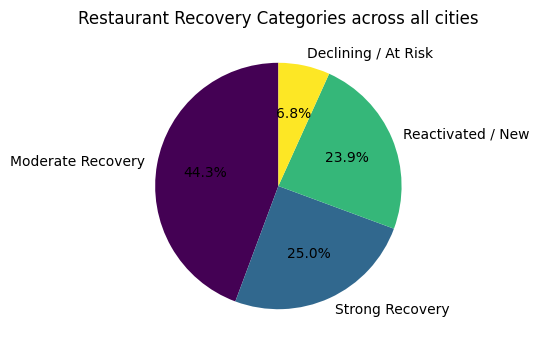

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(
    restaurant_recovery_category['proportion'],
    labels=restaurant_recovery_category['recovery_category'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.viridis(np.linspace(0, 1, len(restaurant_recovery_category)))
)
plt.title('Restaurant Recovery Categories across all cities', fontsize=12)
plt.show()

In [ ]:
restaurant_phase_city_kpis = orders_and_restaurant.groupby(['city','restaurant_name','phase']).agg(
    total_orders=('order_id', 'count'),
    total_revenue=('total_amount', 'sum'),
).reset_index()

restaurant_phase_city_kpis

city            restaurant_name        phase  total_orders  \
0      Ahmedabad     Annapurna Biryani Adda       crisis             1   
1      Ahmedabad     Annapurna Biryani Adda  post-crisis             1   
2      Ahmedabad     Annapurna Biryani Adda   pre-crisis             6   
3      Ahmedabad  Annapurna Biryani Delight       crisis             1   
4      Ahmedabad  Annapurna Biryani Delight  post-crisis             3   
...          ...                        ...          ...           ...   
32485       Pune          Urban Wraps Mahal   pre-crisis             8   
32486       Pune           Urban Wraps Nest       crisis             2   
32487       Pune           Urban Wraps Nest   pre-crisis             3   
32488       Pune           Urban Wraps Zone  post-crisis             1   
32489       Pune           Urban Wraps Zone   pre-crisis             9   

       total_revenue  
0             284.76  
1             244.16  
2            2110.54  
3             437.73  
4            1050.86  
...              ...  
32485        2842.25  
32486         803.85  
32487         936.50  
32488         272.84  
32489        3130.37  

[32490 rows x 5 columns]

In [ ]:
restaurant_phase_city_kpis_pivot = restaurant_phase_city_kpis.pivot_table(index=['city','restaurant_name'], columns='phase', values='total_revenue')
restaurant_phase_city_kpis_pivot

phase                                crisis  post-crisis  pre-crisis
city      restaurant_name                                           
Ahmedabad Annapurna Biryani Adda     284.76       244.16     2110.54
          Annapurna Biryani Delight  437.73      1050.86     1978.16
          Annapurna Biryani Heaven      NaN       462.34     1912.81
          Annapurna Biryani Stop     823.17       441.18     2822.09
          Annapurna Cafe Bhojanalay  275.75       431.67     1617.26
...                                     ...          ...         ...
Pune      Urban Wraps Delight           NaN      1166.23     1908.19
          Urban Wraps Heaven            NaN          NaN      700.90
          Urban Wraps Mahal          162.46      1513.46     2842.25
          Urban Wraps Nest           803.85          NaN      936.50
          Urban Wraps Zone              NaN       272.84     3130.37

[15027 rows x 3 columns]

In [ ]:
restaurant_phase_city_kpis_pivot.columns.name = None
restaurant_phase_city_kpis_pivot

crisis  post-crisis  pre-crisis
city      restaurant_name                                           
Ahmedabad Annapurna Biryani Adda     284.76       244.16     2110.54
          Annapurna Biryani Delight  437.73      1050.86     1978.16
          Annapurna Biryani Heaven      NaN       462.34     1912.81
          Annapurna Biryani Stop     823.17       441.18     2822.09
          Annapurna Cafe Bhojanalay  275.75       431.67     1617.26
...                                     ...          ...         ...
Pune      Urban Wraps Delight           NaN      1166.23     1908.19
          Urban Wraps Heaven            NaN          NaN      700.90
          Urban Wraps Mahal          162.46      1513.46     2842.25
          Urban Wraps Nest           803.85          NaN      936.50
          Urban Wraps Zone              NaN       272.84     3130.37

[15027 rows x 3 columns]

In [ ]:
restaurant_phase_city_kpis_pivot = restaurant_phase_city_kpis_pivot.fillna(0)

In [ ]:
restaurant_phase_city_kpis_pivot['drop_pct'] = ((restaurant_phase_city_kpis_pivot['pre-crisis']-restaurant_phase_city_kpis_pivot['crisis'])/restaurant_phase_city_kpis_pivot['pre-crisis'])*100
restaurant_phase_city_kpis_pivot

crisis  post-crisis  pre-crisis  \
city      restaurant_name                                              
Ahmedabad Annapurna Biryani Adda     284.76       244.16     2110.54   
          Annapurna Biryani Delight  437.73      1050.86     1978.16   
          Annapurna Biryani Heaven     0.00       462.34     1912.81   
          Annapurna Biryani Stop     823.17       441.18     2822.09   
          Annapurna Cafe Bhojanalay  275.75       431.67     1617.26   
...                                     ...          ...         ...   
Pune      Urban Wraps Delight          0.00      1166.23     1908.19   
          Urban Wraps Heaven           0.00         0.00      700.90   
          Urban Wraps Mahal          162.46      1513.46     2842.25   
          Urban Wraps Nest           803.85         0.00      936.50   
          Urban Wraps Zone             0.00       272.84     3130.37   

                                       drop_pct  
city      restaurant_name                        
Ahmedabad Annapurna Biryani Adda      86.507718  
          Annapurna Biryani Delight   77.871861  
          Annapurna Biryani Heaven   100.000000  
          Annapurna Biryani Stop      70.831192  
          Annapurna Cafe Bhojanalay   82.949557  
...                                         ...  
Pune      Urban Wraps Delight        100.000000  
          Urban Wraps Heaven         100.000000  
          Urban Wraps Mahal           94.284106  
          Urban Wraps Nest            14.164442  
          Urban Wraps Zone           100.000000  

[15027 rows x 4 columns]

In [ ]:
restaurant_phase_city_kpis_pivot['recovery_pct'] = (restaurant_phase_city_kpis_pivot['post-crisis'] - restaurant_phase_city_kpis_pivot['crisis'])/ restaurant_phase_city_kpis_pivot['crisis'] * 100
restaurant_phase_city_kpis_pivot

crisis  post-crisis  pre-crisis  \
city      restaurant_name                                              
Ahmedabad Annapurna Biryani Adda     284.76       244.16     2110.54   
          Annapurna Biryani Delight  437.73      1050.86     1978.16   
          Annapurna Biryani Heaven     0.00       462.34     1912.81   
          Annapurna Biryani Stop     823.17       441.18     2822.09   
          Annapurna Cafe Bhojanalay  275.75       431.67     1617.26   
...                                     ...          ...         ...   
Pune      Urban Wraps Delight          0.00      1166.23     1908.19   
          Urban Wraps Heaven           0.00         0.00      700.90   
          Urban Wraps Mahal          162.46      1513.46     2842.25   
          Urban Wraps Nest           803.85         0.00      936.50   
          Urban Wraps Zone             0.00       272.84     3130.37   

                                       drop_pct  recovery_pct  
city      restaurant_name                                      
Ahmedabad Annapurna Biryani Adda      86.507718    -14.257620  
          Annapurna Biryani Delight   77.871861    140.070363  
          Annapurna Biryani Heaven   100.000000           inf  
          Annapurna Biryani Stop      70.831192    -46.404752  
          Annapurna Cafe Bhojanalay   82.949557     56.543971  
...                                         ...           ...  
Pune      Urban Wraps Delight        100.000000           inf  
          Urban Wraps Heaven         100.000000           NaN  
          Urban Wraps Mahal           94.284106    831.589314  
          Urban Wraps Nest            14.164442   -100.000000  
          Urban Wraps Zone           100.000000           inf  

[15027 rows x 5 columns]

In [ ]:
import numpy as np

# Replace infinite values with NaN (e.g., division by zero cases)
restaurant_phase_city_kpis_pivot.replace([np.inf, -np.inf], np.nan, inplace=True)
restaurant_phase_city_kpis_pivot

crisis  post-crisis  pre-crisis  \
city      restaurant_name                                              
Ahmedabad Annapurna Biryani Adda     284.76       244.16     2110.54   
          Annapurna Biryani Delight  437.73      1050.86     1978.16   
          Annapurna Biryani Heaven     0.00       462.34     1912.81   
          Annapurna Biryani Stop     823.17       441.18     2822.09   
          Annapurna Cafe Bhojanalay  275.75       431.67     1617.26   
...                                     ...          ...         ...   
Pune      Urban Wraps Delight          0.00      1166.23     1908.19   
          Urban Wraps Heaven           0.00         0.00      700.90   
          Urban Wraps Mahal          162.46      1513.46     2842.25   
          Urban Wraps Nest           803.85         0.00      936.50   
          Urban Wraps Zone             0.00       272.84     3130.37   

                                       drop_pct  recovery_pct  
city      restaurant_name                                      
Ahmedabad Annapurna Biryani Adda      86.507718    -14.257620  
          Annapurna Biryani Delight   77.871861    140.070363  
          Annapurna Biryani Heaven   100.000000           NaN  
          Annapurna Biryani Stop      70.831192    -46.404752  
          Annapurna Cafe Bhojanalay   82.949557     56.543971  
...                                         ...           ...  
Pune      Urban Wraps Delight        100.000000           NaN  
          Urban Wraps Heaven         100.000000           NaN  
          Urban Wraps Mahal           94.284106    831.589314  
          Urban Wraps Nest            14.164442   -100.000000  
          Urban Wraps Zone           100.000000           NaN  

[15027 rows x 5 columns]

In [ ]:
for city_name in restaurant_phase_city_kpis_pivot.index.get_level_values('city').unique():
    city_data = restaurant_phase_city_kpis_pivot.loc[city_name]
    print(f"City: {city_name}")
    print(city_data['recovery_pct'].describe())
    print("=====================================================================")

City: Ahmedabad
count    501.000000
mean      38.009497
std      149.285027
min     -100.000000
25%     -100.000000
50%        2.442041
75%       95.231251
max      726.027973
Name: recovery_pct, dtype: float64
City: Bengaluru
count    1348.000000
mean       88.005507
std       197.565323
min      -100.000000
25%       -42.753687
50%        36.936013
75%       164.821861
max      1524.436877
Name: recovery_pct, dtype: float64
City: Chennai
count     596.000000
mean       43.815930
std       165.378630
min      -100.000000
25%       -74.864784
50%         1.474072
75%        92.885436
max      1058.289736
Name: recovery_pct, dtype: float64
City: Delhi
count     925.000000
mean       60.063957
std       171.742512
min      -100.000000
25%       -60.849217
50%        19.765434
75%       127.906620
max      1161.881559
Name: recovery_pct, dtype: float64
City: Hyderabad
count     641.000000
mean       42.615964
std       163.742950
min      -100.000000
25%      -100.000000
50%         0.912

In [ ]:
restaurant_phase_city_kpis_pivot['city_mean'] = (
    restaurant_phase_city_kpis_pivot.groupby('city')['recovery_pct'].transform('mean')
)
restaurant_phase_city_kpis_pivot

crisis  post-crisis  pre-crisis  \
city      restaurant_name                                              
Ahmedabad Annapurna Biryani Adda     284.76       244.16     2110.54   
          Annapurna Biryani Delight  437.73      1050.86     1978.16   
          Annapurna Biryani Heaven     0.00       462.34     1912.81   
          Annapurna Biryani Stop     823.17       441.18     2822.09   
          Annapurna Cafe Bhojanalay  275.75       431.67     1617.26   
...                                     ...          ...         ...   
Pune      Urban Wraps Delight          0.00      1166.23     1908.19   
          Urban Wraps Heaven           0.00         0.00      700.90   
          Urban Wraps Mahal          162.46      1513.46     2842.25   
          Urban Wraps Nest           803.85         0.00      936.50   
          Urban Wraps Zone             0.00       272.84     3130.37   

                                       drop_pct  recovery_pct  city_mean  
city      restaurant_name                                                 
Ahmedabad Annapurna Biryani Adda      86.507718    -14.257620  38.009497  
          Annapurna Biryani Delight   77.871861    140.070363  38.009497  
          Annapurna Biryani Heaven   100.000000           NaN  38.009497  
          Annapurna Biryani Stop      70.831192    -46.404752  38.009497  
          Annapurna Cafe Bhojanalay   82.949557     56.543971  38.009497  
...                                         ...           ...        ...  
Pune      Urban Wraps Delight        100.000000           NaN  45.404916  
          Urban Wraps Heaven         100.000000           NaN  45.404916  
          Urban Wraps Mahal           94.284106    831.589314  45.404916  
          Urban Wraps Nest            14.164442   -100.000000  45.404916  
          Urban Wraps Zone           100.000000           NaN  45.404916  

[15027 rows x 6 columns]

Using relative city benchmarking to avoid comparing between different cities as each city has different no.of restauants

In [ ]:
conditions = [
    restaurant_phase_city_kpis_pivot['crisis'] == 0,  # No crisis orders
    restaurant_phase_city_kpis_pivot['recovery_pct'] > restaurant_phase_city_kpis_pivot['city_mean'],  # Stronger than average
    (restaurant_phase_city_kpis_pivot['recovery_pct'] <= restaurant_phase_city_kpis_pivot['city_mean']) & (restaurant_phase_city_kpis_pivot['recovery_pct'] >= 0),  # Moderate recovery
    restaurant_phase_city_kpis_pivot['recovery_pct'] < 0,  # Decline
]

choices = [
    'Reactivated / New',
    'Strong Recovery',
    'Moderate Recovery',
    'Declining / At Risk',
]

restaurant_phase_city_kpis_pivot['recovery_category'] = np.select(conditions, choices, default='Inactive')
restaurant_phase_city_kpis_pivot

crisis  post-crisis  pre-crisis  \
city      restaurant_name                                              
Ahmedabad Annapurna Biryani Adda     284.76       244.16     2110.54   
          Annapurna Biryani Delight  437.73      1050.86     1978.16   
          Annapurna Biryani Heaven     0.00       462.34     1912.81   
          Annapurna Biryani Stop     823.17       441.18     2822.09   
          Annapurna Cafe Bhojanalay  275.75       431.67     1617.26   
...                                     ...          ...         ...   
Pune      Urban Wraps Delight          0.00      1166.23     1908.19   
          Urban Wraps Heaven           0.00         0.00      700.90   
          Urban Wraps Mahal          162.46      1513.46     2842.25   
          Urban Wraps Nest           803.85         0.00      936.50   
          Urban Wraps Zone             0.00       272.84     3130.37   

                                       drop_pct  recovery_pct  city_mean  \
city      restaurant_name                                                  
Ahmedabad Annapurna Biryani Adda      86.507718    -14.257620  38.009497   
          Annapurna Biryani Delight   77.871861    140.070363  38.009497   
          Annapurna Biryani Heaven   100.000000           NaN  38.009497   
          Annapurna Biryani Stop      70.831192    -46.404752  38.009497   
          Annapurna Cafe Bhojanalay   82.949557     56.543971  38.009497   
...                                         ...           ...        ...   
Pune      Urban Wraps Delight        100.000000           NaN  45.404916   
          Urban Wraps Heaven         100.000000           NaN  45.404916   
          Urban Wraps Mahal           94.284106    831.589314  45.404916   
          Urban Wraps Nest            14.164442   -100.000000  45.404916   
          Urban Wraps Zone           100.000000           NaN  45.404916   

                                       recovery_category  
city      restaurant_name                                 
Ahmedabad Annapurna Biryani Adda     Declining / At Risk  
          Annapurna Biryani Delight      Strong Recovery  
          Annapurna Biryani Heaven     Reactivated / New  
          Annapurna Biryani Stop     Declining / At Risk  
          Annapurna Cafe Bhojanalay      Strong Recovery  
...                                                  ...  
Pune      Urban Wraps Delight          Reactivated / New  
          Urban Wraps Heaven           Reactivated / New  
          Urban Wraps Mahal              Strong Recovery  
          Urban Wraps Nest           Declining / At Risk  
          Urban Wraps Zone             Reactivated / New  

[15027 rows x 7 columns]

In [ ]:
restaurant_phase_city_kpis_pivot.to_csv('restaurant_phase_city_kpis_pivot.csv', index=True)

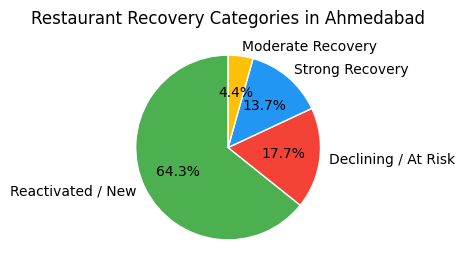

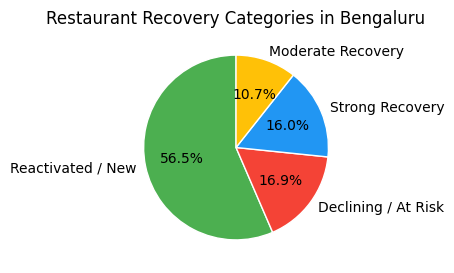

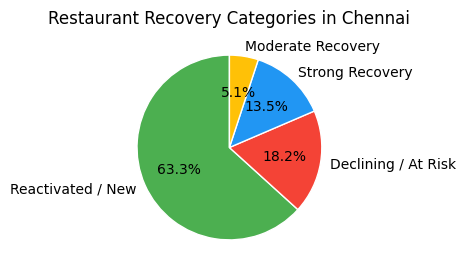

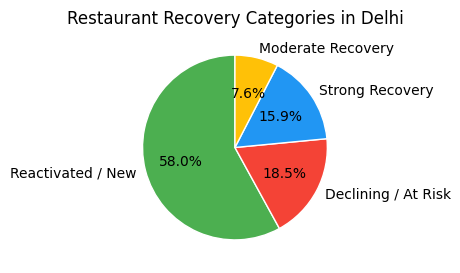

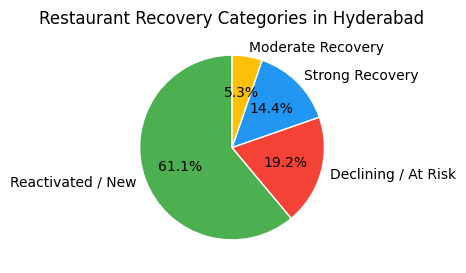

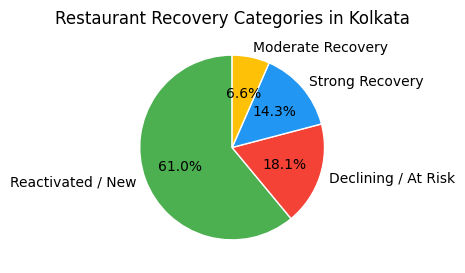

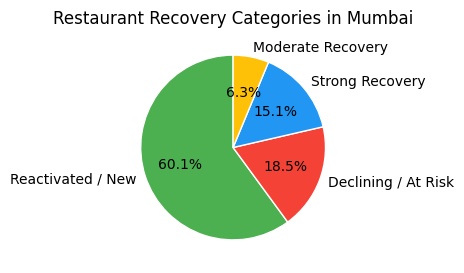

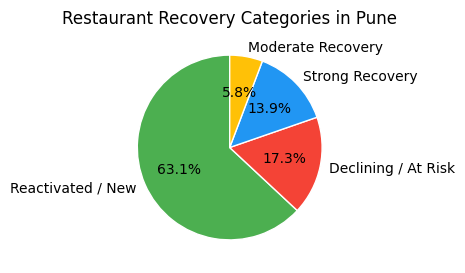

In [ ]:
# Define a fixed color mapping for recovery categories
color_map = {
    'Reactivated / New': '#4CAF50',      # green
    'Strong Recovery': '#2196F3',        # blue
    'Moderate Recovery': '#FFC107',      # amber
    'Declining / At Risk': '#F44336',    # red
}

# Loop through each city
for city_name in restaurant_phase_city_kpis_pivot.index.get_level_values('city').unique():
    # Filter data for the specific city
    city_data = restaurant_phase_city_kpis_pivot.loc[city_name]

    # Count recovery categories (normalize to get percentage)
    recovery_counts = city_data['recovery_category'].value_counts(normalize=True) * 100
    recovery_counts = recovery_counts.reset_index()
    recovery_counts.columns = ['recovery_category', 'proportion']

    # Get colors based on recovery category names
    colors = [color_map[cat] for cat in recovery_counts['recovery_category']]

    plt.figure(figsize=(4,3))
    plt.pie(
        recovery_counts['proportion'],
        labels=recovery_counts['recovery_category'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'white'}
    )

    plt.title(f'Restaurant Recovery Categories in {city_name}')

    plt.show()


In [ ]:
category_counts = restaurant_phase_city_kpis_pivot['recovery_category'].value_counts()
category_counts

recovery_category
Reactivated / New      9052
Declining / At Risk    2704
Strong Recovery        2230
Moderate Recovery      1041
Name: count, dtype: int64

In [ ]:
category_counts_percentage = category_counts / category_counts.sum() * 100
category_counts_percentage

recovery_category
Reactivated / New      60.238238
Declining / At Risk    17.994277
Strong Recovery        14.839955
Moderate Recovery       6.927530
Name: count, dtype: float64

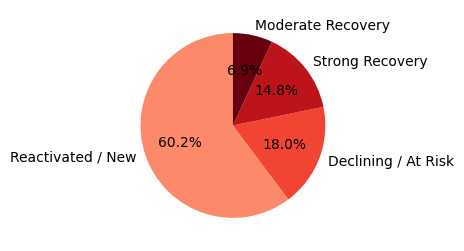

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
colors = plt.cm.Reds(np.linspace(0.4, 1, len(category_counts_percentage)))

plt.pie(
    category_counts_percentage,
    labels=category_counts_percentage.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.show()


Out of 15,027 restaurants, 14.83% showed Strong Recovery, 6.93% had Moderate Recovery, while 17.99% are Declining / At Risk.
60.24% are Reactivated/New — a sign of business re-engagement post-crisis.

In [ ]:
city_summary = (
    restaurant_phase_city_kpis_pivot
    .groupby(['city', 'recovery_category'])
    .size()
    .unstack(fill_value=0)
    .assign(total=lambda x: x.sum(axis=1))
    .sort_values('Strong Recovery', ascending=False)
)
city_summary

recovery_category  Declining / At Risk  Moderate Recovery  Reactivated / New  \
city                                                                           
Bengaluru                          523                330               1750   
Delhi                              408                167               1277   
Mumbai                             409                138               1325   
Hyderabad                          317                 87               1006   
Chennai                            295                 82               1027   
Kolkata                            270                 98                911   
Ahmedabad                          248                 61                901   
Pune                               234                 78                855   

recovery_category  Strong Recovery  total  
city                                       
Bengaluru                      495   3098  
Delhi                          350   2202  
Mumbai                         334   2206  
Hyderabad                      237   1647  
Chennai                        219   1623  
Kolkata                        214   1493  
Ahmedabad                      192   1402  
Pune                           189   1356

In [ ]:
city_avg_recovery = (
    restaurant_phase_city_kpis_pivot
    .groupby('city')['recovery_pct']
    .mean()
    .sort_values(ascending=False)
)
city_avg_recovery

city
Bengaluru    88.005507
Delhi        60.063957
Mumbai       55.414991
Kolkata      47.626268
Pune         45.404916
Chennai      43.815930
Hyderabad    42.615964
Ahmedabad    38.009497
Name: recovery_pct, dtype: float64

In [ ]:
at_risk_restaurants = (
    restaurant_phase_city_kpis_pivot
    .reset_index()
    .query("recovery_category == 'Declining / At Risk'")
    [['city', 'restaurant_name', 'recovery_pct']]
    .sort_values('recovery_pct')
)

at_risk_restaurants

city           restaurant_name  recovery_pct
5464     Chennai          Namma Wraps Cafe   -100.000000
12458     Mumbai      Kolkata Pizza Darbar   -100.000000
12468     Mumbai     Kolkata Sweets Clouds   -100.000000
12476     Mumbai    Kolkata Tandoor Clouds   -100.000000
12484     Mumbai  Kolkata Thali Bhojanalay   -100.000000
...          ...                       ...           ...
12482     Mumbai     Kolkata Tandoor Point     -0.208859
5442     Chennai          Namma Pizza Stop     -0.194772
4462   Bengaluru        Urban Sweets Point     -0.136415
12212     Mumbai        Grand Kitchen Cafe     -0.133074
9586   Hyderabad          Sri Kitchen Adda     -0.108578

[2704 rows x 3 columns]

In [ ]:
at_risk_restaurants = (
    restaurant_phase_city_kpis_pivot
    .reset_index()
    .query("recovery_category == 'Declining / At Risk'")
    [['city', 'restaurant_name', 'recovery_pct']]
    .sort_values(['city', 'recovery_pct'])
    .groupby('city')
    .head(10)
)

at_risk_restaurants


city          restaurant_name  recovery_pct
5      Ahmedabad    Annapurna Cafe Darbar        -100.0
31     Ahmedabad   Annapurna Grill Corner        -100.0
38     Ahmedabad     Annapurna House Cafe        -100.0
39     Ahmedabad   Annapurna House Clouds        -100.0
50     Ahmedabad      Annapurna Mess Zone        -100.0
...          ...                      ...           ...
13730       Pune   Annapurna Tandoor Zone        -100.0
13731       Pune  Annapurna Thali Central        -100.0
13741       Pune        Bombay Cafe Point        -100.0
13745       Pune     Bombay Delights Cafe        -100.0
13747       Pune      Bombay Express Cafe        -100.0

[80 rows x 3 columns]

In [ ]:
at_risk_restaurants.shape

(80, 3)

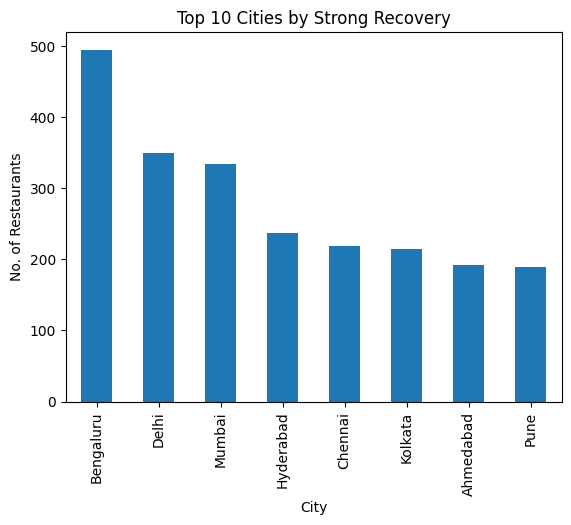

In [ ]:
import matplotlib.pyplot as plt
# Bar chart: city vs strong recovery count
city_summary['Strong Recovery'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Cities by Strong Recovery')
plt.xlabel('City')
plt.ylabel('No. of Restaurants')
plt.show()

### Delivery Performance: Assess delivery times, cancellations, and SLA compliance to pinpoint operational gaps.

In [ ]:
dim_delivery_partner.head()

delivery_partner_id partner_name       city vehicle_type employment_type  \
0             DP09615       Neha E  Bengaluru      Scooter       Full-time   
1             DP02021       Neha V  Bengaluru         Bike       Full-time   
2             DP05541      Vikas S      Delhi        Cycle       Part-time   
3             DP13859       Amit B      Delhi        Cycle       Part-time   
4             DP08091      Arjun R     Mumbai          Car       Full-time   

   avg_rating is_active  
0        3.77         Y  
1        3.90         Y  
2        3.33         Y  
3        4.07         N  
4        4.63         Y

In [ ]:
fact_delivery_performance.head()

order_id  actual_delivery_time_mins  expected_delivery_time_mins  \
0  ORD202501023439                         31                           31   
1  ORD202501012051                         46                           42   
2  ORD202501019281                         25                           31   
3  ORD202501000124                         29                           41   
4  ORD202501006518                         37                           41   

   distance_km  
0          6.4  
1          1.9  
2          6.2  
3          6.2  
4          2.4

In [ ]:
order_and_delivery_performance = fact_orders_clean.merge(fact_delivery_performance, on='order_id', how='left')
order_and_delivery_performance.head()

order_id customer_id restaurant_id delivery_partner_id  \
0  ORD202501023439  CUST181110     REST08622             DP05541   
1  ORD202501012051  CUST025572     REST02383             DP08091   
2  ORD202501019281  CUST179306     REST14069             DP02021   
3  ORD202501000124  CUST191820     REST19745             DP13859   
4  ORD202501006518  CUST033760     REST12962             DP09615   

      order_timestamp  subtotal_amount  discount_amount  delivery_fee  \
0 2025-01-01 12:00:00           471.62            35.44         30.56   
1 2025-01-01 12:00:00           255.68             0.00         27.45   
2 2025-01-01 12:00:00           428.38             0.00         26.23   
3 2025-01-01 12:00:00           260.81             0.00         32.75   
4 2025-01-01 12:00:00           280.33             0.00         25.57   

   total_amount is_cod is_cancelled       phase  actual_delivery_time_mins  \
0        466.74      N            N  pre-crisis                         31   
1        283.13      Y            N  pre-crisis                         46   
2        454.61      N            N  pre-crisis                         25   
3        293.56      N            N  pre-crisis                         29   
4        305.90      N            N  pre-crisis                         37   

   expected_delivery_time_mins  distance_km  
0                           31          6.4  
1                           42          1.9  
2                           31          6.2  
3                           41          6.2  
4                           41          2.4

In [ ]:
order_and_delivery_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141042 entries, 0 to 141041
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   order_id                     141042 non-null  object        
 1   customer_id                  141042 non-null  object        
 2   restaurant_id                141042 non-null  object        
 3   delivery_partner_id          141042 non-null  object        
 4   order_timestamp              141042 non-null  datetime64[ns]
 5   subtotal_amount              141042 non-null  float64       
 6   discount_amount              141042 non-null  float64       
 7   delivery_fee                 141042 non-null  float64       
 8   total_amount                 141042 non-null  float64       
 9   is_cod                       141042 non-null  object        
 10  is_cancelled                 141042 non-null  object        
 11  phase                     

In [ ]:
order_and_delivery_performance['delivery_delay'] = order_and_delivery_performance['actual_delivery_time_mins'] - order_and_delivery_performance['expected_delivery_time_mins']
order_and_delivery_performance.head()

order_id customer_id restaurant_id delivery_partner_id  \
0  ORD202501023439  CUST181110     REST08622             DP05541   
1  ORD202501012051  CUST025572     REST02383             DP08091   
2  ORD202501019281  CUST179306     REST14069             DP02021   
3  ORD202501000124  CUST191820     REST19745             DP13859   
4  ORD202501006518  CUST033760     REST12962             DP09615   

      order_timestamp  subtotal_amount  discount_amount  delivery_fee  \
0 2025-01-01 12:00:00           471.62            35.44         30.56   
1 2025-01-01 12:00:00           255.68             0.00         27.45   
2 2025-01-01 12:00:00           428.38             0.00         26.23   
3 2025-01-01 12:00:00           260.81             0.00         32.75   
4 2025-01-01 12:00:00           280.33             0.00         25.57   

   total_amount is_cod is_cancelled       phase  actual_delivery_time_mins  \
0        466.74      N            N  pre-crisis                         31   
1        283.13      Y            N  pre-crisis                         46   
2        454.61      N            N  pre-crisis                         25   
3        293.56      N            N  pre-crisis                         29   
4        305.90      N            N  pre-crisis                         37   

   expected_delivery_time_mins  distance_km  delivery_delay  
0                           31          6.4               0  
1                           42          1.9               4  
2                           31          6.2              -6  
3                           41          6.2             -12  
4                           41          2.4              -4

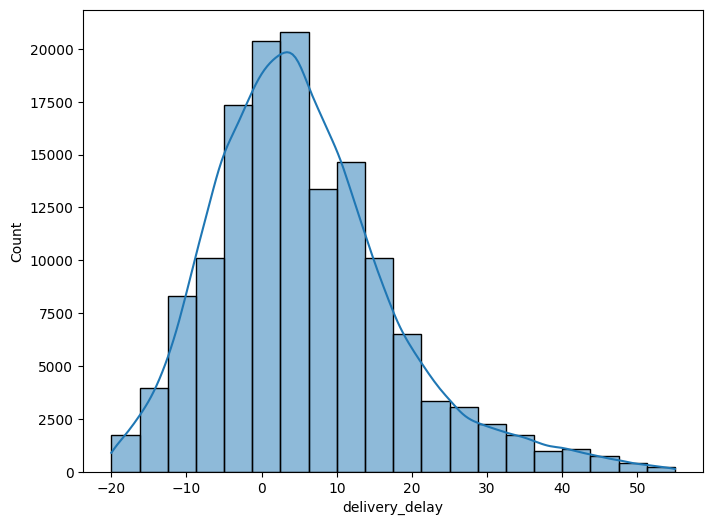

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=order_and_delivery_performance, x='delivery_delay', bins=20, kde=True)
plt.show()

delivery_delay < 0 means The order is delivered before the expected time.<br>
delivery_delay = 0 means The order is delivered at the expected time. <br>
delivery_delay > 0 means Late delivery

In [ ]:
# SLA compliance — 1 if within or before expected time, else 0
order_and_delivery_performance['sla_met'] = (
    order_and_delivery_performance['delivery_delay'] <= 0
).astype(int)

In [ ]:
order_and_delivery_performance.head()

order_id customer_id restaurant_id delivery_partner_id  \
0  ORD202501023439  CUST181110     REST08622             DP05541   
1  ORD202501012051  CUST025572     REST02383             DP08091   
2  ORD202501019281  CUST179306     REST14069             DP02021   
3  ORD202501000124  CUST191820     REST19745             DP13859   
4  ORD202501006518  CUST033760     REST12962             DP09615   

      order_timestamp  subtotal_amount  discount_amount  delivery_fee  \
0 2025-01-01 12:00:00           471.62            35.44         30.56   
1 2025-01-01 12:00:00           255.68             0.00         27.45   
2 2025-01-01 12:00:00           428.38             0.00         26.23   
3 2025-01-01 12:00:00           260.81             0.00         32.75   
4 2025-01-01 12:00:00           280.33             0.00         25.57   

   total_amount is_cod is_cancelled       phase  actual_delivery_time_mins  \
0        466.74      N            N  pre-crisis                         31   
1        283.13      Y            N  pre-crisis                         46   
2        454.61      N            N  pre-crisis                         25   
3        293.56      N            N  pre-crisis                         29   
4        305.90      N            N  pre-crisis                         37   

   expected_delivery_time_mins  distance_km  delivery_delay  sla_met  
0                           31          6.4               0        1  
1                           42          1.9               4        0  
2                           31          6.2              -6        1  
3                           41          6.2             -12        1  
4                           41          2.4              -4        1

SLA compliance — 1 if within or before expected time, else 0

In [ ]:
order_and_delivery_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141042 entries, 0 to 141041
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   order_id                     141042 non-null  object        
 1   customer_id                  141042 non-null  object        
 2   restaurant_id                141042 non-null  object        
 3   delivery_partner_id          141042 non-null  object        
 4   order_timestamp              141042 non-null  datetime64[ns]
 5   subtotal_amount              141042 non-null  float64       
 6   discount_amount              141042 non-null  float64       
 7   delivery_fee                 141042 non-null  float64       
 8   total_amount                 141042 non-null  float64       
 9   is_cod                       141042 non-null  object        
 10  is_cancelled                 141042 non-null  object        
 11  phase                     

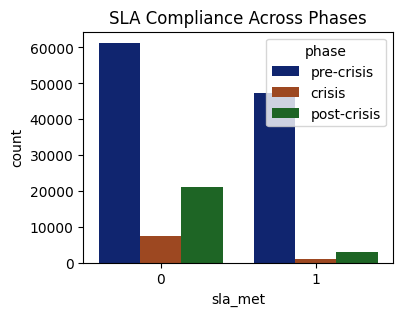

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data=order_and_delivery_performance, x='sla_met', hue='phase', palette='dark')
plt.title('SLA Compliance Across Phases')
plt.show()

In [ ]:
delivery_kpis = order_and_delivery_performance.groupby('phase').agg({
    'actual_delivery_time_mins': 'mean',
    'expected_delivery_time_mins': 'mean',
    'delivery_delay': 'mean',
    'sla_met': 'mean',
    'order_id': 'count'
}).reset_index()

delivery_kpis

phase  actual_delivery_time_mins  expected_delivery_time_mins  \
0       crisis                  60.351279                    42.509882   
1  post-crisis                  60.044102                    42.531225   
2   pre-crisis                  39.526067                    37.502060   

   delivery_delay   sla_met  order_id  
0       17.841397  0.117861      8247  
1       17.512877  0.124402     24035  
2        2.024007  0.435914    108760

In [ ]:
delivery_kpis['sla_met_%'] = (delivery_kpis['sla_met'] * 100).round(2)

In [ ]:
delivery_kpis.rename(columns={
    'actual_delivery_time_mins': 'avg_actual_time',
    'expected_delivery_time_mins': 'avg_expected_time',
    'delivery_delay': 'avg_delay_mins',
    'order_id': 'total_orders'
}, inplace=True)

delivery_kpis

phase  avg_actual_time  avg_expected_time  avg_delay_mins   sla_met  \
0       crisis        60.351279          42.509882       17.841397  0.117861   
1  post-crisis        60.044102          42.531225       17.512877  0.124402   
2   pre-crisis        39.526067          37.502060        2.024007  0.435914   

   total_orders  sla_met_%  
0          8247      11.79  
1         24035      12.44  
2        108760      43.59

* **43.6% (pre-crisis)** → 43.6% of orders were on time.
* **11.8% (crisis)** → Only 11.8% of orders were on time.[Very low may be due to heavy rain]
* **12.4% (post-crisis)** → Still very low, recovery not achieved.

The SLA is very poor in all phase. Have to improve a lot.<br>

1. **Crisis Phase:**

   * SLA compliance collapsed to **~12%**, meaning **almost 9 out of 10 orders were delayed**.
   * Average delay was **~18 minutes**, which customers will definitely notice.
   * Matches the real-world scenario: viral food-safety incident + monsoon outage → delivery network breakdown.

2. **Post-Crisis:**

   * SLA improved *slightly* (12.4%), but still way below pre-crisis (43.6%).
   * Indicates infrastructure upgrades haven’t restored reliability yet.

3. **Pre-Crisis:**

   * 43.6% SLA — not great, but acceptable baseline for a startup scaling fast.

SLA based on Distance

In [ ]:
order_and_delivery_performance['distance_km'].max()

8.0

Grouping Distance into ranges for better understanding.

In [ ]:
bins = [0,2,4,6,8]
labels = ['0-2 km', '2-4 km', '4-6 km', '6-8 km']

order_and_delivery_performance['distance_range'] = pd.cut(order_and_delivery_performance['distance_km']
                                                          , bins=bins,
                                                          labels=labels,
                                                          include_lowest = True)

order_and_delivery_performance.head()

order_id customer_id restaurant_id delivery_partner_id  \
0  ORD202501023439  CUST181110     REST08622             DP05541   
1  ORD202501012051  CUST025572     REST02383             DP08091   
2  ORD202501019281  CUST179306     REST14069             DP02021   
3  ORD202501000124  CUST191820     REST19745             DP13859   
4  ORD202501006518  CUST033760     REST12962             DP09615   

      order_timestamp  subtotal_amount  discount_amount  delivery_fee  \
0 2025-01-01 12:00:00           471.62            35.44         30.56   
1 2025-01-01 12:00:00           255.68             0.00         27.45   
2 2025-01-01 12:00:00           428.38             0.00         26.23   
3 2025-01-01 12:00:00           260.81             0.00         32.75   
4 2025-01-01 12:00:00           280.33             0.00         25.57   

   total_amount is_cod is_cancelled       phase  actual_delivery_time_mins  \
0        466.74      N            N  pre-crisis                         31   
1        283.13      Y            N  pre-crisis                         46   
2        454.61      N            N  pre-crisis                         25   
3        293.56      N            N  pre-crisis                         29   
4        305.90      N            N  pre-crisis                         37   

   expected_delivery_time_mins  distance_km  delivery_delay  sla_met  \
0                           31          6.4               0        1   
1                           42          1.9               4        0   
2                           31          6.2              -6        1   
3                           41          6.2             -12        1   
4                           41          2.4              -4        1   

  distance_range  
0         6-8 km  
1         0-2 km  
2         6-8 km  
3         6-8 km  
4         2-4 km

In [ ]:
# Aggregate SLA % per phase and distance range
sla_distance = order_and_delivery_performance.groupby(['phase','distance_range']).agg({
    'sla_met':'mean'
}).reset_index()
sla_distance

/tmp/ipython-input-4030087946.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sla_distance = order_and_delivery_performance.groupby(['phase','distance_range']).agg({


phase distance_range   sla_met
0        crisis         0-2 km  0.118472
1        crisis         2-4 km  0.117465
2        crisis         4-6 km  0.119983
3        crisis         6-8 km  0.115717
4   post-crisis         0-2 km  0.122296
5   post-crisis         2-4 km  0.127312
6   post-crisis         4-6 km  0.128213
7   post-crisis         6-8 km  0.118601
8    pre-crisis         0-2 km  0.435711
9    pre-crisis         2-4 km  0.438758
10   pre-crisis         4-6 km  0.432725
11   pre-crisis         6-8 km  0.436337

In [ ]:
# Convert to percentage
sla_distance['sla_pct'] = sla_distance['sla_met'] * 100
sla_distance

phase distance_range   sla_met    sla_pct
0        crisis         0-2 km  0.118472  11.847233
1        crisis         2-4 km  0.117465  11.746454
2        crisis         4-6 km  0.119983  11.998328
3        crisis         6-8 km  0.115717  11.571675
4   post-crisis         0-2 km  0.122296  12.229617
5   post-crisis         2-4 km  0.127312  12.731214
6   post-crisis         4-6 km  0.128213  12.821262
7   post-crisis         6-8 km  0.118601  11.860081
8    pre-crisis         0-2 km  0.435711  43.571123
9    pre-crisis         2-4 km  0.438758  43.875756
10   pre-crisis         4-6 km  0.432725  43.272503
11   pre-crisis         6-8 km  0.436337  43.633720

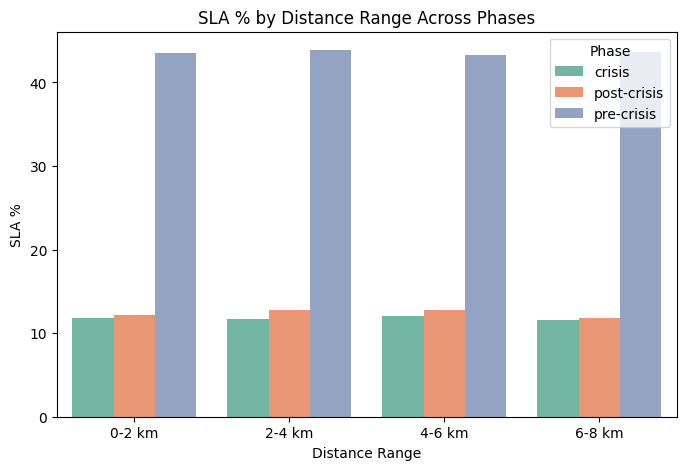

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=sla_distance, x='distance_range', y='sla_pct', hue='phase', palette='Set2')
plt.title('SLA % by Distance Range Across Phases')
plt.xlabel('Distance Range')
plt.ylabel('SLA %')
plt.legend(title='Phase')
plt.show()

/tmp/ipython-input-1420421661.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_distance = order_and_delivery_performance.groupby(['phase','distance_range']).agg({


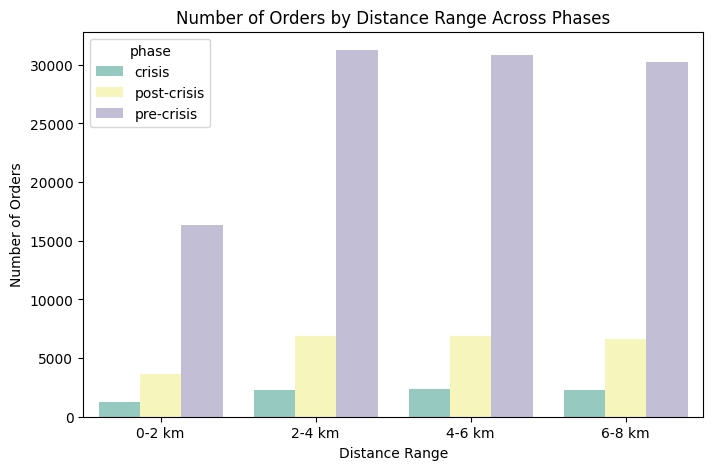

In [ ]:
orders_distance = order_and_delivery_performance.groupby(['phase','distance_range']).agg({
    'order_id':'count'
}).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=orders_distance, x='distance_range', y='order_id', hue='phase', palette='Set3')
plt.title('Number of Orders by Distance Range Across Phases')
plt.xlabel('Distance Range')
plt.ylabel('Number of Orders')
plt.show()

**Insight:**<br> Delivery SLA dropped sharply during the crisis across all distance ranges, and recovered only slightly post-crisis. The change is similar for short and long distances, indicating that delivery distance had minimal impact on SLA performance.


In [ ]:
# Cancellation rate per phase
cancel_kpis = order_and_delivery_performance.groupby('phase').agg(
    cancel_rate=('is_cancelled', lambda x: (x == 'Y').mean() * 100),
    total_orders=('order_id', 'count')
).reset_index()
cancel_kpis

phase  cancel_rate  total_orders
0       crisis     3.322420          8247
1  post-crisis     3.603079         24035
2   pre-crisis     1.699154        108760

Cities with long delays

In [ ]:
orders_with_city = order_and_delivery_performance.merge(
  dim_restaurant[['restaurant_id','city']], on='restaurant_id', how='left'
)
orders_with_city.head()

order_id customer_id restaurant_id delivery_partner_id  \
0  ORD202501023439  CUST181110     REST08622             DP05541   
1  ORD202501012051  CUST025572     REST02383             DP08091   
2  ORD202501019281  CUST179306     REST14069             DP02021   
3  ORD202501000124  CUST191820     REST19745             DP13859   
4  ORD202501006518  CUST033760     REST12962             DP09615   

      order_timestamp  subtotal_amount  discount_amount  delivery_fee  \
0 2025-01-01 12:00:00           471.62            35.44         30.56   
1 2025-01-01 12:00:00           255.68             0.00         27.45   
2 2025-01-01 12:00:00           428.38             0.00         26.23   
3 2025-01-01 12:00:00           260.81             0.00         32.75   
4 2025-01-01 12:00:00           280.33             0.00         25.57   

   total_amount is_cod is_cancelled       phase  actual_delivery_time_mins  \
0        466.74      N            N  pre-crisis                         31   
1        283.13      Y            N  pre-crisis                         46   
2        454.61      N            N  pre-crisis                         25   
3        293.56      N            N  pre-crisis                         29   
4        305.90      N            N  pre-crisis                         37   

   expected_delivery_time_mins  distance_km  delivery_delay  sla_met  \
0                           31          6.4               0        1   
1                           42          1.9               4        0   
2                           31          6.2              -6        1   
3                           41          6.2             -12        1   
4                           41          2.4              -4        1   

  distance_range       city  
0         6-8 km     Mumbai  
1         0-2 km     Mumbai  
2         6-8 km  Ahmedabad  
3         6-8 km  Ahmedabad  
4         2-4 km  Bengaluru

In [ ]:
# Calculate average delay & SLA % per city
city_delivery_kpis = orders_with_city.groupby('city').agg(
    avg_delay=('delivery_delay', 'mean'),
    sla_met_pct=('sla_met', lambda x: x.mean()*100),
    total_orders=('order_id', 'count')
).reset_index()

# Sort to see cities with longest delays
city_delivery_kpis.sort_values(by='avg_delay', ascending=False)


city  avg_delay  sla_met_pct  total_orders
7       Pune   5.761183    35.849057         11289
0  Ahmedabad   5.722332    35.987234         11593
3      Delhi   5.636646    36.225731         20963
1  Bengaluru   5.579731    36.504254         34911
4  Hyderabad   5.565612    36.608702         14319
5    Kolkata   5.560266    36.599490         12951
6     Mumbai   5.539103    36.317430         20855
2    Chennai   5.411765    37.137208         14161

**Insight**<br>
**Pune, Ahmedabad** is having longest average delay. Have to focus on the mode of communication.

In [ ]:
# Calculate average delay & SLA % per delivery partner
partner_delivery_kpis = order_and_delivery_performance.groupby(['delivery_partner_id', 'phase']).agg(
    avg_delay=('delivery_delay', 'mean'),
    sla_met_pct=('sla_met', lambda x: x.mean()*100),
    total_orders=('order_id', 'count'),
).reset_index()

# Sort to find worst-performing partners
partner_delivery_kpis.sort_values(by='avg_delay', ascending=False)

delivery_partner_id        phase  avg_delay  sla_met_pct  total_orders
30175             DP13641  post-crisis  55.000000          0.0             1
30136             DP13625  post-crisis  55.000000          0.0             1
6831              DP03077       crisis  55.000000          0.0             1
18263             DP08253       crisis  55.000000          0.0             1
29888             DP13515  post-crisis  55.000000          0.0             1
...                   ...          ...        ...          ...           ...
14403             DP06502   pre-crisis -13.000000        100.0             2
15966             DP07207   pre-crisis -14.333333        100.0             3
10417             DP04705   pre-crisis -15.000000        100.0             1
13062             DP05889   pre-crisis -16.500000        100.0             2
20651             DP09334   pre-crisis -20.000000        100.0             1

[33182 rows x 5 columns]

**Insight**<br>
Several delivery partners consistently cause high delays and 0% SLA, creating major operational bottlenecks.
High-performing partners with negative delays and 100% SLA can be prioritized to improve overall delivery reliability.

In [ ]:
order_and_delivery_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141042 entries, 0 to 141041
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   order_id                     141042 non-null  object        
 1   customer_id                  141042 non-null  object        
 2   restaurant_id                141042 non-null  object        
 3   delivery_partner_id          141042 non-null  object        
 4   order_timestamp              141042 non-null  datetime64[ns]
 5   subtotal_amount              141042 non-null  float64       
 6   discount_amount              141042 non-null  float64       
 7   delivery_fee                 141042 non-null  float64       
 8   total_amount                 141042 non-null  float64       
 9   is_cod                       141042 non-null  object        
 10  is_cancelled                 141042 non-null  object        
 11  phase                     

In [ ]:
dim_delivery_partner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   delivery_partner_id  15000 non-null  object 
 1   partner_name         15000 non-null  object 
 2   city                 15000 non-null  object 
 3   vehicle_type         15000 non-null  object 
 4   employment_type      15000 non-null  object 
 5   avg_rating           15000 non-null  float64
 6   is_active            15000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 820.4+ KB


In [ ]:
delivery_partner_performane = partner_delivery_kpis.merge(dim_delivery_partner,
                                              on='delivery_partner_id', how='left')
delivery_partner_performane.head()

delivery_partner_id        phase  avg_delay  sla_met_pct  total_orders  \
0             DP00001       crisis  16.000000     0.000000             1   
1             DP00001  post-crisis  15.750000    25.000000             4   
2             DP00001   pre-crisis   3.250000    50.000000             8   
3             DP00002  post-crisis   2.000000     0.000000             1   
4             DP00002   pre-crisis  -1.142857    42.857143             7   

  partner_name     city vehicle_type employment_type  avg_rating is_active  
0      Manoj S  Kolkata      Scooter        Contract        3.96         Y  
1      Manoj S  Kolkata      Scooter        Contract        3.96         Y  
2      Manoj S  Kolkata      Scooter        Contract        3.96         Y  
3       Amit D  Kolkata        Cycle       Part-time        4.22         Y  
4       Amit D  Kolkata        Cycle       Part-time        4.22         Y

In [ ]:
delivery_partner_performane.sort_values(by='avg_delay', ascending=False).head(5)

delivery_partner_id        phase  avg_delay  sla_met_pct  total_orders  \
30175             DP13641  post-crisis       55.0          0.0             1   
30136             DP13625  post-crisis       55.0          0.0             1   
6831              DP03077       crisis       55.0          0.0             1   
18263             DP08253       crisis       55.0          0.0             1   
29888             DP13515  post-crisis       55.0          0.0             1   

      partner_name       city vehicle_type employment_type  avg_rating  \
30175       Amit Z    Chennai         Bike       Part-time        4.18   
30136      Vikas R       Pune        Cycle        Contract        4.80   
6831       Meena G      Delhi         Bike       Full-time        4.20   
18263     Rakesh T      Delhi      Scooter       Full-time        3.97   
29888     Suresh S  Bengaluru      Scooter        Contract        4.39   

      is_active  
30175         Y  
30136         Y  
6831          Y  
18263         Y  
29888         Y

In [ ]:
delivery_partner_performane['avg_rating_range'] = pd.cut(delivery_partner_performane['avg_rating'],
                                                       bins=[0,1,2,3,4,5], labels=[1,2,3,4,5])
delivery_partner_performane.tail()


delivery_partner_id        phase  avg_delay  sla_met_pct  total_orders  \
33177             DP14998   pre-crisis   0.333333    66.666667             9   
33178             DP14999       crisis  23.000000     0.000000             1   
33179             DP14999   pre-crisis   1.700000    50.000000            10   
33180             DP15000  post-crisis  13.500000     0.000000             2   
33181             DP15000   pre-crisis   1.333333    33.333333             6   

      partner_name       city vehicle_type employment_type  avg_rating  \
33177     Suresh K  Hyderabad        Cycle        Contract        4.11   
33178       Neha B     Mumbai        Cycle       Part-time        4.17   
33179       Neha B     Mumbai        Cycle       Part-time        4.17   
33180     Suresh L  Bengaluru         Bike        Contract        3.93   
33181     Suresh L  Bengaluru         Bike        Contract        3.93   

      is_active avg_rating_range  
33177         Y                5  
33178         Y                5  
33179         Y                5  
33180         Y                4  
33181         Y                4

Text(0, 0.5, 'Average Delivery Delay (mins)')

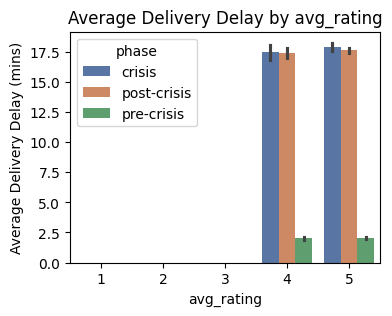

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(data=delivery_partner_performane, x='avg_rating_range', y='avg_delay', hue='phase', palette='deep')
plt.title('Average Delivery Delay by avg_rating')
plt.xlabel('avg_rating')
plt.ylabel('Average Delivery Delay (mins)')

**Insight**<br>
Despite uniformly high ratings (4–5), average delivery delay still varies across partners, implying that ratings may capture customer satisfaction but not operational efficiency. Here mainly the phase matter. In crisis and post-crisis phase the avg delay is more.

Text(0, 0.5, 'Average Delivery Delay (mins)')

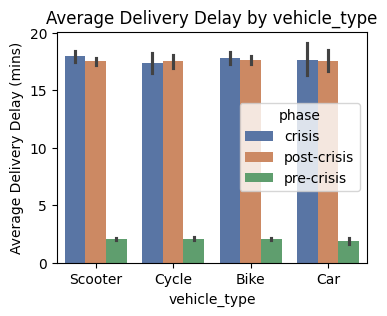

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(data=delivery_partner_performane, x='vehicle_type', y='avg_delay', hue='phase', palette='deep')
plt.title('Average Delivery Delay by vehicle_type')
plt.xlabel('vehicle_type')
plt.ylabel('Average Delivery Delay (mins)')

Text(0, 0.5, 'Average Delivery Delay (mins)')

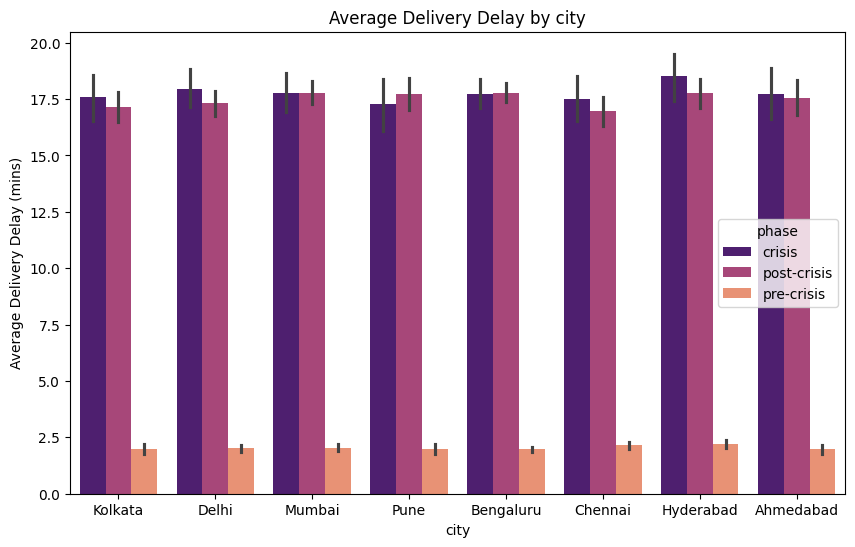

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=delivery_partner_performane, x='city', y='avg_delay', hue='phase', palette='magma')
plt.title('Average Delivery Delay by city')
plt.xlabel('city')
plt.ylabel('Average Delivery Delay (mins)')

Text(0, 0.5, 'Average Delivery Delay (mins)')

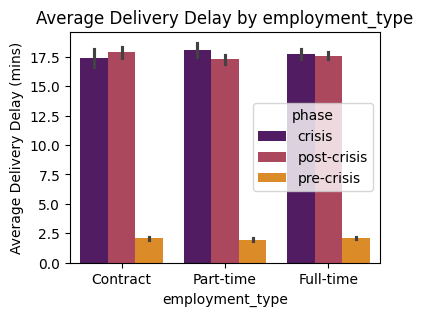

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(data=delivery_partner_performane, x='employment_type', y='avg_delay', hue='phase', palette='inferno')
plt.title('Average Delivery Delay by employment_type')
plt.xlabel('employment_type')
plt.ylabel('Average Delivery Delay (mins)')

**Insight**<br>
Have to give special attention on Pune, Bengaluru. There avg_delay in post-crisis phase is more than crisis.

### Feedback & Sentiment: Monitor real-time ratings, reviews, and sentiment to guide ongoing recovery efforts.

In [ ]:
fact_ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68825 entries, 0 to 68829
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          68825 non-null  object        
 1   customer_id       68825 non-null  object        
 2   restaurant_id     68825 non-null  object        
 3   rating            68825 non-null  float64       
 4   review_text       68825 non-null  object        
 5   review_timestamp  68825 non-null  datetime64[ns]
 6   sentiment_score   68825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 4.2+ MB


In [ ]:
rating_and_order = fact_ratings_clean.merge(fact_orders_clean[['order_id', 'phase']], on='order_id', how='left')
rating_and_order.head()

order_id customer_id restaurant_id  rating           review_text  \
0  ORD202501023439  CUST181110     REST08622     4.5   Super fast delivery   
1  ORD202501019281  CUST179306     REST14069     4.5          Great taste!   
2  ORD202501018036  CUST093042     REST13907     5.0   Super fast delivery   
3  ORD202501007724  CUST110825     REST08451     4.0  Tasty but a bit late   
4  ORD202501002349  CUST181669     REST00225     4.4     Satisfied overall   

     review_timestamp  sentiment_score       phase  
0 2025-01-01 15:00:00             0.75  pre-crisis  
1 2025-01-01 15:00:00             0.75  pre-crisis  
2 2025-01-01 14:03:00             1.00  pre-crisis  
3 2025-01-01 14:06:00             0.50  pre-crisis  
4 2025-01-01 14:06:00             0.70  pre-crisis

In [ ]:
phase_feedback = rating_and_order.groupby('phase').agg(
    avg_rating=('rating','mean'),
    avg_sentiment=('sentiment_score','mean'),
    num_reviews=('rating','count')
).reset_index()
phase_feedback

phase  avg_rating  avg_sentiment  num_reviews
0       crisis    2.585786      -0.207107         3975
1  post-crisis    2.467969      -0.266015        11517
2   pre-crisis    4.503741       0.751870        53333

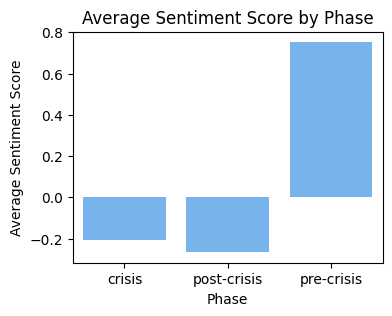

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(data=phase_feedback, x='phase', y='avg_sentiment', color='#66b3ff')
plt.title('Average Sentiment Score by Phase')
plt.xlabel('Phase')
plt.ylabel('Average Sentiment Score')
plt.show()

**insight**<br>
The average sentiment score is worse in post-crisis phase than crisis phase.

In [ ]:
restaurant_feedback = rating_and_order.groupby('restaurant_id').agg(
    avg_rating=('rating', 'mean'),
    avg_sentiment=('sentiment_score', 'mean'),
    num_reviews=('rating', 'count')
).reset_index()

# Merge restaurant metadata for context
restaurant_feedback = restaurant_feedback.merge(
    dim_restaurant[['restaurant_id', 'restaurant_name', 'cuisine_type', 'city']],
    on='restaurant_id',
    how='left'
)

restaurant_feedback.head()

restaurant_id  avg_rating  avg_sentiment  num_reviews       restaurant_name  \
0     REST00001    4.100000       0.550000            3  Madras House Central   
1     REST00002    3.833333       0.416667            6  Namma Kitchen Clouds   
2     REST00003    3.200000       0.100000            2   Taste of Wraps Nest   
3     REST00004    3.833333       0.416667            3   Grand Thali Delight   
4     REST00005    3.100000       0.050000            5   Taste of Curry Zone   

   cuisine_type       city  
0         Pizza      Delhi  
1       Chinese  Ahmedabad  
2       Healthy     Mumbai  
3  South Indian  Hyderabad  
4     Fast Food  Bengaluru

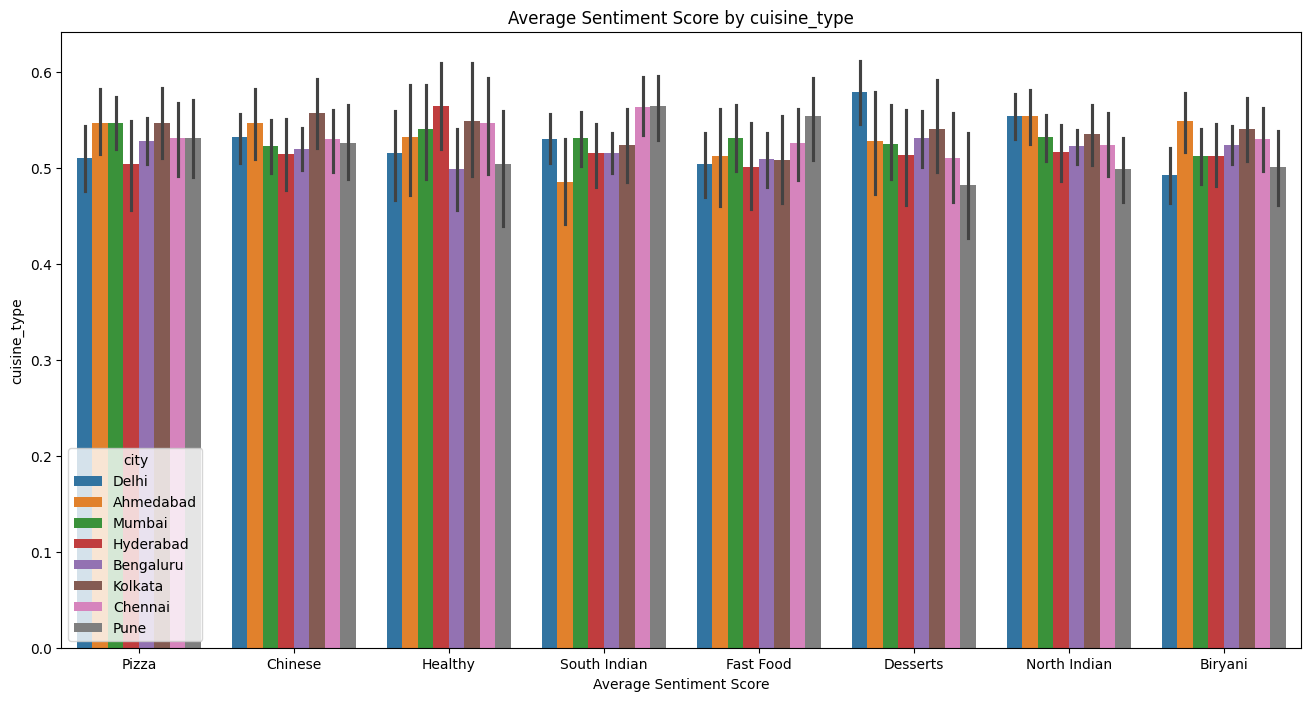

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(data=restaurant_feedback, y='avg_sentiment', x='cuisine_type',hue='city')
plt.title('Average Sentiment Score by cuisine_type')
plt.xlabel('Average Sentiment Score')
plt.ylabel('cuisine_type')
plt.show()

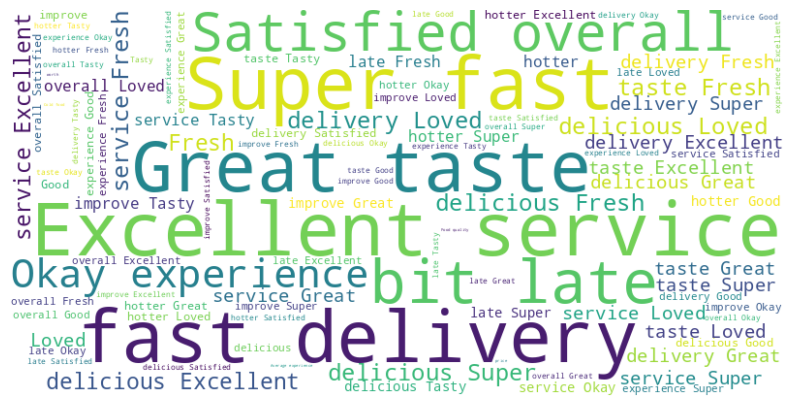

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(rating_and_order[rating_and_order['phase']=='pre-crisis']['review_text'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


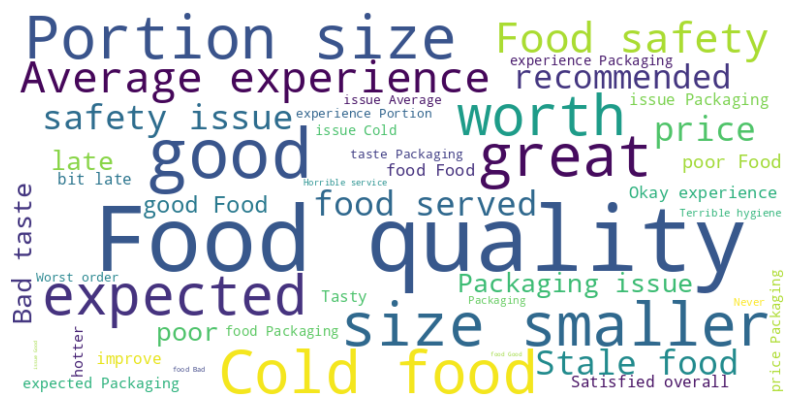

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(rating_and_order[rating_and_order['phase']=='crisis']['review_text'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


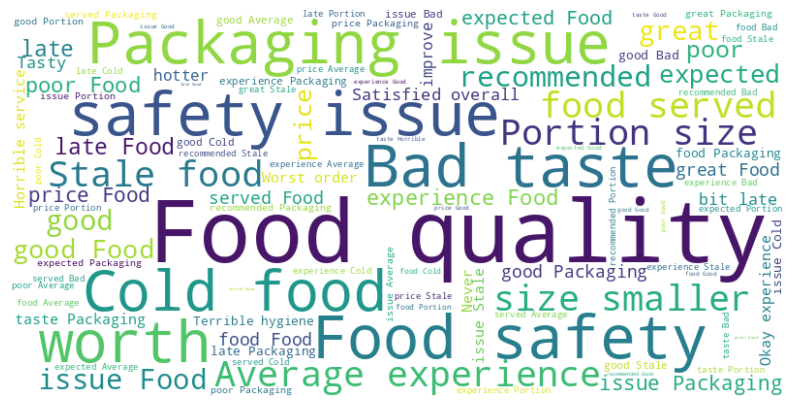

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(rating_and_order[rating_and_order['phase']=='post-crisis']['review_text'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()





# Business Insights & Recommendations

**Theme :**
*Customer Retention*<br>
**Insight**<br>
Over three-fourths (76%) of QuickBite’s customer base stopped ordering after the June crisis. However, ~1% of loyal customers (high-order frequency) continued engagement<br>
**Recommendation** <br>
Identify these loyal users and launch exclusive “Thank You” campaigns — rewards, early access, or personalized offers to retain advocacy.
<br>
<br>

**Theme :**
*Customer Re-engagement*<br>
**Insight**<br>
Lost users (~77K) represent the biggest recovery opportunity.<br>
**Recommendation**<br>
Run re-engagement email/SMS campaigns targeting those who ordered 2+ times pre-crisis but went inactive, highlighting improved food safety and faster delivery.<br>
<br>

**Theme :**
*New Customer Acquisition*<br>
**Insight**<br>
Post-crisis, 22.5% of customers were new — showing QuickBite’s brand can still attract new users even after damage.<br>
**Recommendation**<br>
Offer “Welcome Cashback” or first-order discounts, coupled with visible “Hygiene Certified Partner” badges to boost first-time confidence.<br>
<br>

**Theme :**
*Customer Value Behavior*<br>
**Insight**<br>
Loyal customers maintained stable AOV (~₹460–560), showing consistent willingness to spend.<br>
**Recommendation**<br>
Focus recovery on retaining high-value customers, rather than broad low-margin acquisition initially.

**Theme :** *Order Volume Decline*<br>
**Insight**<br>
Orders dropped by ~85% during crisis (108K → 8K) and only partially recovered to 24K.<br>
**Recommendation**<br>
Focus retention campaigns on high-frequency zones/cities that showed recovery. Promote safety guarantees via push notifications.
<br>
<br>
**Theme :** *Revenue Impact*<br>
**Insight**<br>
Stable AOV but reduced customer base → revenue dip mainly due to churn, not lower spend.<br>
**Recommendation**<br>
The main target is to bring back old customers, retrain existing customers and encourage new customer to order food.
<br>
<br>
**Theme :** *Payment Behavior* <br>
**Insight** <br>
COD increased from 30% → 35%, signaling refund anxiety and low trust.<br>
**Recommendation**<br>
Highlight “Safe Refund Policy” & digital payment assurance banners during checkout.
<br>
<br>

**Theme :** *Cancellations* <br>
**Insight**<br>
Remained low overall, showing customers still fulfilled orders. It increased from 1.7% to 3.3% to 3.6%(post-crisis phase) <br>
**Recommendation**<br>
Keep delivery experience consistent to prevent the cancellation problem.
<br>
<br>

**Theme :** *Behavioral Shift (Days)* <br>
**Insight**<br>
Shift in ordering pattern — weekends strong during crisis (comfort food spike), but post-crisis shifted back to weekdays.<br>
**Recommendation**<br>
Adjust ad placement and offers: weekends for leisure foods, weekdays for working professionals.
<br>
<br>

**Theme :** *Temporal Trends* <br>
**Insight**<br>
Pre-crisis had periodic order surges (week 1/4); post-crisis flattened trend shows weakened engagement.<br>
**Recommendation**<br>
Introduce monthly loyalty streaks (“Order 4 weeks in a row and earn rewards”) to recreate order rhythm.
<br>
<br>


**Theme :** *Cuisine Trends* <br>
**Insight**<br>
North Indian and South Indian cuisines consistently led in orders across all phases. During post-crisis, these cuisines recovered fastest — North Indian (4.7K) and South Indian (3.5K) — while “Healthy” food orders also saw a strong rebound (↑3.3× from crisis).<br>
**Recommendation**<br>
Prioritize long-term partnerships with North & South Indian restaurants for retention. Invest in Healthy cuisine partnerships for growth, as this segment is gaining traction post-crisis..
<br>
<br>

**Theme :** *Recovery by City* <br>
**Insight**<br>
Despite a ~92% order drop during the crisis across all cities, Ahmedabad (+206%) and Chennai (+203%) showed the strongest recovery post-crisis, while Kolkata (180%) lagged behind.<br>
**Recommendation**<br>
Focus marketing and partnership expansion in Ahmedabad & Chennai, the fastest-recovering markets. For slower recovery zones like Kolkata, introduce localized offers and safety-focused campaigns to rebuild trust.
<br>
<br>

**Theme :** *Recovery of Restaurants in each city* <br>
**Insight**<br>
Bengaluru, Delhi, Mumbai have the highest number of restaurants showing Strong Recovery and Reactivated/New.Ahmedabad, though top in overall city recovery % (205.96 %) , has a smaller share of restaurants in “Strong Recovery.” This indicates uneven recovery — a few restaurants recovered exceptionally, but many are still moderate or lagging.
<br>
**Recommendation**<br>
Have to engage all restaurants of all cities so that Strong Recovery % will increase for all cities (mainly Ahmedabad, Pune).
<br>
<br>
